In [1]:
from google.colab import drive
drive.mount('/content/drive')                                                                                                                                                                                                                       

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [18]:
%ls -a

./  ../  .config/  drive/  LightGBM/  sample_data/


In [2]:
!git clone --recursive https://github.com/Microsoft/LightGBM
%cd /content/LightGBM/
!mkdir build
!cmake -DUSE_GPU=1 #avoid ..
!make -j$(nproc)
!sudo apt-get -y install python-pip
!sudo -H pip install setuptools pandas numpy scipy scikit-learn -U
%cd /content/LightGBM/python-package
!sudo python setup.py install --precompile

Cloning into 'LightGBM'...
remote: Enumerating objects: 80, done.
remote: Counting objects: 100% (80/80), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 15152 (delta 33), reused 44 (delta 25), pack-reused 15072
Receiving objects: 100% (15152/15152), 10.47 MiB | 35.16 MiB/s, done.
Resolving deltas: 100% (10913/10913), done.
Submodule 'include/boost/compute' (https://github.com/boostorg/compute) registered for path 'compute'
Cloning into '/content/LightGBM/compute'...
remote: Enumerating objects: 21728, done.        
remote: Total 21728 (delta 0), reused 0 (delta 0), pack-reused 21728        
Receiving objects: 100% (21728/21728), 8.51 MiB | 32.38 MiB/s, done.
Resolving deltas: 100% (17565/17565), done.
Submodule path 'compute': checked out '36c89134d4013b2e5e45bc55656a18bd6141995a'
/content/LightGBM
-- The C compiler identification is GNU 7.4.0
-- The CXX compiler identification is GNU 7.4.0
-- Check for working C compiler: /usr/bin/cc
-- Check for working C compil

In [3]:
#%cp -rp '/content/drive/My Drive/ta-lib/' ~/
%cd ~
!rm -rf ta-lib*
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
#%cd '/content/drive/My Drive/ta-lib'
#%cd ta-lib
import os
#os.chdir('/content/drive/My Drive/ta-lib') # Can't use !cd in co-lab
os.chdir('ta-lib') # Can't use !cd in co-lab
#%cd ~/ta-lib
!./configure --prefix=/usr
#! '/content/drive/My Drive/ta-lib/configure' --prefix=/usr
!make
!make install
!pip install Ta-Lib
%cd /content

/root
--2019-12-01 12:41:10--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 216.105.38.13
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|216.105.38.13|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2019-12-01 12:41:11--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 216.105.38.13
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: https://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2019-12-01 12:41:11--  https://gigenet.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving gigenet.dl

In [4]:
!pip install optuna
!pip install joblib
!pip install catboost
!pip install six
#!pip --no-cache-dir install lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"
#!pip install lightgbm --install-option=--GPU
#!sudo pip --no-cache-dir install -I lightgbm --install-option=--gpu --install-option="--opencl-include-dir=/usr/local/cuda/include/" --install-option="--opencl-library=/usr/local/cuda/lib64/libOpenCL.so"

import lightgbm as lgb
import xgboost as xgb
import catboost as cat
from catboost import Pool
from catboost import CatBoost
from sklearn import datasets
import dateutil
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle
import csv
import matplotlib.pyplot as plt
from scipy.spatial.distance import correlation
import numpy as np
import pandas as pd
#from multiprocessing import Pool, Value, Array
import multiprocessing as multi
from joblib import Parallel, delayed
import talib as ta
from datetime import datetime, timedelta, timezone
import sklearn.metrics
from sklearn.model_selection import train_test_split
from functools import partial
import optuna
import joblib
from joblib import Parallel, delayed
import time
import random

     |████████████████████████████████| 133kB 2.8MB/s 
     |████████████████████████████████| 1.1MB 71.8MB/s 
     |████████████████████████████████| 81kB 11.2MB/s 
     |████████████████████████████████| 471kB 51.6MB/s 
     |████████████████████████████████| 112kB 59.3MB/s 
     |████████████████████████████████| 61kB 9.6MB/s 
     |████████████████████████████████| 51kB 8.4MB/s 
  Created wheel for optuna: filename=optuna-0.19.0-cp36-none-any.whl size=170198 sha256=18c2bafb689bc4d8419a36d94f0de5afd15bdbc63e62457feb32e0240018972a
  Stored in directory: /root/.cache/pip/wheels/49/bf/47/090a43457caeff74397397da1c98a8aaed685257c16a5ba1f0
  Created wheel for alembic: filename=alembic-1.3.1-py2.py3-none-any.whl size=144523 sha256=6563b0412e838bc9c298cb60612ed3c048c910467ae0ea5e751ec3121b7e9a72
  Stored in directory: /root/.cache/pip/wheels/b2/d4/19/5ab879d30af7cbc79e6dcc1d421795b1aa9d78f455b0412ef7
  Created wheel for Mako: filename=Mako-1.1.0-cp36-none-any.whl size=75363 sha256=31f6b99e

In [0]:
class OneMinData:
    def initialize(self):
        self.func_dict = {}  # key = [func_name + term], val = (function object, term)
        self.index_data_dict = {}  # key= [func_name + term]], val = [index data]
        self.unix_time = []
        self.dt = []
        self.open = []
        self.high = []
        self.low = []
        self.close = []
        self.open_change = []
        self.high_change = []
        self.low_change = []
        self.close_change = []
        self.size = []
        self.future_side = []

    def cut_data(self, num_data):
        for k in self.index_data_dict:
            self.index_data_dict[k] = self.index_data_dict[k][-num_data:]
        self.unix_time = self.unix_time[-num_data:]
        self.dt = self.dt[-num_data:]
        self.open = self.open[-num_data:]
        self.high = self.high[-num_data:]
        self.low = self.low[-num_data:]
        self.close = self.close[-num_data:]
        self.open_change = self.open_change[-num_data:]
        self.high_change = self.high_change[-num_data:]
        self.low_change = self.low_change[-num_data:]
        self.close_change = self.close_change[-num_data:]
        self.size = self.size[-num_data:]
        self.future_side = self.future_side[-num_data:]

    def cut_data2(self, from_ind, to_ind):
        for k in self.index_data_dict:
            self.index_data_dict[k] = self.index_data_dict[k][from_ind:to_ind]
        self.unix_time = self.unix_time[from_ind:to_ind]
        self.dt = self.dt[from_ind:to_ind]
        self.open = self.open[from_ind:to_ind]
        self.high = self.high[from_ind:to_ind]
        self.low = self.low[from_ind:to_ind]
        self.close = self.close[from_ind:to_ind]
        self.open_change = self.open_change[from_ind:to_ind]
        self.high_change = self.high_change[from_ind:to_ind]
        self.low_change = self.low_change[from_ind:to_ind]
        self.close_change = self.close_change[from_ind:to_ind]
        self.size = self.size[from_ind:to_ind]
        self.future_side = self.future_side[from_ind:to_ind]

    def del_data(self, num_remain_data):
        if len(self.dt) > num_remain_data:
            for k in self.index_data_dict:
                del self.index_data_dict[k][:-num_remain_data]
            del self.unix_time[:-num_remain_data]
            del self.dt[:-num_remain_data]
            del self.open[:-num_remain_data]
            del self.high[:-num_remain_data]
            del self.low[:-num_remain_data]
            del self.close[:-num_remain_data]
            del self.open_change[:-num_remain_data]
            del self.high_change[:-num_remain_data]
            del self.low_change[:-num_remain_data]
            del self.close_change[:-num_remain_data]
            del self.size[:-num_remain_data]
            del self.future_side[:-num_remain_data]

    def extract_data(self, ex_from, to):
        if len(self.dt) > ex_from:
            for k in self.index_data_dict:
                del self.index_data_dict[k][-ex_from:-to]
            del self.unix_time[-ex_from:-to]
            del self.dt[-ex_from:-to]
            del self.open[-ex_from:-to]
            del self.high[-ex_from:-to]
            del self.low[-ex_from:-to]
            del self.close[-ex_from:-to]
            del self.open_change[-ex_from:-to]
            del self.high_change[-ex_from:-to]
            del self.low_change[-ex_from:-to]
            del self.close_change[-ex_from:-to]
            del self.size[-ex_from:-to]
            del self.future_side[-ex_from:-to]

    def add_and_pop(self, unix_time, dt, open, high, low, close, size):
        self.unix_time.append(unix_time)
        self.unix_time.pop(0)
        self.dt.append(dt)
        self.dt.pop(0)
        self.open.append(open)
        self.open.pop(0)
        self.high.append(high)
        self.high.pop(0)
        self.low.append(low)
        self.low.pop(0)
        self.close.append(close)
        self.close.pop(0)
        self.open_change.append(open)
        self.open_change.pop(0)
        self.high_change.append(high)
        self.high_change.pop(0)
        self.low_change.append(low)
        self.low_change.pop(0)
        self.close_change.append(close)
        self.close_change.pop(0)
        self.size.append(size)
        self.size.pop(0)

In [0]:

class OneMinMarketData:
    @classmethod
    def initialize_for_bot(cls, num_term, from_ind, to_ind, kijun_val, kijun_period):
        cls.num_term = num_term
        cls.kijun_val = kijun_val
        cls.kijun_period = kijun_period
        cls.term_list = cls.generate_term_list(num_term)
        cls.ohlc = cls.read_from_csv('/content/drive/My Drive/mex_data.csv')
        cls.ohlc.cut_data2(from_ind, to_ind)
        cls.__generate_all_func_dict()
        cls.__calc_all_index_dict()
        
    @classmethod
    def update_for_bot(cls):
        cls.__calc_all_index()
        

    @classmethod
    def read_from_csv(cls, file_name):
        ohlc = OneMinData()
        ohlc.initialize()
        df = pd.read_csv(file_name)
        ohlc.dt = list(map(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'), list(df['dt'])))
        ohlc.unix_time = list(df['timestamp'])
        ohlc.open = list(df['open'])
        ohlc.high = list(df['high'])
        ohlc.low = list(df['low'])
        ohlc.close = list(df['close'])
        ohlc.size = list(df['volume'])
        return ohlc
    
    
    @classmethod
    def write_all_func_dict(cls):
        with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
            writer = csv.writer(file, lineterminator='\n')
            writer.writerow(list(cls.ohlc.func_dict.keys()))
        print('completed write bpsp columns')
        
        
    @classmethod
    def read_func_dict(cls):
        #read from func / term list
        cols = []
        with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'r') as f:
            reader = csv.reader(f)
            for r in reader:
                cols.append(r)
        #copy matched key func val
        func_obj= {}
        for col in cols[0]:
            if col not in ['open', 'high', 'low', 'close']:
                func_obj[col] = cls.ohlc.func_dict[col]
        #replace ohlc.func_dict
        cls.ohlc.func_dict = func_obj
    
    
    
    '''
    generate all func / term as a dict
    calc all index as a dict
    generate df from the index data dict
    calc correlation
    remove correlated columns
    renew fund / term dict with non-correlated func / term
    calc index data of the renewed dict
    '''
    
    @classmethod
    def __generate_all_func_dict(cls):
        for term in cls.term_list:
            cls.ohlc.func_dict['ema:'+str(term)] = (OneMinMarketData.calc_ema,term)
            #cls.ohlc.func_dict['ema_kairi:'+str(term)] = (OneMinMarketData.calc_ema_kairi,term)
            #cls.ohlc.func_dict['ema_gra:'+str(term)] = (OneMinMarketData.calc_ema_gra,term)
            cls.ohlc.func_dict['dema:'+str(term)] = (OneMinMarketData.calc_dema,term)
            #cls.ohlc.func_dict['dema_kairi:'+str(term)] = (OneMinMarketData.calc_dema_kairi,term)
            #cls.ohlc.func_dict['dema_gra:'+str(term)] = (OneMinMarketData.calc_dema_gra,term)
            cls.ohlc.func_dict['momentum:'+str(term)] = (OneMinMarketData.calc_momentum,term)
            cls.ohlc.func_dict['rate_of_change:'+str(term)] = (OneMinMarketData.calc_rate_of_change,term)
            cls.ohlc.func_dict['rsi:'+str(term)] = (OneMinMarketData.calc_rsi,term)
            cls.ohlc.func_dict['williams_R:'+str(term)] = (OneMinMarketData.calc_williams_R,term)
            cls.ohlc.func_dict['beta:'+str(term)] = (OneMinMarketData.calc_beta,term)
            cls.ohlc.func_dict['time_series_forecast:'+str(term)] = (OneMinMarketData.calc_time_series_forecast,term)
            cls.ohlc.func_dict['correl:'+str(term)] = (OneMinMarketData.calc_correl,term)
            cls.ohlc.func_dict['linear_reg:'+str(term)] = (OneMinMarketData.calc_linear_reg,term)
            cls.ohlc.func_dict['linear_reg_angle:'+str(term)] = (OneMinMarketData.calc_linear_reg_angle,term)
            cls.ohlc.func_dict['linear_reg_intercept:'+str(term)] = (OneMinMarketData.calc_linear_reg_intercept,term)
            cls.ohlc.func_dict['linear_reg_slope:'+str(term)] = (OneMinMarketData.calc_linear_reg_slope,term)
            cls.ohlc.func_dict['stdv:'+str(term)] = (OneMinMarketData.calc_stdv,term)
            cls.ohlc.func_dict['var:'+str(term)] = (OneMinMarketData.calc_var,term)
            cls.ohlc.func_dict['adx:'+str(term)] = (OneMinMarketData.calc_adx,term)
            cls.ohlc.func_dict['aroon_os:'+str(term)] = (OneMinMarketData.calc_aroon_os,term)
            cls.ohlc.func_dict['cci:'+str(term)] = (OneMinMarketData.calc_cci,term)
            cls.ohlc.func_dict['dx:'+str(term)] = (OneMinMarketData.calc_dx,term)
            if term >= 10:
                cls.ohlc.func_dict['macd:'+str(term)] = (OneMinMarketData.calc_macd,term)
                cls.ohlc.func_dict['macd_signal:'+str(term)] = (OneMinMarketData.calc_macd_signal,term)
                cls.ohlc.func_dict['macd_hist:'+str(term)] = (OneMinMarketData.calc_macd_hist,term)
                '''
            cls.ohlc.func_dict['makairi_momentum:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_momentum, term)
            cls.ohlc.func_dict['makairi_rate_of_change:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_rate_of_change, term)
            cls.ohlc.func_dict['makairi_rsi:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_rsi, term)
            cls.ohlc.func_dict['makairi_williams_R:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_williams_R, term)
            cls.ohlc.func_dict['makairi_beta:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_beta, term)
            cls.ohlc.func_dict['makairi_time_series_forecast:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_time_series_forecast, term)
            cls.ohlc.func_dict['makairi_correl:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_correl, term)
            cls.ohlc.func_dict['makairi_linear_reg:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg, term)
            cls.ohlc.func_dict['makairi_linear_reg_angle:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg_angle, term)
            cls.ohlc.func_dict['makairi_linear_reg_intercept:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg_intercept, term)
            cls.ohlc.func_dict['makairi_linear_reg_slope:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_linear_reg_slope, term)
            cls.ohlc.func_dict['makairi_stdv:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_stdv, term)
            cls.ohlc.func_dict['makairi_var:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_var, term)
            cls.ohlc.func_dict['makairi_adx:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_adx, term)
            cls.ohlc.func_dict['makairi_aroon_os:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_aroon_os, term)
            cls.ohlc.func_dict['makairi_cci:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_cci, term)
            cls.ohlc.func_dict['makairi_dx:'+str(term)] = (OneMinMarketData.generate_makairi,OneMinMarketData.calc_dx, term)
            
            cls.ohlc.func_dict['diff_momentum:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_momentum, term)
            cls.ohlc.func_dict['diff_rate_of_change:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_rate_of_change, term)
            cls.ohlc.func_dict['diff_rsi:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_rsi, term)
            cls.ohlc.func_dict['diff_williams_R:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_williams_R, term)
            cls.ohlc.func_dict['diff_beta:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_beta, term)
            cls.ohlc.func_dict['diff_time_series_forecast:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_time_series_forecast, term)
            cls.ohlc.func_dict['diff_correl:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_correl, term)
            cls.ohlc.func_dict['diff_linear_reg:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg, term)
            cls.ohlc.func_dict['diff_linear_reg_angle:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg_angle, term)
            cls.ohlc.func_dict['diff_linear_reg_intercept:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg_intercept, term)
            cls.ohlc.func_dict['diff_linear_reg_slope:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_linear_reg_slope, term)
            cls.ohlc.func_dict['diff_stdv:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_stdv, term)
            cls.ohlc.func_dict['diff_var:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_var, term)
            cls.ohlc.func_dict['diff_adx:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_adx, term)
            cls.ohlc.func_dict['diff_aroon_os:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_aroon_os, term)
            cls.ohlc.func_dict['diff_cci:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_cci, term)
            cls.ohlc.func_dict['diff_dx:'+str(term)] = (OneMinMarketData.generate_diff,OneMinMarketData.calc_dx, term)
            '''
        cls.ohlc.func_dict['normalized_ave_true_range:'+str(0)] = (OneMinMarketData.calc_normalized_ave_true_range,0)
        cls.ohlc.func_dict['three_outside_updown:'+str(0)] = (OneMinMarketData.calc_three_outside_updown,0)
        cls.ohlc.func_dict['breakway:'+str(0)] = (OneMinMarketData.calc_breakway,0)
        cls.ohlc.func_dict['dark_cloud_cover:'+str(0)] = (OneMinMarketData.calc_dark_cloud_cover,0)
        cls.ohlc.func_dict['dragonfly_doji:'+str(0)] = (OneMinMarketData.calc_dragonfly_doji,0)
        cls.ohlc.func_dict['updown_sidebyside_white_lines:'+str(0)] = (OneMinMarketData.calc_updown_sidebyside_white_lines,0)
        cls.ohlc.func_dict['haramisen:'+str(0)] = (OneMinMarketData.calc_haramisen,0)
        cls.ohlc.func_dict['hikkake_pattern:'+str(0)] = (OneMinMarketData.calc_hikkake_pattern,0)
        cls.ohlc.func_dict['neck_pattern:'+str(0)] = (OneMinMarketData.calc_neck_pattern,0)
        cls.ohlc.func_dict['upsidedownside_gap_three_method:'+str(0)] = (OneMinMarketData.calc_upsidedownside_gap_three_method,0)
        cls.ohlc.func_dict['sar:'+str(0)] = (OneMinMarketData.calc_sar,0)
        cls.ohlc.func_dict['bop:'+str(0)] = (OneMinMarketData.calc_bop,0)
        
        
    @classmethod
    def __calc_all_index_dict(cls):
        print('calculating all index dict')
        start_time = time.time()

        #cls.calc_ohlc_change()

        for k in cls.ohlc.func_dict:
            if int(k.split(':')[1]) > 0:
                if k.split('_')[0] != 'makairi' and k.split('_')[0] != 'diff' and  k.split(':')[0] not in ['ema_kairi', 'ema_gra', 'dema_kairi', 'dema_gra']:
                    cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0](cls.ohlc.func_dict[k][1])
            else:
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0]()
        print('completed non makairi diff index. time=', time.time() - start_time)

        start_time = time.time()
        for k in cls.ohlc.func_dict:
            if k.split('_')[0] == 'makairi':
                data = cls.ohlc.func_dict[k][1](cls.ohlc.func_dict[k][2])
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0](data, cls.ohlc.func_dict[k][2])
            elif k.split('_')[0] == 'diff':
                data = cls.ohlc.func_dict[k][1](cls.ohlc.func_dict[k][2])
                cls.ohlc.index_data_dict[k] = cls.ohlc.func_dict[k][0](data)

        cls.ohlc.future_side = cls.calc_future_side()
        print('completed calc makairi diff index. time=', time.time() - start_time)

            
            
    @classmethod
    def genrate_df_from_dict(cls):
        start_time = time.time()
        cut_size = cls.term_list[-1] + 1
        end = len(cls.ohlc.close) - cls.kijun_period #due to bpsp
        OneMinMarketData.ohlc.index_data_dict['dt'] = cls.ohlc.dt
        OneMinMarketData.ohlc.index_data_dict['size'] = cls.ohlc.size
        OneMinMarketData.ohlc.index_data_dict['close'] = cls.ohlc.close
        df = pd.DataFrame(OneMinMarketData.ohlc.index_data_dict)
        '''
        df = df.assign(dt=cls.ohlc.dt)
        df = df.assign(open=cls.ohlc.open)
        df = df.assign(high=cls.ohlc.high)
        df = df.assign(low=cls.ohlc.low)
        df = df.assign(close=cls.ohlc.close)
        df = df.assign(open_change=cls.ohlc.open_change)
        df = df.assign(high_change=cls.ohlc.high_change)
        df = df.assign(low_change=cls.ohlc.low_change)
        df = df.assign(close_change=cls.ohlc.close_change)
        df = df.assign(size=cls.ohlc.size)
        '''
        df = df.iloc[cut_size:end] 
        #df['future_side'] = cls.ohlc.future_side[cut_size:]
        df = df.assign(future_side=cls.ohlc.future_side[cut_size:])
        print('completed generate df from dict. time=', time.time() - start_time)
        return df


    @classmethod
    def remove_cols_contains_nan(cls,  df):
        start_time = time.time()
        remove_cols = []
        tmp = df.copy()
        for col in tmp.columns:
            for ind,d in enumerate(tmp[col]):
                if str(d) =='nan':
                    remove_cols.append(col)
                    break
        if len(remove_cols) > 0:
            df.drop(remove_cols, axis=1, inplace=True)
            print('removed ', len(remove_cols), ' cols contains nan.')
        print('completed remove cols contains nan. time=', time.time() - start_time)
        return df
        
    @classmethod
    def remove_cols_contains_nan2(cls, df):
        start_time = time.time()
        pre_n = len(df.columns)
        after_n = len(df.dropna(axis = 1, how = 'any').columns)
        print('removed ', pre_n - after_n, 'cols contains nan.')
        print('completed remove cols contains nan. time=', time.time() - start_time)
        return df.dropna(axis = 1, how = 'any')

    @classmethod
    def __calc_all_index(cls):
        start_time = time.time()
        cls.ohlc.ave_price = cls.calc_ave_price(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        for term in cls.term_list:
            cls.ohlc.ema[term] = cls.calc_ema(term, cls.ohlc.close)
            cls.ohlc.ema_kairi[term] = cls.calc_ema_kairi(cls.ohlc.close, cls.ohlc.ema[term])
            cls.ohlc.ema_gra[term] = cls.calc_ema_gra(cls.ohlc.ema[term])
            cls.ohlc.dema[term] = cls.calc_dema(term, cls.ohlc.close)
            cls.ohlc.dema_kairi[term] = cls.calc_dema_kairi(cls.ohlc.close, cls.ohlc.dema[term])
            cls.ohlc.dema_gra[term] = cls.calc_dema_gra(cls.ohlc.dema[term])
            cls.ohlc.momentum[term] = cls.calc_momentum(term, cls.ohlc.close)
            cls.ohlc.rate_of_change[term] = cls.calc_rate_of_change(term, cls.ohlc.close)
            cls.ohlc.rsi[term] = cls.calc_rsi(term, cls.ohlc.close)
            cls.ohlc.williams_R[term] = cls.calc_williams_R(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            cls.ohlc.beta[term] = cls.calc_beta(term, cls.ohlc.high, cls.ohlc.low)
            cls.ohlc.tsf[term] = cls.calc_time_series_forecast(term, cls.ohlc.close)
            cls.ohlc.correl[term] = cls.calc_correl(term, cls.ohlc.high, cls.ohlc.low)
            cls.ohlc.linear_reg[term] = cls.calc_linear_reg(term, cls.ohlc.close)
            cls.ohlc.linear_reg_angle[term] = cls.calc_linear_reg_angle(term, cls.ohlc.close)
            cls.ohlc.linear_reg_intercept[term] = cls.calc_linear_reg_intercept(term, cls.ohlc.close)
            cls.ohlc.linear_reg_slope[term] = cls.calc_linear_reg_slope(term, cls.ohlc.close)
            cls.ohlc.stdv[term] = cls.calc_stdv(term, cls.ohlc.close)
            cls.ohlc.var[term] = cls.calc_var(term, cls.ohlc.close)
            cls.ohlc.linear_reg_ave[term] = cls.calc_linear_reg(term, cls.ohlc.ave_price)
            cls.ohlc.linear_reg_angle_ave[term] = cls.calc_linear_reg_angle(term, cls.ohlc.ave_price)
            cls.ohlc.linear_reg_intercept_ave[term] = cls.calc_linear_reg_intercept(term, cls.ohlc.ave_price)
            cls.ohlc.linear_reg_slope_ave[term] = cls.calc_linear_reg_slope(term, cls.ohlc.ave_price)
            cls.ohlc.stdv_ave[term] = cls.calc_stdv(term, cls.ohlc.ave_price)
            cls.ohlc.var_ave[term] = cls.calc_var(term, cls.ohlc.ave_price)
            cls.ohlc.adx[term] = cls.calc_adx(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            cls.ohlc.aroon_os[term] = cls.calc_aroon_os(term, cls.ohlc.high, cls.ohlc.low)
            cls.ohlc.cci[term] = cls.calc_cci(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            cls.ohlc.dx[term] = cls.calc_dx(term, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
            if term >= 10:
                cls.ohlc.macd[term], cls.ohlc.macdsignal[term], cls.ohlc.macdhist[term] = cls.calc_macd(cls.ohlc.close, int(float(term) / 2.0), term, int(float(term) / 3.0))
                cls.ohlc.macd[term] = list(cls.ohlc.macd[term])
                cls.ohlc.macdsignal[term] = list(cls.ohlc.macdsignal[term])
                cls.ohlc.macdhist[term] = list(cls.ohlc.macdhist[term])
                cls.ohlc.macd_ave[term], cls.ohlc.macdsignal_ave[term], cls.ohlc.macdhist_ave[term] = cls.calc_macd(cls.ohlc.ave_price, int(float(term) / 2.0), term,int(float(term) / 3.0))
                cls.ohlc.macd_ave[term] = list(cls.ohlc.macd_ave[term])
                cls.ohlc.macdsignal_ave[term] = list(cls.ohlc.macdsignal_ave[term])
                cls.ohlc.macdhist_ave[term] = list(cls.ohlc.macdhist_ave[term])
        cls.ohlc.normalized_ave_true_range = cls.calc_normalized_ave_true_range(cls.ohlc.high, cls.ohlc.low,
                                                                                cls.ohlc.close)
        cls.ohlc.three_outside_updown = cls.calc_three_outside_updown(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,
                                                                      cls.ohlc.close)
        cls.ohlc.breakway = cls.calc_breakway(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.dark_cloud_cover = cls.calc_dark_cloud_cover(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low,
                                                              cls.ohlc.close)
        cls.ohlc.dragonfly_doji = cls.calc_dragonfly_doji(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.updown_sidebyside_white_lines = cls.calc_updown_sidebyside_white_lines(cls.ohlc.open, cls.ohlc.high,
                                                                                        cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.haramisen = cls.calc_haramisen(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.hikkake_pattern = cls.calc_hikkake_pattern(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.neck_pattern = cls.calc_neck_pattern(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        cls.ohlc.upsidedownside_gap_three_method = cls.calc_upsidedownside_gap_three_method(cls.ohlc.open,
                                                                                            cls.ohlc.high, cls.ohlc.low,
                                                                                            cls.ohlc.close)
        cls.ohlc.sar = cls.calc_sar(cls.ohlc.high, cls.ohlc.low, 0.02, 0.2)
        cls.ohlc.bop = cls.calc_bop(cls.ohlc.open, cls.ohlc.high, cls.ohlc.low, cls.ohlc.close)
        #cls.ohlc.bp, cls.ohlc.sp = cls.calc_pl_ls_points()

        #generate various index
        for term in cls.term_list:
            cls.ohlc.various_makairi['emakairi'+str(term)] = cls.ohlc.ema_kairi[term]
            cls.ohlc.various_makairi['demakairi' + str(term)] = cls.ohlc.dema_kairi[term]
            cls.ohlc.various_diff['emadiff'+str(term)] = cls.ohlc.ema_kairi[term]
            cls.ohlc.various_diff['demadiff' + str(term)] = cls.ohlc.dema_kairi[term]
            cls.ohlc.various_makairi['momkairi' + str(term)] = cls.ohlc.momentum[term]
            cls.ohlc.various_diff['momdiff' + str(term)] = cls.ohlc.momentum[term]
            cls.ohlc.various_makairi['rsikairi' + str(term)] = cls.ohlc.rsi[term]
            cls.ohlc.various_diff['rsidiff' + str(term)] = cls.ohlc.rsi[term]
            cls.ohlc.various_makairi['williams_Rkairi' + str(term)] = cls.ohlc.williams_R[term]
            cls.ohlc.various_diff['williams_Rdiff' + str(term)] = cls.ohlc.williams_R[term]
            cls.ohlc.various_makairi['betakairi' + str(term)] = cls.ohlc.beta[term]
            cls.ohlc.various_diff['betadiff' + str(term)] = cls.ohlc.beta[term]
            cls.ohlc.various_makairi['linear_regkairi' + str(term)] = cls.ohlc.linear_reg[term]
            cls.ohlc.various_diff['linear_regdiff' + str(term)] = cls.ohlc.linear_reg[term]
            cls.ohlc.various_makairi['linear_reg_slopekairi' + str(term)] = cls.ohlc.linear_reg_slope[term]
            cls.ohlc.various_diff['linear_reg_slopediff' + str(term)] = cls.ohlc.linear_reg_slope[term]
            cls.ohlc.various_makairi['adxkairi' + str(term)] = cls.ohlc.adx[term]
            cls.ohlc.various_diff['adxdiff' + str(term)] = cls.ohlc.adx[term]
            cls.ohlc.various_makairi['aroon_oskairi' + str(term)] = cls.ohlc.aroon_os[term]
            cls.ohlc.various_diff['aroon_osdiff' + str(term)] = cls.ohlc.aroon_os[term]
            cls.ohlc.various_makairi['ccikairi' + str(term)] = cls.ohlc.cci[term]
            cls.ohlc.various_diff['ccidiff' + str(term)] = cls.ohlc.cci[term]
            if term >= 10:
                cls.ohlc.various_makairi['macdkairi' + str(term)] = cls.ohlc.macd[term]
                cls.ohlc.various_diff['macddiff' + str(term)] = cls.ohlc.macd[term]
                cls.ohlc.various_makairi['macdsignalkairi' + str(term)] = cls.ohlc.macdsignal[term]
                cls.ohlc.various_diff['macdsignaldiff' + str(term)] = cls.ohlc.macdsignal[term]
                cls.ohlc.various_makairi['macdhistkairi' + str(term)] = cls.ohlc.macdhist[term]
                cls.ohlc.various_diff['macdhistdiff' + str(term)] = cls.ohlc.macdhist[term]
        cls.ohlc.future_side = cls.calc_future_side()
        print('calc all index1 time={}'.format(time.time() - start_time))


    @classmethod
    def generate_raw_df(cls):
        def __change_dict_key(d, col_name):
            newd = dict(map(lambda k: (col_name + str(k), d[k][:]), d.keys()))
            return newd
        '''data_dict = {'dt':cls.ohlc.dt[:], 'open':cls.ohlc.open[:], 'high':cls.ohlc.high[:],'low':cls.ohlc.low[:],
                    'close':cls.ohlc.close[:], 'size':cls.ohlc.size[:], 'normalized_ave_true_range':cls.ohlc.normalized_ave_true_range[:],
                    'sar':cls.ohlc.sar[:],'bop':cls.ohlc.bop[:]}'''
        data_dict = {'dt': cls.ohlc.dt[:], 'open': cls.ohlc.open[:], 'high': cls.ohlc.high[:], 'low': cls.ohlc.low[:],
                     'close': cls.ohlc.close[:], 'size': cls.ohlc.size[:],
                     'normalized_ave_true_range': cls.ohlc.normalized_ave_true_range[:],
                     'three_outside_updown': cls.ohlc.three_outside_updown[:], 'breakway': cls.ohlc.breakway[:],
                     'dark_cloud_cover': cls.ohlc.dark_cloud_cover[:],
                     'dragonfly_doji': cls.ohlc.dragonfly_doji[:],
                     'three_oupdown_sidebyside_white_linesutside_updown': cls.ohlc.updown_sidebyside_white_lines[:],
                     'haramisen': cls.ohlc.haramisen[:], 'haramhikkake_patternisen': cls.ohlc.hikkake_pattern[:],
                     'neck_pattern': cls.ohlc.neck_pattern[:],
                     'upsidedownside_gap_three_method': cls.ohlc.upsidedownside_gap_three_method[:],
                     'sar': cls.ohlc.sar[:], 'bop': cls.ohlc.bop[:]}
        data_dict = {**data_dict, **__change_dict_key(cls.ohlc.ema, 'ema'),
                     **__change_dict_key(cls.ohlc.ema_ave, 'ema_ave'),
                     **__change_dict_key(cls.ohlc.ema_kairi, 'ema_kairi'),
                     **__change_dict_key(cls.ohlc.dema_kairi, 'dema_kairi'),
                     **__change_dict_key(cls.ohlc.ema_gra, 'ema_gra'), **__change_dict_key(cls.ohlc.dema, 'dema'),
                     **__change_dict_key(cls.ohlc.dema_ave, 'dema_ave'),
                     **__change_dict_key(cls.ohlc.dema_gra, 'dema_gra'),
                     **__change_dict_key(cls.ohlc.midprice, 'midprice'),
                     **__change_dict_key(cls.ohlc.momentum, 'momentum'),
                     **__change_dict_key(cls.ohlc.momentum_ave, 'momentum_ave'),
                     **__change_dict_key(cls.ohlc.rate_of_change, 'rate_of_change'),
                     **__change_dict_key(cls.ohlc.rsi, 'rsi'), **__change_dict_key(cls.ohlc.williams_R, 'williams_R'),
                     **__change_dict_key(cls.ohlc.beta, 'beta'), **__change_dict_key(cls.ohlc.tsf, 'tsf'),
                     **__change_dict_key(cls.ohlc.correl, 'correl'),
                     **__change_dict_key(cls.ohlc.linear_reg, 'linear_reg'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle, 'linear_reg_angle'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept, 'linear_reg_intercept'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope, 'linear_reg_slope'),
                     **__change_dict_key(cls.ohlc.stdv, 'stdv'), **__change_dict_key(cls.ohlc.var, 'var'),
                     **__change_dict_key(cls.ohlc.linear_reg_ave, 'linear_reg_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle_ave, 'linear_reg_angle_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept_ave, 'linear_reg_intercept_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope_ave, 'linear_reg_slope_ave'),
                     **__change_dict_key(cls.ohlc.stdv_ave, 'stdv_ave'),
                     **__change_dict_key(cls.ohlc.var_ave, 'var_ave'), **__change_dict_key(cls.ohlc.adx, 'adx'),
                     **__change_dict_key(cls.ohlc.aroon_os, 'aroon_os'),
                     **__change_dict_key(cls.ohlc.cci, 'cci'), **__change_dict_key(cls.ohlc.dx, 'dx'),
                     **__change_dict_key(cls.ohlc.macd, 'macd'),
                     **__change_dict_key(cls.ohlc.macdsignal, 'macdsignal'),
                     **__change_dict_key(cls.ohlc.macdhist, 'macdhist'),
                     **__change_dict_key(cls.ohlc.macd_ave, 'macd_ave'),
                     **__change_dict_key(cls.ohlc.macdsignal_ave, 'macdsignal_ave'),
                     **__change_dict_key(cls.ohlc.macdhist_ave, 'macdhist_ave'),
                     ** __change_dict_key(cls.ohlc.various_makairi, 'various_makairi'),
                     **__change_dict_key(cls.ohlc.various_diff, 'various_diff')}
        df = pd.DataFrame.from_dict(data_dict)
        return df

    '''
    dema, adx, macdはnum_term * 2くらいnanが発生する
    print(df.isnull().sum())
    '''

    @classmethod
    def generate_df(cls):
        def __change_dict_key(d, col_name):
            newd = dict(map(lambda k: (col_name + '_'+str(k), d[k][cut_size:end]), d.keys()))
            return newd

        start_time = time.time()
        cut_size = cls.term_list[-1] * 2
        end = len(cls.ohlc.close) - 10 #remove last 700min data as future bp / sp maybe not precise in
        data_dict = {'dt': cls.ohlc.dt[cut_size:end], 'open': cls.ohlc.open[cut_size:end],
                     'high': cls.ohlc.high[cut_size:end], 'low': cls.ohlc.low[cut_size:end],
                     'close': cls.ohlc.close[cut_size:end], 'size': cls.ohlc.size[cut_size:end],
                     'normalized_ave_true_range': cls.ohlc.normalized_ave_true_range[cut_size:end],
                     'three_outside_updown': cls.ohlc.three_outside_updown[cut_size:end],
                     'breakway': cls.ohlc.breakway[cut_size:end],
                     'dark_cloud_cover': cls.ohlc.dark_cloud_cover[cut_size:end],
                     'dragonfly_doji': cls.ohlc.dragonfly_doji[cut_size:end],
                     'three_oupdown_sidebyside_white_linesutside_updown': cls.ohlc.updown_sidebyside_white_lines[
                                                                          cut_size:end],
                     'haramisen': cls.ohlc.haramisen[cut_size:end],
                     'haramhikkake_patternisen': cls.ohlc.hikkake_pattern[cut_size:end],
                     'neck_pattern': cls.ohlc.neck_pattern[cut_size:end],
                     'upsidedownside_gap_three_method': cls.ohlc.upsidedownside_gap_three_method[cut_size:end],
                     'sar': cls.ohlc.sar[cut_size:end], 'bop': cls.ohlc.bop[cut_size:end]}
        data_dict = {**data_dict, **__change_dict_key(cls.ohlc.ema, 'ema'),
                     **__change_dict_key(cls.ohlc.ema_ave, 'ema_ave'),
                     **__change_dict_key(cls.ohlc.ema_kairi, 'ema_kairi'),
                     **__change_dict_key(cls.ohlc.dema_kairi, 'dema_kairi'),
                     **__change_dict_key(cls.ohlc.ema_gra, 'ema_gra'), **__change_dict_key(cls.ohlc.dema, 'dema'),
                     **__change_dict_key(cls.ohlc.dema_ave, 'dema_ave'),
                     **__change_dict_key(cls.ohlc.dema_gra, 'dema_gra'),
                     **__change_dict_key(cls.ohlc.midprice, 'midprice'),
                     **__change_dict_key(cls.ohlc.momentum, 'momentum'),
                     **__change_dict_key(cls.ohlc.momentum_ave, 'momentum_ave'),
                     **__change_dict_key(cls.ohlc.rate_of_change, 'rate_of_change'),
                     **__change_dict_key(cls.ohlc.rsi, 'rsi'), **__change_dict_key(cls.ohlc.williams_R, 'williams_R'),
                     **__change_dict_key(cls.ohlc.beta, 'beta'), **__change_dict_key(cls.ohlc.tsf, 'tsf'),
                     **__change_dict_key(cls.ohlc.correl, 'correl'),
                     **__change_dict_key(cls.ohlc.linear_reg, 'linear_reg'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle, 'linear_reg_angle'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept, 'linear_reg_intercept'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope, 'linear_reg_slope'),
                     **__change_dict_key(cls.ohlc.stdv, 'stdv'), **__change_dict_key(cls.ohlc.var, 'var'),
                     **__change_dict_key(cls.ohlc.linear_reg_ave, 'linear_reg_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_angle_ave, 'linear_reg_angle_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_intercept_ave, 'linear_reg_intercept_ave'),
                     **__change_dict_key(cls.ohlc.linear_reg_slope_ave, 'linear_reg_slope_ave'),
                     **__change_dict_key(cls.ohlc.stdv_ave, 'stdv_ave'),
                     **__change_dict_key(cls.ohlc.var_ave, 'var_ave'), **__change_dict_key(cls.ohlc.adx, 'adx'),
                     **__change_dict_key(cls.ohlc.aroon_os, 'aroon_os'),
                     **__change_dict_key(cls.ohlc.cci, 'cci'), **__change_dict_key(cls.ohlc.dx, 'dx'),
                     **__change_dict_key(cls.ohlc.macd, 'macd'),
                     **__change_dict_key(cls.ohlc.macdsignal, 'macdsignal'),
                     **__change_dict_key(cls.ohlc.macdhist, 'macdhist'),
                     **__change_dict_key(cls.ohlc.macd_ave, 'macd_ave'),
                     **__change_dict_key(cls.ohlc.macdsignal_ave, 'macdsignal_ave'),
                     **__change_dict_key(cls.ohlc.macdhist_ave, 'macdhist_ave'),
                     **__change_dict_key(cls.ohlc.various_makairi, 'various_makairi'),
                     **__change_dict_key(cls.ohlc.various_diff, 'various_diff')}
        data_dict['bpsp'] = cls.ohlc.bpsp[cut_size:end]
#        data_dict['bp'] = cls.ohlc.bp[cut_size:end]
#        data_dict['sp'] = cls.ohlc.sp[cut_size:end]
        df = pd.DataFrame.from_dict(data_dict)
        return df

    @classmethod
    def generate_term_list(cls, num):
        term_list = []
        category_n = [5, 50, 200]
        term_list.extend(list(np.round(np.linspace(category_n[0], category_n[0] * num, num))))
        term_list.extend(list(np.round(np.linspace(category_n[1] + (category_n[0] * num),category_n[1] + (category_n[0] * num) + category_n[1] * num), num)))
        term_list.extend(list(np.round(np.linspace(category_n[2] + category_n[1] + (category_n[0] * num) + (category_n[1] * num),category_n[2] + (category_n[1] * num) + category_n[2] * num), num)))
        return list(map(int, term_list))

    @classmethod
    def detect_max_term(cls):
        max_term = 0
        cols = []
        with open("./Model/bpsp_cols.csv", "r") as f:
            reader = csv.reader(f)
            for r in reader:
                cols.append(r)
        for col in cols[0]:
            if col not in ['open', 'high', 'low', 'close']:
                if max_term < int(col.split(':')[1]):
                    max_term = int(col.split(':')[1])
        return max_term


    @classmethod
    def calc_ohlc_change(cls):
        cls.ohlc.open_change.append(0)
        cls.ohlc.high_change.append(0)
        cls.ohlc.low_change.append(0)
        cls.ohlc.close_change.append(0)
        for i in range(len(cls.ohlc.close)-1):
            close = cls.ohlc.close[i]
            cls.ohlc.open_change.append(round(cls.ohlc.open[i+1] / close,5))
            cls.ohlc.high_change.append(round(cls.ohlc.high[i + 1] / close, 5))
            cls.ohlc.low_change.append(round(cls.ohlc.low[i + 1] / close, 5))
            cls.ohlc.close_change.append(round(cls.ohlc.close[i + 1] / close,5))


     #kairi of data
    @classmethod
    def generate_makairi(cls, data, ma_term):
        ma = np.array(list(ta.MA(np.array(data, dtype='f8'), timeperiod=ma_term)),dtype='f8')
        return list(map(lambda c, e: (c - e) / e, np.array(data, dtype='f8'), ma))

    @classmethod
    def generate_diff(cls, data):
        return list(ta.ROC(np.array(data, dtype='f8'), timeperiod=1))
        #return [0] + list(np.diff(np.array(data, dtype='f8')))


    #points of long can get pt before lc and vice versa
    @classmethod
    def calc_pl_ls_points(cls):  # both pl and ls should be plus val as abs
        buy_points = []
        sell_points = []
        print(cls.pt)
        for i in range(len(cls.ohlc.close)):
            entry_p = cls.ohlc.open[i]
            j = 0
            while True: #loop for bp
                if i+ j < len(cls.ohlc.close):
                    if -cls.lc >= cls.ohlc.low[i+j] - entry_p: #lc before pt for buy
                        buy_points.append(0)
                        break
                    elif cls.pt <= cls.ohlc.high[i+j] - entry_p:
                        buy_points.append(1)
                        break
                else:
                    buy_points.append(0)
                    break
                j +=1
            j = 0
            while True: #loop for sp
                if i+ j < len(cls.ohlc.close):
                    if -cls.lc >= entry_p - cls.ohlc.high[i+j]: #lc before pt for buy
                        sell_points.append(0)
                        break
                    elif cls.pt <= entry_p - cls.ohlc.low[i+j]:
                        sell_points.append(1)
                        break
                else:
                    sell_points.append(0)
                    break
                j +=1
        return buy_points, sell_points
    
    
    #higher pl in next 1m for bp sp
    @classmethod
    def calc_bpsp_points(cls):
        bpsp = [] #0: buy, 1:sell
        for i in range(1, len(cls.ohlc.close)):
            if cls.ohlc.close[i] - cls.ohlc.close[i-1] > cls.ohlc.close[i-1] - cls.ohlc.close[i]:
                bpsp.append(1)
            else:
                bpsp.append(0)
        bpsp.append(None)
        return bpsp
        

    @classmethod
    def calc_bpsp_points2(cls):
        bp = []
        sp = []
        for i in range(len(cls.ohlc.close) - cls.kijun_period):
            flg_buy = 0
            flg_sell = 0
            entry_p = cls.ohlc.close[i]
            j = 0
            for j in range(cls.kijun_period):
                if i+j < len(cls.ohlc.close):
                    if cls.ohlc.close[i+j] - entry_p >= cls.kijun_val:
                        flg_buy = 1
                    if entry_p - cls.ohlc.close[i+j] >= cls.kijun_val:
                        flg_sell = 1
                else:
                    break
            bp.append(flg_buy)
            sp.append(flg_sell)
        return bp, sp


    @classmethod
    def calc_future_side(cls):
        future_side = []
        num_buy = 0
        num_sell = 0
        num_no = 0
        num_both = 0
        for i in range(len(cls.ohlc.close) - cls.kijun_period):
            buy_max = 0
            sell_max = 0
            entry_p = cls.ohlc.close[i]
            for j in range(cls.kijun_period):
                buy_max = max(buy_max, cls.ohlc.close[i+j] - entry_p)
                sell_max = max(sell_max, entry_p - cls.ohlc.close[i+j])
            if buy_max >= cls.kijun_val and sell_max >= cls.kijun_val:
                future_side.append('both')
                num_both += 1
            elif buy_max >= cls.kijun_val and sell_max < cls.kijun_val:
                future_side.append('buy')
                num_buy += 1
            elif buy_max < cls.kijun_val and sell_max >= cls.kijun_val:
                future_side.append('sell')
                num_sell += 1
            elif buy_max < cls.kijun_val and sell_max < cls.kijun_val:
                future_side.append('no')
                num_no += 1

        print('future_side allocation in Market Data:')
        tsum = float(len(future_side))
        print('no:', round(float(num_no) / tsum, 4), 'buy:', round(float(num_buy) / tsum, 4), 'sell:', round(float(num_sell) / tsum, 4), 'both:', round(float(num_both) / tsum, 4))
        return future_side

    @classmethod
    def remove_all_correlated_cols(cls, df, corr_kijun):
        def remove_high_corr_cols(df, col_name, kijun):
            remove_cols = []
            num_corr = 0
            for i in range(len(df.columns) - 1):
                if df.columns[i] != col_name and df.columns[i] != 'dt':
                    corr = df[col_name].corr(df[df.columns[i]])
                    if corr > kijun and df.columns[i] not in ['open', 'high', 'low', 'close', 'size', 'future_side']:
                        num_corr += 1
                        remove_cols.append(df.columns[i])
            if len(remove_cols) > 0:
                df.drop(remove_cols, axis = 1, inplace = True)
                print('removed '+str(num_corr) + 'cols', ' total cols='+str(len(df.columns)))
            print('completed remove all correlated cols. time=', time.time() - start_time)
            return df

        nt= 0
        df2 = df.copy()
        while True:
            if len(df2.columns) <= nt:
                print('kita')
                break
            elif df2.columns[nt] != 'dt':
                df2 = remove_high_corr_cols(df2, df2.columns[nt], corr_kijun)
            nt += 1
        return df2

    
    @classmethod
    def remove_all_correlated_cols2(self, df, corr_kijun):
        print('removing all correlated columns..')
        df2 = df.copy()
        df3 = df.copy()
        df2.drop(['dt'], axis=1, inplace=True)
        #corrs = np.corrcoef(np.array(df2).transpose())
        corrs = np.corrcoef(np.array(df2))
        remove_cols = []
        cols = list(df2.columns)
        for cor in corrs:
            for i in range(len(cor)):
                if cor[i] != 1.0 and cor[i] > corr_kijun:
                    if cols[i] not in remove_cols and cols[i] not in ['open', 'high', 'low', 'close', 'size', 'future_side']:
                        remove_cols.append(cols[i])
        df3.drop(remove_cols, axis=1, inplace=True)
        print('removed '+str(len(remove_cols))+' colums')
        print(remove_cols)
        return df3, corrs
    
    @classmethod
    def remove_all_correlated_cols3(self, df, corr_kijun):
        print('removing all correlated columns..')
        start_time = time.time()
        df2 = df.copy()
        df3 = df.copy()
        df2.drop(['dt','future_side'], axis=1, inplace=True)
        corrs = np.corrcoef(np.array(df2).transpose())

        # 1. 0番目から0.9以上のindexを検索
        def check_corr_kijun(cor, cor_ind, kijun):
            rem = []
            for i, c in enumerate(cor):
                if c >= kijun and i != cor_ind:
                    rem.append(i)
            return rem

        tmp_remo = []
        for i, cor in enumerate(corrs):
            if i not in tmp_remo:  # 3. 該当indexを除いて次のindexを対象に1の操作を実行
                # 2. 該当したindexをtmp_remoに記録
                tmp_remo.extend(check_corr_kijun(cor, i, corr_kijun))
        
        cols = list(df2.columns)
        for col in cols:
            cor = 1 - correlation(df2['close'], df2[col])
            if cor >= corr_kijun:
                tmp_remo.extend(col)

        # 4. tmp_remoに記録されたindexのcolumnをdfから削除
        target_col = []
        cols = list(df2.columns)
        for tr in tmp_remo:
            target_col.append(cols[tr])
        excludes = ['dt', 'open', 'high', 'low', 'close', 'close_change', 'dt', 'future_side']
        for ex in excludes:
            if ex in target_col:
                target_col.remove(ex)
        df3.drop(target_col, axis=1, inplace=True)
        print('removed ' + str(len(target_col)) + ' colums', 'remaining col=' + str(len(df3.columns)))
        print('completed remove all correlated cols3. time=', time.time() - start_time)
        return df3, corrs
                    

    @classmethod
    def remove_all_correlated_cols4(cls, df, corr_kijun):
        print('removing all correlated columns..')
        start_time = time.time()
        dff = df.copy()
        dff.drop(['dt','future_side'], axis=1, inplace=True)
        cols = list(dff.columns)
        df_res = df.copy()
        corr_matrix = np.corrcoef(np.array(dff).transpose())
        df_new = pd.DataFrame(data=corr_matrix, index=cols, columns=cols, dtype='float')
        upper = df_new.where(np.triu(np.ones(df_new.shape), k=1).astype(np.bool))
        to_drop = [column for column in upper.columns if any(upper[column] > corr_kijun)]
        excludes = ['dt', 'open', 'high', 'low', 'close', 'close_change', 'future_side', 'size']
        for ex in excludes:
            if ex in to_drop:
                to_drop.remove(ex)
        df_res.drop(to_drop, axis=1, inplace=True)
        print('removed ' + str(len(to_drop)) + ' colums', 'remaining col=' + str(len(df_res.columns)))
        print('completed remove all correlated cols4. time=', time.time() - start_time)
        return df_res


    @classmethod
    def remove_price_dependent_cols(cls, df):
        print('removing all price dependent columns..')
        max_ind = np.array(list(df['close'])).argmax()
        min_ind = np.array(list(df['close'])).argmin()
        cols = list(df.columns)
        target_cols = []
        for col in cols:
            if abs(np.array(df[col]).argmax() - max_ind) <= 10 and abs(np.array(df[col]).argmin() - min_ind) <= 10:
                target_cols.append(col)
        excludes = ['dt', 'open', 'high', 'low', 'close', 'close_change', 'future_side']
        for ex in excludes:
            if ex in target_cols:
                target_cols.remove(ex)
        df.drop(target_cols, axis=1, inplace=True)
        print('removed ' + str(len(target_cols)) + ' colums', 'remaining col=' + str(len(df.columns)))
        return df

    @classmethod
    def remove_price_dependent_cols2(cls, df, corr_kijun):
        print('removing all price dependent columns..')
        dff = df.copy()
        df_res = df.copy()
        dff.drop(['dt','future_side'], axis=1, inplace=True)
        cols = list(dff.columns)
        to_drop = []
        for col in cols:
            corr = np.corrcoef(dff['close'], dff[col], rowvar=False)[1][0]
            if corr > corr_kijun:
                to_drop.append(col)
        excludes = ['dt', 'open', 'high', 'low', 'close', 'future_side', 'size']
        for ex in excludes:
            if ex in to_drop:
                to_drop.remove(ex)
        df_res.drop(to_drop, axis=1, inplace=True)
        print('removed ' + str(len(to_drop)) + ' colums', 'remaining col=' + str(len(df.columns)))
        return df_res



    @classmethod
    def calc_hist_high(cls, term, high, close):
        res = []
        for i in range(len(high) - term):
            res.append((max(high[i:i + term]) / close[i]) - 1)
        return res

    @classmethod
    def calc_hist_low(cls, term, low, close):
        res = []
        for i in range(len(low) - term):
            res.append((min(low[i:i + term]) / close[i]) - 1)
        return res

    @classmethod
    def calc_high_kairi(cls, term):
        #res = [0 * term]
        ind = list(range(len(cls.ohlc.high)-term))
        #max_val = list(map(lambda i: max(cls.ohlc.high[i-term:i]), ind)
        #list(map(lambda i: cls.ohlc.high[i+term] / max_val[i], list(range(len(cls.ohlc.high))))

    @classmethod
    def calc_ema(cls, term):
        return list(ta.EMA(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    
    @classmethod
    def calc_ema_kairi(cls, term):
        return list(map(lambda c, e: (c - e) / e, np.array(cls.ohlc.close, dtype='f8'), np.array(cls.ohlc.index_data_dict['ema:'+str(term)], dtype='f8')))

    @classmethod
    def calc_dema_kairi(cls, term):
        return list(map(lambda c, d: (c - d) / d, np.array(cls.ohlc.close, dtype='f8'), np.array(cls.ohlc.index_data_dict['dema:'+str(term)], dtype='f8')))

    @classmethod
    def calc_ema_gra(cls, term):
        return list(pd.Series(cls.ohlc.index_data_dict['ema:'+str(term)]).diff())

    @classmethod
    def calc_dema_gra(cls, term):
        return list(pd.Series(cls.ohlc.index_data_dict['dema:'+str(term)]).diff())

    @classmethod
    def calc_dema(cls, term):
        return list(ta.DEMA(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    #termの2倍くらいnanが続く
    @classmethod
    def calc_adx(cls, term):
        return list(
            ta.ADX(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_aroon_os(cls, term):
        return list(ta.AROONOSC(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_cci(cls, term):
        return list(
            ta.CCI(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_dx(cls, term):
        return list(
            ta.DX(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_midprice(cls, term, high, low):
        return list(ta.MIDPRICE(np.array(high, dtype='f8'), np.array(low, dtype='f8'), timeperiod=term))

    
    @classmethod
    def calc_macd(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.ohlc.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'), np.array(signalperiod, dtype='i8'))
        return macd
    
    @classmethod
    def calc_macd_signal(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist =  ta.MACD(np.array(cls.ohlc.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return signal
    
    @classmethod
    def calc_macd_hist(cls, term):
        slowperiod = term
        fastperiod= int(term / 2.0)
        signalperiod=int(term / 3.0)
        macd, signal, hist = ta.MACD(np.array(cls.ohlc.close, dtype='f8'), np.array(fastperiod, dtype='i8'), np.array(slowperiod, dtype='i8'),
                       np.array(signalperiod, dtype='i8'))
        return hist

    @classmethod
    def calc_momentum(cls, term):
        return list(ta.MOM(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_rate_of_change(cls, term):
        return list(ta.ROC(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_rsi(cls, term):
        return list(ta.RSI(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_williams_R(cls, term):
        return list(ta.WILLR(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8'),timeperiod=term))

    @classmethod
    def calc_beta(cls, term):
        return list(ta.BETA(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_time_series_forecast(cls, term):
        return list(ta.TSF(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_correl(cls, term):
        return list(ta.CORREL(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg(cls, term):
        return list(ta.LINEARREG(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg_angle(cls, term):
        return list(ta.LINEARREG_ANGLE(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg_intercept(cls, term):
        return list(ta.LINEARREG_SLOPE(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_linear_reg_slope(cls, term):
        return list(ta.LINEARREG_INTERCEPT(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term))

    @classmethod
    def calc_stdv(cls, term):
        return list(ta.STDDEV(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term, nbdev=1))

    @classmethod
    def calc_var(cls, term):
        return list(ta.VAR(np.array(cls.ohlc.close, dtype='f8'), timeperiod=term, nbdev=1))

    @classmethod
    def calc_normalized_ave_true_range(cls):
        return list(ta.NATR(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_three_outside_updown(cls):
        return list(ta.CDL3OUTSIDE(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                   np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_breakway(cls):
        return list(ta.CDLBREAKAWAY(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                    np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_dark_cloud_cover(cls):
        return list(ta.CDLDARKCLOUDCOVER(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                 np.array(cls.ohlc.close, dtype='f8'), penetration=0))

    @classmethod
    def calc_dragonfly_doji(cls):
        return list(ta.CDLDRAGONFLYDOJI(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_updown_sidebyside_white_lines(cls):
        return list(
            ta.CDLGAPSIDESIDEWHITE(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),
                                   np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_haramisen(cls):
        return list(ta.CDLHARAMI(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_hikkake_pattern(cls):
        return list(ta.CDLHIKKAKEMOD(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_neck_pattern(cls):
        return list(ta.CDLINNECK(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_sar(cls):
        accelation = 0.02
        maximum = 0.2
        return list(ta.SAR(np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'), np.array(accelation, dtype='f8'), np.array(maximum, dtype='f8')))

    @classmethod
    def calc_bop(cls):
        return list(ta.BOP(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def calc_upsidedownside_gap_three_method(cls):
        return list(ta.CDLXSIDEGAP3METHODS(np.array(cls.ohlc.open, dtype='f8'), np.array(cls.ohlc.high, dtype='f8'), np.array(cls.ohlc.low, dtype='f8'),np.array(cls.ohlc.close, dtype='f8')))

    @classmethod
    def check_matched_index(cls, test_x):
        test = list(test_x['open'])
        op = cls.ohlc.open
        for i in range(len(op)):
            flg = True
            for j in range(30):
                if test[j] != op[i + j]:
                    flg = False
                    break
            if flg:
                return i
        print('no matche index found!')
        return -1


    @classmethod
    def check_matched_index_change(cls, test_x):
        test = list(test_x['close_change'])
        op = cls.ohlc.close_change
        for i in range(len(op)):
            flg = True
            for j in range(30):
                if test[j] != op[i + j]:
                    flg = False
                    break
            if flg:
                return i
        print('no matche index found!')
        return -1

    @classmethod
    def check_matched_dt(cls, test_x, df2):
        col = list(test_x.columns)[0]
        test_data = list(test_x[col].iloc[0:30])

        for ind,data in enumerate(df2[col]):
            if data == test_data[0]:
                if test_data == list(df2[col].iloc[ind:ind+30]):
                    return cls.ohlc.dt.index(df2['dt'].iloc[ind])
        print('matched index was not found')
        return -1


In [0]:
'''
send order with current ohlc (t)
executed with open price of (t+1), send order with ohlc(t+1)
executed with open price of (t+2), send order with ohlc(t+2)

・消す order idを記録しておいて、move to nextの最後で対象を全部消す。
・
'''


class SimAccount:
    def __init__(self):
        self.__initialize_order()
        self.__initialize_holding()

        self.log_data_list = []
        self.log_data_df = pd.DataFrame()

        self.base_margin_rate = 1.2
        self.leverage = 4.0
        self.slip_page = 0
        self.fee = 0.00015
        self.force_loss_cut_rate = 0.5
        self.initial_asset = 1500
        self.order_cancel_delay = 1
        self.ls_penalty = 0

        self.pl_kijun = 0
        self.ls_kijun = 0

        self.total_pl = 0
        self.realized_pl = 0
        self.current_pl = 0
        self.num_trade = 0
        self.num_sell = 0
        self.num_buy = 0
        self.num_win = 0
        self.win_rate = 0
        self.asset = self.initial_asset

        self.dt_log = []
        self.i_log = []
        self.order_log = []
        self.holding_log = []
        self.total_pl_log = []
        self.action_log = []
        self.price_log = []
        self.performance_total_pl_log = []
        self.performance_dt_log = []
        self.pl_stability = 0

        self.start_dt = ''
        self.end_dt = ''

    def __initialize_order(self):
        self.order_serial_num = 0
        self.order_serial_list = []
        self.order_serial = {}
        self.order_side ={}
        self.order_price = {}
        self.order_size = {}
        self.order_i = {}
        self.order_dt = {}
        self.order_ut = {}
        self.order_type = {}  # market / limit
        self.order_cancel = {} #True / False
        self.order_expire = {}

    def __del_order(self, target_serial):
        if target_serial in self.order_serial_list:
            self.order_serial_list.remove(target_serial)
            del self.order_serial[target_serial]
            del self.order_side[target_serial]
            del self.order_price[target_serial]
            del self.order_size[target_serial]
            del self.order_i[target_serial]
            del self.order_dt[target_serial]
            del self.order_ut[target_serial]
            del self.order_type[target_serial]  # market / limit
            del self.order_cancel[target_serial] #True / False
            del self.order_expire[target_serial]

    def __initialize_holding(self):
        self.holding_side = ''
        self.holding_price = 0
        self.holding_size = 0
        self.holding_i = 0
        self.holding_dt = ''
        self.holding_ut = 0


    def check_executions(self, i, dt, openp, high, low):
        self.__check_loss_cut(i, dt, high, low)
        self.__check_execution(i, dt, openp, high, low)
        self.__check_cancel(i, dt)
        self.__check_pl(i, dt, high, low)
        self.__check_ls(i, dt, high, low)

    def move_to_next(self, i, dt, openp, high, low, close):
        if len(str(self.start_dt)) < 3:
            self.start_dt = dt
        #self.__check_loss_cut(i, dt, high, low)
        #self.__check_execution(i, dt, openp, high, low)
        #self.__check_cancel(i, dt)
        #self.__check_pl(i, dt, high, low)
        #self.__check_ls(i, dt, high, low)
        if self.holding_side != '':
            self.current_pl = (close - self.holding_price) * self.holding_size if self.holding_side == 'buy' else (self.holding_price - close) * self.holding_size
        else:
            self.current_pl = 0
        self.total_pl = self.realized_pl + self.current_pl
        self.performance_total_pl_log.append(self.total_pl)
        self.performance_dt_log.append(dt)
        self.asset = self.initial_asset + self.total_pl
        self.price_log.append(close)
        # self.__add_log('i:'+str(i), i)

    def last_day_operation(self, i, dt, openp, high, low, close):
        self.__check_loss_cut(i, dt, high, low)
        self.__check_execution(i, dt, openp, high, low)
        self.__check_cancel(i, dt)
        if self.holding_side != '':
            self.realized_pl += (close - self.holding_price) * self.holding_size if self.holding_side == 'buy' else (self.holding_price - close) * self.holding_size
        self.total_pl = self.realized_pl
        self.num_trade += 1
        self.total_pl_log.append(self.total_pl)
        self.performance_total_pl_log.append(self.total_pl)
        self.performance_dt_log.append(dt)
        if self.num_trade > 0:
            self.win_rate = round(float(self.num_win) / float(self.num_trade), 4)
        self.__add_log('Sim Finished.', i, dt)
        self.end_dt = dt
        self.__calc_pl_stability()
        self.log_data_df = pd.DataFrame.from_dict(self.log_data_list, orient='columns')

    def entry_order(self, side, price, size, type, expire, pl, ls, i, dt):
        if side == 'buy':
            self.num_buy += 1
        elif side == 'sell':
            self.num_sell += 1
        
        self.order_serial[self.order_serial_num] = self.order_serial_num
        self.order_side[self.order_serial_num] =side
        self.order_price[self.order_serial_num] = price
        self.order_size[self.order_serial_num] = size
        self.order_i[self.order_serial_num] = i
        self.order_dt[self.order_serial_num] = dt
        self.order_ut[self.order_serial_num] = 0
        self.order_type[self.order_serial_num] = type  # limit, market
        self.order_cancel[self.order_serial_num] = False
        self.order_expire[self.order_serial_num] = expire
        self.pl_kijun = pl
        self.ls_kijun = ls
        self.order_serial_list.append(self.order_serial_num)
        self.order_serial_num += 1
        self.__add_log('entry order' + side + ' type=' + type, i, dt)

    def __update_holding(self, side, price, size, pl, ls, i, dt):
        self.holding_side = side
        self.holding_price = price
        self.holding_size = size
        self.holding_i = i
        self.holding_dt = dt
        self.pl_kijun = pl
        self.ls_kijun = ls

    #always cancel latest order
    def cancel_order(self, i, dt, ut):
        num = self.order_serial_list[-1]
        if self.order_type[num] != 'losscut' and self.order_cancel[num] == False:
            self.order_cancel[num] = True
            self.order_i[num] = i
            self.order_dt[num] = dt
            self.order_ut[num] = ut

    def __check_cancel(self, i, dt):
        ks = list(self.order_cancel.keys())
        for k in ks:
            if k in self.order_cancel:
                if self.order_cancel[k]:
                    self.__del_order(k)
                    self.__add_log('order cancelled.', i, dt)

    def __check_expiration(self, i, dt):
        ks = list(self.order_i.keys())
        for k in ks:
            if k in self.order_type[k]:
                if i - self.order_i[k] >= self.order_expire[k] and self.order_type[k] == 'limit':
                    self.__del_order(k)
                    self.__add_log('order expired.', i, dt)

    '''
    直前のpredictionが反対出なければpl判定させずにholdした方が効率的
    '''
    def __check_pl(self, i, dt, high, low):
        if self.holding_side != '' and self.pl_kijun > 0:
            if self.holding_side == 'buy' and self.holding_price + self.pl_kijun <= high:
                self.__add_log('pl executed.', i, dt)
                self.__calc_executed_pl(self.holding_price + self.pl_kijun, self.holding_size, i)
                self.__initialize_holding()
                # self.__update_holding(self.holding_side, self.holding_price + self.pl_kijun + 100, self.holding_size, self.pl_kijun, self.ls_kijun, True, i, dt, ut)
            if self.holding_side == 'sell' and self.holding_price - self.pl_kijun >= low:
                self.__add_log('pl executed.', i, dt)
                self.__calc_executed_pl(self.holding_price - self.pl_kijun, self.holding_size, i)
                self.__initialize_holding()
                # self.__update_holding(self.holding_side, self.holding_price - self.pl_kijun - 100, self.holding_size, self.pl_kijun, self.ls_kijun, True, i, dt, ut)

    def __check_ls(self, i, dt, high, low):
        if self.holding_side != '' and self.ls_kijun > 0:
            if self.holding_side == 'buy' and low - self.holding_price<= -self.ls_kijun:
                self.__add_log('ls executed.', i, dt)
                #self.__calc_executed_pl(self.holding_price - self.ls_kijun - self.ls_penalty, self.holding_size, i)
                self.__calc_executed_pl(self.holding_price - self.ls_kijun, self.holding_size, i)
                self.__initialize_holding()
            if self.holding_side == 'sell' and self.holding_price - high <= -self.ls_kijun:
                self.__add_log('ls executed.', i, dt)
                #self.__calc_executed_pl(self.holding_price + self.ls_kijun + self.ls_penalty, self.holding_size, i)
                self.__calc_executed_pl(self.holding_price + self.ls_kijun, self.holding_size, i)
                self.__initialize_holding()

    def __check_execution(self, i, dt, openp, high, low):
        ks = list(self.order_i.keys())
        for k in ks:
            if k in self.order_side:
                if self.order_side[k] != '' and self.order_i[k] < i:
                    if self.order_type[k] == 'market':
                        self.__process_execution(openp, i, dt, k)
                        self.__del_order(k)
                    elif self.order_type[k] == 'limit' and ((self.order_side[k] == 'buy' and self.order_price[k] >= low) or (
                            self.order_side[k] == 'sell' and self.order_price[k] <= high)):
                        self.__process_execution(self.order_price[k], i, dt)
                        self.__del_order(k)
                    elif self.order_type[k] != 'market' and self.order_type[k] != 'limit' and self.order_type[k] != 'losscut':
                        print('Invalid order type!' + self.order_type[k])
                        self.__add_log('invalid order type!' + self.order_type[k], i, dt)

    def __process_execution(self, exec_price, i, dt, k):
        if self.order_side[k] != '':
            if self.holding_side == '':  # no position
                self.__update_holding(self.order_side[k], exec_price, self.order_size[k], self.pl_kijun, self.ls_kijun, i, dt)
                self.__add_log('New Entry:' + self.order_type[k], i, dt)
            else:
                if self.holding_side == self.order_side[k]:  # order side and position side is matched
                    ave_price = round(((self.holding_price * self.holding_size) + (exec_price * self.order_size[k])) / (self.order_size[k] + self.holding_size))  # averaged holding price
                    self.__update_holding(self.holding_side, ave_price, self.order_size[k] + self.holding_size, self.pl_kijun, self.ls_kijun, i, dt)
                    self.__add_log('Additional Entry:' + self.order_type[k], i, dt)
                elif self.holding_size > self.order_size[k]:  # side is not matched and holding size > order size
                    self.__calc_executed_pl(exec_price, self.order_size[k], i)
                    self.__update_holding(self.holding_side, self.holding_price, self.holding_size - self.order_size[k], self.pl_kijun, self.ls_kijun, i, dt)
                    self.__add_log('Exit Order (h>o):' + self.order_type[k], i, dt)
                elif self.holding_size == self.order_size[k]:
                    self.__add_log('Exit Order (h=o):' + self.order_type[k], i, dt)
                    self.__calc_executed_pl(exec_price, self.order_size[k], i)
                    self.__initialize_holding()
                else:  # in case order size is bigger than holding size
                    self.__calc_executed_pl(exec_price, self.holding_size, i)
                    self.__add_log('Exit & Entry Order (h<o):' + self.holding_side, i, dt)
                    self.__update_holding(self.order_side[k], exec_price, self.order_size[k] - self.holding_size, self.pl_kijun, self.ls_kijun, i, dt)

    def __calc_executed_pl(self, exec_price, size, i):  # assume all order size was executed
        pl = (exec_price - self.holding_price * (self.fee + 1)) * size if self.holding_side == 'buy' else (self.holding_price * (1-self.fee) - exec_price) * size
        #pl = (exec_price - self.holding_price) * size if self.holding_side == 'buy' else (self.holding_price - exec_price) * size
        self.realized_pl += round(pl,4)
        self.num_trade += 1
        if pl > 0:
            self.num_win += 1

    def __check_loss_cut(self, i, dt, high, low):
        if self.holding_side != '':
            price = high if self.holding_side == 'sell' else low
            req_collateral = self.holding_size * price / self.leverage
            pl = price - self.holding_price if self.holding_side == 'buy' else self.holding_price - price
            pl = pl * self.holding_size
            margin_rate = (self.initial_asset + self.realized_pl + pl) / req_collateral
            if margin_rate <= self.force_loss_cut_rate:
                self.__force_exit(i, dt)
                self.__add_log('Loss cut postion! margin_rate=' + str(margin_rate), i, dt)

    def __force_exit(self, i, dt):
        #self.__initialize_order()
        self.entry_order('buy' if self.holding_side == 'sell' else 'sell', 0, self.holding_size, 'losscut', 10, 9999, 9999, i, dt)
        
    def __calc_pl_stability(self):
        base_line = np.linspace(self.performance_total_pl_log[0], self.performance_total_pl_log[-1],
                                num=len(self.performance_total_pl_log))
        sum_diff = 0
        for i in range(len(base_line)):
            sum_diff += (base_line[i] - self.performance_total_pl_log[i]) ** 2
        self.pl_stability = round(1.0 / ((sum_diff ** 0.5) * self.total_pl / float(len(self.performance_total_pl_log))),4)

    def __add_log(self, log, i, dt):
        self.total_pl_log.append(self.total_pl)
        self.action_log.append(log)
        self.holding_log.append(self.holding_side + ' @' + str(self.holding_price) + ' x' + str(self.holding_size))
        if len(self.order_i) > 0:
            k = self.order_serial_list[-1]
            self.order_log.append(self.order_side[k] + ' @' + str(self.order_price[k]) + ' x' + str(self.order_size[k]) + ' cancel=' + str(self.order_cancel[k]) + ' type=' + self.order_type[k])
        else:
            self.order_log.append('' + ' @' + '0' + ' x' + '0' + ' cancel=' + 'False' + ' type=' + '')
        self.i_log.append(i)
        self.dt_log.append(dt)
        if len(self.order_serial_list) > 0: 
            k=self.order_serial_list[-1]
            #print(';i={}, dt={}, action={}, holding side={}, holding price={}, holding size={}, order side={}, order price={}, order size={}, pl={}, num_trade={}'
            #.format(i, dt, log, self.holding_side, self.holding_price, self.holding_size, self.order_side[k], self.order_price[k], self.order_size[k], self.total_pl, self.num_trade))
            self.log_data_list.append({'i':i, 'dt':dt, 'action':log, 'holding_side':self.holding_side,'holding_price':self.holding_price, 'holding_size':self.holding_size, 'order_side':self.order_side[k], 'order_price':self.order_price[k], 'order_size':self.order_size[k],
                                       'total_pl':self.total_pl, 'num_trade':self.num_trade})
        else:
            #print(';i={}, dt={}, action={}, holding side={}, holding price={}, holding size={}, order side={}, order price={}, order size={}, pl={}, num_trade={}'.format(i, dt, log, self.holding_side, self.holding_price, self.holding_size, '', '0', '0', self.total_pl, self.num_trade))
            self.log_data_list.append({'i':i, 'dt':dt, 'action':log, 'holding_side':self.holding_side, 'holding_price':self.holding_price, 'holding_size':self.holding_size, 'order_side':0, 'order_price':0, 'order_size':0,
                                       'total_pl':self.total_pl, 'num_trade':self.num_trade})

In [0]:

class Strategy:
    @classmethod
    def model_prediction(cls, start_ind, bp, sp, i, ac):
        omd = OneMinMarketData
        dd = DecisionData()
        pred_side = ''
        if bp[i] == 1 and sp[i] == 0:
            pred_side = 'buy'
        elif bp[i] == 0 and sp[i] == 1:
            pred_side = 'sell'
        elif bp[i] == 0 and sp[i] == 0:
            pred_side = 'no'
        elif bp[i] == 1 and sp[i] == 1:
            pred_side = 'both'

        if ac.holding_side == '' and ac.order_side == '' and (
                pred_side == 'buy' or pred_side == 'sell'):  # no position no order
            dd.set_decision(pred_side, 0, cls.__calc_opt_size(omd.ohlc.open[start_ind + i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side == '':
            dd.set_decision(pred_side, 0, ac.holding_size + cls.__calc_opt_size(omd.ohlc.open[start_ind + i], ac), 'market', False, 10)  # exit and re-entry
        return dd
    
    
    @classmethod
    def model_prediction_onemin(cls, start_ind, prediction, i, ac):
        dd = DecisionData()
        omd = OneMinMarketData
        pred_side ={0: 'no', 1: 'buy', 2: 'sell', 3: 'both'}[prediction[i]]

        if ac.holding_side != pred_side:
            if ac.holding_side == '' and (pred_side == 'buy' or pred_side == 'sell'):  # no position no order
                dd.set_decision(pred_side, 0, cls.__calc_opt_size(OneMinMarketData.ohlc.open[start_ind + i], ac),'market', False, 10)
            elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and ac.holding_side != pred_side:
                dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(OneMinMarketData.ohlc.open[start_ind + i], ac),'market', False, 10)  # exit and re-entry
        return dd
    
    
    @classmethod
    def model_prediction_opt(cls, time_exit, zero_three_exit_loss, zero_three_exit_profit, stdata, i, ac: SimAccount):
        dd = DecisionData()
        pred_side ={0: 'no', 1: 'buy', 2: 'sell', 3: 'both'}[stdata.prediction[i]]
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell'):  # no position no order
            dd.set_decision(pred_side, 0, cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side != '' and ac.order_side != ac.holding_side and ac.order_type == 'limit':  # holding side != pred side and pl ordering -> cancel pl order
            dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side == 'buy' or pred_side == 'sell') and ac.holding_side != pred_side and ac.order_side == '':
            dd.set_decision(pred_side, 0, ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)  # exit and re-entry
        elif time_exit >= 60 and ac.holding_side != '' and (stdata.ut[i] - ac.holding_ut) >= time_exit and (pred_side =='no' or pred_side =='both'):
            if ac.order_side != '':
                dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
            else:
                dd.set_decision('buy' if ac.holding_side == 'sell' else 'sell', 0, ac.holding_size, 'market', False, 10)
        elif zero_three_exit_loss and ac.holding_side != '' and ac.current_pl < 0 and (pred_side =='no' or pred_side =='both'):
            if ac.order_side != '':
                dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
            else:
                dd.set_decision('buy' if ac.holding_side == 'sell' else 'sell', 0, ac.holding_size, 'market', False, 10)
        elif zero_three_exit_profit and ac.holding_side != '' and ac.current_pl > 0 and (pred_side =='no' or pred_side =='both'):
            if ac.order_side != '':
                dd.set_decision(pred_side, 0, 0, '', True, 10)  # cancel order
            else:
                dd.set_decision('buy' if ac.holding_side == 'sell' else 'sell', 0, ac.holding_size, 'market', False, 10)
        return dd
    
    
    @classmethod
    def model_bp_prediction(cls, pl, ls, stdata, i, ac):
        dd = DecisionData()
        pred_side = 'buy'  if stdata.prediction[i] == 1 else ''
        
        if ac.holding_side == '' and ac.order_side == '' and pred_side == 'buy': #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        return dd
    
    
    @classmethod
    def model_buysell_prediction(cls, pl, ls, stdata, i, ac):
        dd = DecisionData()
        pred_side ={0: 'no', 1: 'buy', -1: 'sell'}[stdata.prediction[i]]
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell') : #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side =='buy' or pred_side == 'sell') and ac.holding_side != pred_side and ac.order_side =='':
            dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10) #exit and re-entry
        return dd
    
    @classmethod
    def model_sp_prediction(cls, pl, ls, stdata, i, ac):
        dd = DecisionData()
        pred_side = 'sell'  if stdata.prediction[i] == 1 else ''
        
        if ac.holding_side == '' and ac.order_side == '' and pred_side == 'sell': #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        return dd
    
    @classmethod
    def ema_trend_follow(cls, stdata, i, ac):
        dd = DecisionData()
        pred_side = 'buy' if stdata.prediction[i] > 0 else 'sell'
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell') : #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side =='buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side =='':
            dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10) #exit and re-entry
        return dd
        
    @classmethod
    def ema_trend_contrarian(cls, stdata, i, ac):
        dd = DecisionData()
        pred_side = 'sell' if stdata.prediction[i] > 0 else 'buy'
        if ac.holding_side == '' and ac.order_side == '' and (pred_side == 'buy' or pred_side == 'sell') : #no position no order
            dd.set_decision(pred_side, 0,cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10)
        elif (ac.holding_side == 'buy' or ac.holding_side == 'sell') and (pred_side =='buy' or pred_side == 'sell') and \
                ac.holding_side != pred_side and ac.order_side =='':
            dd.set_decision(pred_side, 0,ac.holding_size + cls.__calc_opt_size(stdata.price[i], ac), 'market', False, 10) #exit and re-entry
        return dd
            
            
    @classmethod
    def __calc_opt_size(cls, price, ac):
        return 0.01
#        return round((ac.asset * ac.leverage) / (price * 1.0 * ac.base_margin_rate), 2)

class DecisionData:
    def __init__(self):
        self.side = ''
        self.size = 0
        self.price = 0
        self.type = 0
        self.cancel = False
        self.expire = 0  #sec

    def set_decision(self, side, price, size, type, cancel, expire):
        self.side = side
        self.price = price
        self.size = size
        self.type = type
        self.cancel = cancel
        self.expire = expire

In [0]:
'''
sim levelの最適化：
loss cut, pt, 

'''
class Sim:
    @classmethod
    def sim_model_pred(cls, start_ind, bp, sp, pt, lc, ac):
        end_i = len(bp)
        for i in range(len(bp)-1):
            dd = Strategy.model_prediction(start_ind,bp,sp,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side, dd.price, dd.size, dd.type, dd.expire, 0, 0, i, OneMinMarketData.ohlc.dt[start_ind + i])
            ac.move_to_next(i, OneMinMarketData.ohlc.dt[start_ind + i], OneMinMarketData.ohlc.open[start_ind + i], OneMinMarketData.ohlc.high[start_ind + i], OneMinMarketData.ohlc.low[start_ind + i],OneMinMarketData.ohlc.close[start_ind + i])
        ac.last_day_operation(end_i, omd.ohlc.dt[start_ind + end_i], OneMinMarketData.ohlc.open[start_ind + end_i], OneMinMarketData.ohlc.high[start_ind + end_i], OneMinMarketData.ohlc.low[start_ind + end_i], OneMinMarketData.ohlc.close[start_ind + end_i])
        return ac
    
    
    @classmethod
    def sim_model_pred_onemin(cls, start_ind, prediction, pt, lc, ac):
        omd = OneMinMarketData
        for i in range(len(prediction) - 1):
            ac.check_executions(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i], omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i])
            dd = Strategy.model_prediction_onemin(start_ind, prediction, i, ac)
            if dd.side != '':
                ac.entry_order(dd.side, dd.price, dd.size, dd.type, dd.expire, pt, lc, i, omd.ohlc.dt[start_ind + i])
            ac.move_to_next(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i],omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i],omd.ohlc.close[start_ind + i])
        end_i = len(prediction) - 1
        ac.last_day_operation(end_i, omd.ohlc.dt[start_ind + end_i], omd.ohlc.open[start_ind + end_i],omd.ohlc.high[start_ind + end_i], omd.ohlc.low[start_ind + end_i],
                              omd.ohlc.close[start_ind + end_i])
        return ac



    @classmethod
    def sim_model_pred_onemin_avert(cls, start_ind, prediction, pt, lc, ac, avert_period_kijun=120, avert_val_kijun=-0.005):
        omd = OneMinMarketData
        ac2 = SimAccount()
        for i in range(len(prediction) - 1):
            ac.check_executions(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i], omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i])
            ac2.check_executions(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i], omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i])
            dd2 = Strategy.model_prediction_onemin(start_ind, prediction, i, ac2)
            dd = Strategy.model_prediction_onemin(start_ind, prediction, i, ac)
            if dd2.side == 'no' or dd2.side == 'both':
                print('invalid dd2side!')
                print(dd2.side)
            if ac.holding_size > 0.01:
                print('large holding!', ac.holding_size)
            if dd2.side != '':
                ac2.entry_order(dd2.side, dd2.price, dd2.size, dd2.type, dd2.expire, pt, lc, i, omd.ohlc.dt[start_ind + i]) #ac2は常にトレード
            if len(ac2.performance_total_pl_log) > avert_period_kijun+10: #pl_check_term以上のpl logが溜まったらcheckを開始
                #if ac2.performance_total_pl_log[-1] - ac2.performance_total_pl_log[-pl_check_term] > 0: #check pl of ac2
                if np.gradient(ta.MA(np.array(ac2.performance_total_pl_log[-avert_period_kijun-10:], dtype='f8'), timeperiod=avert_period_kijun))[-1] > avert_val_kijun:
                    if dd2.side != '':
                        if dd2.side != ac.holding_side and ac.holding_side != '':#ac2と同じポジションを取る
                            ac.entry_order('buy' if ac.holding_side=='sell' else 'sell', 0, 0.02, 'market', 10, pt, lc, i, omd.ohlc.dt[start_ind + i])
                        elif dd2.side != ac.holding_side and ac.holding_side == '':#ac2と同じポジションを取る
                            ac.entry_order(dd2.side, 0, 0.01, 'market', 10, pt, lc, i, omd.ohlc.dt[start_ind + i])
                        else: #ac2のddと同じときは何もしない
                            pass
                    else: #
                        pass
                        #if ac.holding_side != '': #ac2に合わせるためにexit all
                        #    ac.entry_order('buy' if ac.holding_side=='sell' else 'sell', 0, 0.01, 'market', 10, pt, lc, i, omd.ohlc.dt[start_ind + i])
                else: #ac2のpl_check_termにおけるplがマイナスの時はacでのトレードを停止
                    if ac.holding_side != '':
                        ac.entry_order('buy' if ac.holding_side=='sell' else 'sell', 0, 0.01, 'market', 10, pt, lc, i, omd.ohlc.dt[start_ind + i])
            else:#logがたまるまでは普通にトレード
                if dd.side != '':
                    ac.entry_order(dd.side, dd.price, dd.size, dd.type, dd.expire, pt, lc, i, omd.ohlc.dt[start_ind + i])
            ac.move_to_next(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i],omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i],omd.ohlc.close[start_ind + i])
            ac2.move_to_next(i, omd.ohlc.dt[start_ind + i], omd.ohlc.open[start_ind + i],omd.ohlc.high[start_ind + i], omd.ohlc.low[start_ind + i],omd.ohlc.close[start_ind + i])
        end_i = len(prediction) - 1
        ac.last_day_operation(end_i, omd.ohlc.dt[start_ind + end_i], omd.ohlc.open[start_ind + end_i],omd.ohlc.high[start_ind + end_i], omd.ohlc.low[start_ind + end_i],
                              omd.ohlc.close[start_ind + end_i])
        return ac
    
    @classmethod
    def sim_lgbmodel(cls, stdata, pl_kijun, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.model_prediction(pl_kijun, stdata,i,ac)
            if dd.cancel:
                ac.cancel_order(i, stdata.dt[i],stdata.ut[i])
            elif dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    
    @classmethod
    def sim_bp(cls, stdata, pl, ls, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.model_bp_prediction(pl, ls, stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,pl,ls,i,stdata.dt[i],stdata.ut[i],stdata.price[i]) #ntry_order(self, side, price, size, type, expire, pl, ls, i, dt, ut, tick_price):
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_sp(cls, stdata, pl, ls, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.model_sp_prediction(pl, ls, stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,pl,ls,i,stdata.dt[i],stdata.ut[i],stdata.price[i]) #ntry_order(self, side, price, size, type, expire, pl, ls, i, dt, ut, tick_price):
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_buysell(cls, stdata, pl, ls, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        one_min_checker = 1
        for i in range(len(stdata.prediction)-1):
            if ac.suspension_flg  == False:
                dd = Strategy.model_buysell_prediction(pl, ls, stdata, i, ac)
                if dd.side != '':
                    ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,pl,ls,i,stdata.dt[i],stdata.ut[i],stdata.price[i]) #ntry_order(self, side, price, size, type, expire, pl, ls, i, dt, ut, tick_price):
            if i > one_min_checker * 60:
                one_min_checker += 1
                ac.suspension_flg = False
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    
    @classmethod
    def sim_lgbmodel_opt(cls, stdata, pl, losscut, time_exit, zero_three_exit_loss, zero_three_exit_profit, ac:SimAccount):
        print('sim length:' + str(stdata.dt[0]) + str(stdata.dt[-1]))
        one_min_checker = 1
        for i in range(len(stdata.prediction) -1):
            if ac.suspension_flg  == False:
                dd =Strategy.model_prediction_opt(time_exit, zero_three_exit_loss, zero_three_exit_profit, stdata, i, ac)
                if dd.cancel:
                    ac.cancel_order(i, stdata.dt[i], stdata.ut[i])
                elif dd.side != '':
                    ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire, pl, losscut, i, stdata.dt[i], stdata.ut[i], stdata.price[i])
            if i > one_min_checker * 60:
                one_min_checker += 1
                ac.suspension_flg = False
            ac.move_to_next(i, stdata.dt[i], stdata.ut[i], stdata.price[i])
        ac.last_day_operation(len(stdata.prediction) - 1, stdata.dt[len(stdata.prediction) - 1],stdata.ut[len(stdata.prediction) - 1], stdata.price[len(stdata.prediction) - 1])
        return ac
    
    @classmethod
    def sim_ema_trend_follow(cls, stdata, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.ema_trend_follow(stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    
    @classmethod
    def sim_ema_trend_contrarian(cls, stdata, ac):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        for i in range(len(stdata.prediction)-1):
            dd = Strategy.ema_trend_contrarian(stdata,i,ac)
            if dd.side != '':
                ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        ac.last_day_operation(len(stdata.prediction)-1,stdata.dt[len(stdata.prediction)-1],stdata.ut[len(stdata.prediction)-1],stdata.price[len(stdata.prediction)-1])
        return ac
    
    @classmethod
    def sim_ema_tftc_switch(cls, stdata, ac, pl_sma_term):
        print('sim length:'+str(stdata.dt[0]) + str(stdata.dt[-1]))
        tf_ac = SimAccount()
        tc_ac = SimAccount()
        tf_pl_sma = []
        tc_pl_sma = []
        tf_pl_sum = 0
        tc_pl_sum = 0
        sim_min_count = 60
        switch_flg = 0 #0:tf, 1:tc
        for i in range(len(stdata.prediction)-1):
            #sim for tf
            dd = Strategy.ema_trend_follow(stdata,i,tf_ac)
            if dd.side != '':
                tf_ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            tf_ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            #sim for tc
            dd = Strategy.ema_trend_contrarian(stdata,i,tc_ac)
            if dd.side != '':
                tc_ac.entry_order(dd.side,dd.price,dd.size,dd.type,dd.expire,i,stdata.dt[i],stdata.ut[i],stdata.price[i])
            tc_ac.move_to_next(i,stdata.dt[i],stdata.ut[i],stdata.price[i])
        return ac

In [0]:

import lightgbm as lgb
from sklearn import datasets
from sklearn.model_selection import train_test_split

from numba import jit
import numpy as np
import pandas as pd


class LgbModel:
    def load_model(self):
        with open('/content/drive/My Drive/Model/lgb_bpsp_model.dat', mode='rb') as f:
            self.model = pickle.load(f)

    def check_train_test_index_duplication(self, train_x, test_x):
        train_list = list(train_x.index.values)
        test_list = list(test_x.index.values)
        dupli = set(train_list) & set(test_list)
        if len(dupli) > 0:
            print('Index duplication in train and test df was found!')
            print(dupli)

    def generate_bpsp_data(self, df: pd.DataFrame, train_size=0.6, valid_size=0.2):
        df['future_side'] = df['future_side'].map({'no': 0, 'buy': 1, 'sell': 2, 'both': 3}).astype(int)
        train_ind = int(len(df) * train_size)
        train_df = df.iloc[:train_ind]
        test_df = df.iloc[train_ind:]
        print('train / valid period=', train_df['dt'].iloc[0], ' - ', train_df['dt'].iloc[-1])
        print('test period=', test_df['dt'].iloc[0], ' - ', test_df['dt'].iloc[-1])

        # generate training data to include same num of buy / sell bpsp
        buy_df = train_df[train_df.future_side == 1]
        sell_df = train_df[train_df.future_side == 2]
        no_df = train_df[train_df.future_side == 0]
        both_df = train_df[train_df.future_side == 3]
        max_data = max([len(buy_df), len(sell_df), len(no_df), len(both_df)])
        new_train_df = pd.DataFrame()
        if max_data > len(buy_df):
            selected = buy_df.sample(n=max_data - len(buy_df), replace=True)
            new_train_df = new_train_df.append(selected)
            new_train_df = new_train_df.append(buy_df)
        else:
            new_train_df = buy_df
        if max_data > len(sell_df):
            selected = sell_df.sample(n=max_data - len(sell_df), replace=True)
            new_train_df = new_train_df.append(selected)
            new_train_df = new_train_df.append(sell_df)
        else:
            new_train_df = new_train_df.append(sell_df)
        if max_data > len(no_df):
            selected = no_df.sample(n=max_data - len(no_df), replace=True)
            new_train_df = new_train_df.append(selected)
            new_train_df = new_train_df.append(no_df)
        else:
            new_train_df = new_train_df.append(no_df)
        if max_data > len(both_df):
            selected = both_df.sample(n=max_data - len(both_df), replace=True)
            new_train_df = new_train_df.append(selected)
        else:
            new_train_df = new_train_df.append(both_df)
            new_train_df = new_train_df.append(both_df)

        '''
        new_train_df = new_train_df.sample(frac=1)
        train_x, valid_x, train_y, valid_y = train_test_split(new_train_df.drop(['size', 'future_side'], axis=1), new_train_df['future_side'], train_size=(1.0-valid_size), shuffle=True)
        train_y.columns = ['future_side']
        valid_y.columns = ['future_side']
        test_x = test_df.drop(['size', 'future_side'], axis=1)
        test_y = test_df['future_side']
        test_y.columns = ['future_side']
        '''
        train_ind = int(len(new_train_df) * (1.0-valid_size))
        train_x = new_train_df.iloc[:train_ind].drop(['size', 'future_side'], axis=1)
        train_y = new_train_df['future_side'].iloc[:train_ind]
        train_y.columns = ['future_side']
        valid_x = new_train_df.iloc[train_ind:].drop(['size', 'future_side'], axis=1)
        valid_y = new_train_df['future_side'].iloc[train_ind:]
        valid_y.columns = ['future_side']

        test_x = test_df.drop(['size', 'future_side'], axis=1)
        test_y = test_df['future_side']
        test_y.columns = ['future_side']

        self.check_train_test_index_duplication(train_x, test_x)
        print('buy sell point data description:')
        print('train_x', train_x.shape)
        print('train_y', train_y.shape)
        print('test_x', test_x.shape)
        print('test_y', test_y.shape)
        print('valid_x', valid_x.shape)
        print('valid_y', valid_y.shape)
        return train_x, test_x, train_y, test_y, valid_x, valid_y


    def generate_bpsp_data2(self, train_df, test_df, valid_size=0.2, random_state=None):
        train_df['future_side'] = train_df['future_side'].map({'no': 0, 'buy': 1, 'sell': 2, 'both': 3}).astype(int)
        test_df['future_side'] = test_df['future_side'].map({'no': 0, 'buy': 1, 'sell': 2, 'both': 3}).astype(int)
        print('train / valid period=', train_df['dt'].iloc[0], ' - ', train_df['dt'].iloc[-1])
        print('test period=', test_df['dt'].iloc[0], ' - ', test_df['dt'].iloc[-1])

        # generate training data to include same num of buy / sell bpsp
        buy_df = train_df[train_df.future_side == 1]
        sell_df = train_df[train_df.future_side == 2]
        no_df = train_df[train_df.future_side == 0]
        both_df = train_df[train_df.future_side == 3]
        max_data = max([len(buy_df), len(sell_df), len(no_df), len(both_df)])
        new_train_df = pd.DataFrame()

        if max_data > len(buy_df):
            selected = buy_df.sample(n=max_data - len(buy_df), replace=True, random_state = random_state)
            new_train_df = new_train_df.append(selected)
            new_train_df = new_train_df.append(buy_df)
        else:
            new_train_df = buy_df
        if max_data > len(sell_df):
            selected = sell_df.sample(n=max_data - len(sell_df), replace=True, random_state = random_state)
            new_train_df = new_train_df.append(selected)
            new_train_df = new_train_df.append(sell_df)
        else:
            new_train_df = new_train_df.append(sell_df)
        if max_data > len(no_df):
            selected = no_df.sample(n=max_data - len(no_df), replace=True, random_state = random_state)
            new_train_df = new_train_df.append(selected)
            new_train_df = new_train_df.append(no_df)
        else:
            new_train_df = new_train_df.append(no_df)
        if max_data > len(both_df):
            selected = both_df.sample(n=max_data - len(both_df), replace=True, random_state = random_state)
            new_train_df = new_train_df.append(selected)
        else:
            new_train_df = new_train_df.append(both_df)
            new_train_df = new_train_df.append(both_df)
        '''
        new_train_df = new_train_df.append(buy_df)
        new_train_df = new_train_df.append(sell_df)
        new_train_df = new_train_df.append(no_df)
        new_train_df = new_train_df.append(both_df)
        '''
        new_train_df = new_train_df.sample(frac=1, random_state = random_state)
        #train_x, valid_x = train_test_split(new_train_df.drop(['size', 'future_side'], axis=1), train_size=(1.0-valid_size), shuffle=False)
        #y = new_train_df['future_side']
        #y.columns = ['future_side']
        #train_y, valid_y = train_test_split(y, train_size=(1.0-valid_size), shuffle=False)
        train_ind = int(len(new_train_df) * (1.0-valid_size))
        train_x = new_train_df.iloc[:train_ind].drop(['size', 'future_side'], axis=1)
        train_y = new_train_df['future_side'].iloc[:train_ind]
        train_y.columns = ['future_side']
        valid_x = new_train_df.iloc[train_ind:].drop(['size', 'future_side'], axis=1)
        valid_y = new_train_df['future_side'].iloc[train_ind:]
        valid_y.columns = ['future_side']

        test_x = test_df.drop(['size', 'future_side'], axis=1)
        test_y = test_df['future_side']
        test_y.columns = ['future_side']

        self.check_train_test_index_duplication(train_x, test_x)
        print('buy sell point data description:')
        print('train_x', train_x.shape)
        print('train_y', train_y.shape)
        print('test_x', test_x.shape)
        print('test_y', test_y.shape)
        print('valid_x', valid_x.shape)
        print('valid_y', valid_y.shape)
        return train_x, test_x, train_y, test_y, valid_x, valid_y
    
    
    def genrate_col_removed_data(self, train_x, test_x, valid_x, cols):
        return train_x[cols], test_x[cols], valid_x[cols]
    
    
    def generate_bsp_data_no_random(self, df:pd.DataFrame, side, train_size=0.6, valid_size = 0.2):
        dfx = None
        dfy = None
        col_name ='bp' if side =='buy' else 'sp'
        dfx = df.drop(['dt','size',col_name],axis = 1)
        dfy = df[col_name]
        dfy.columns = [col_name]
        train_x, test_x, train_y, test_y = train_test_split(dfx, dfy, train_size=train_size, shuffle = False)
        count_buy_in_train = train_y.values.sum()
        non_buy_list = []
        buy_list = []

        for i in range(len(train_y)): #train_y = 0のdataをリスト化
            if train_y.iloc[i] == 0:
                non_buy_list.append(train_x.iloc[i])
            elif train_y.iloc[i] == 1:
                    buy_list.append(train_x.iloc[i])
        if len(buy_list) != count_buy_in_train:
            print('len(buy_list) is not matched with count_buy_in_train !!')
        new_train_df = pd.DataFrame()
        new_train_df = new_train_df.append(non_buy_list)
        num = len(non_buy_list) // len(buy_list)
        for i in range(num):
            new_train_df = new_train_df.append(buy_list)
        num = len(non_buy_list) % len(buy_list)
        amari = int(round(len(buy_list) * num))
        new_train_df = new_train_df.append(buy_list[:amari])
        new_buy_points = [0] * len(non_buy_list)
        new_buy_points.extend([1] *  (len(new_train_df) - len(non_buy_list)))
        if side == 'buy':
            new_train_df = new_train_df.assign(bp=new_buy_points)
        else:
            new_train_df = new_train_df.assign(sp=new_buy_points)
        train_y = new_train_df[col_name]
        new_train_df = new_train_df.drop([col_name],axis = 1)
        train_xx, valid_x, train_yy, valid_y = train_test_split(new_train_df, train_y, train_size=1.0-valid_size, random_state=42)
        print('buy sell point data description:')
        print('side=',side)
        print('train_x', train_xx.shape)
        print('train_y', train_yy.shape)
        print('test_x', test_x.shape)
        print('test_y', test_y.shape)
        print('valid_x', valid_x.shape)
        print('valid_y', valid_y.shape)
        return train_xx, test_x, train_yy, test_y, valid_x, valid_y
    
    def select_important_cols(self, model, train_xb):
        importance = pd.DataFrame(model.feature_importance(), index=list(train_xb.columns), columns=['importance'])
        data = importance.sort_values('importance',ascending=False)

        col = list(data.columns)[0]
        indicies = list(data.index)
        kijun = 0.9 * data[col].sum()

        cols = []
        current_sum = 0
        target = kijun
        i = 0
        while current_sum < target:
            current_sum += data[col].iloc[i]
            cols.append(indicies[i])
            i += 1
        return cols
    
    def select_important_cols2(self, model, train_xb):
        importance = pd.DataFrame(model.feature_importance(), index=list(train_xb.columns), columns=['importance'])
        data = importance.sort_values('importance',ascending=False)

        col = list(data.columns)[0]
        indicies = list(data.index)
        print('selected 200 cols, total importance =', data[col].iloc[:200].sum())
        return indicies[:200]
    
    
    
    def train(self, train_x, train_y):
        #print('training data description')
        #print('train_x:',train_x.shape)
        #print('train_y:',train_y.shape)
        train_start_ind = OneMinMarketData.check_matched_index(train_x)
        print('train period:', OneMinMarketData.ohlc.dt[train_start_ind], OneMinMarketData.ohlc.dt[train_start_ind + len(train_y)])
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        lgbm_params = {
        'objective': 'multiclass',
        'num_class': 4,
            'boosting': 'dart',
            'tree_learner': 'data',
            'learning_rate':0.05,
            'num_iterations':200,
#            'device':'gpu',
        }
        model = lgb.train(lgbm_params, train)
        return model
    
    def train_params(self, train_x, train_y, params):
        #print('training data description')
        #print('train_x:',train_x.shape)
        #print('train_y:',train_y.shape)
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        model = lgb.train(params, train)
        return model
    
    def load_model(self):
        model_buy = None
        model_sell = None
        with open('/content/drive/My Drive/Model/lgb_model_buy.dat', 'rb') as f:
            model_buy = pickle.load(f)
        with open('/content/drive/My Drive/Model/lgb_model_sell.dat', 'rb') as f:
            model_sell = pickle.load(f)
        return model_buy, model_sell
    
    def train_params_with_validations(self, train_x, train_y, valid_x, valid_y, params):
        #print('training data description')
        #print('train_x:',train_x.shape)
        #print('train_y:',train_y.shape)
        #train_start_ind = OneMinMarketData.check_matched_index(train_x)
        #print('train period:', OneMinMarketData.ohlc.dt[train_start_ind], OneMinMarketData.ohlc.dt[train_start_ind + len(train_y)])
        train = lgb.Dataset(train_x.values.astype(np.float32), train_y.values.astype(np.float32))
        lgb_eval = lgb.Dataset(valid_x.values.astype(np.float32), valid_y.values.astype(np.float32),reference=train)
        model = lgb.train(params, train, valid_sets = lgb_eval)
        return model
    
    def bpsp_prediction(self, model, test_x, uppder_kijun):
        prediction = []
        pval = model.predict(test_x, num_iteration=model.best_iteration)
        for p in pval:
            res = list(map(lambda x: 1.0 if x >= uppder_kijun else 0, p))
            if (res[0] == 1 and res[1] == 0 and res[2] == 0 and res[3] == 0) or (res[0] == 0 and res[1] == 0 and res[2] == 0 and res[3] == 0):
                prediction.append(0)
            elif res[0] == 0 and res[1] == 1 and res[2] == 0 and res[3] == 0:
                prediction.append(1)
            elif res[0] == 0 and res[1] == 0 and res[2] == 1 and res[3] == 0:
                prediction.append(2)
            elif res[0] == 0 and res[1] == 0 and res[2] == 0 and res[3] == 1:
                prediction.append(3)
            else:
                prediction.append(0) #複数は発火した時は0にする
        return prediction


    def bpsp_prediction2(self, model, test_x):
        prediction = []
        pval = model.predict(test_x, num_iteration=model.best_iteration)
        for p in pval:
            prediction.append(np.argmax(p))
        return prediction

    def calc_bpsp_accuracy(self, prediction, test_y):
        num = len(prediction)
        matched = 0
        y = np.array(test_y)
        for i in range(len(prediction)):
            if prediction[i] == y[i]:
                matched += 1
        return round(float(matched) / float(num), 4)
                
    def prediction2(self, model, test_x):
        prediction = []
        pval = model.predict(test_x, num_iteration=model.best_iteration)
        for p in pval:
            prediction.append(p.argmax())
        return prediction
    
    def bp_prediciton(self, model, test_x,  kijun):
        pred = model.predict(test_x, num_iteration=model.best_iteration)
        res = []
        for i in pred:
            if i >= kijun:
                res.append(1)
            else:
                res.append(0)
        return res
    
    def bp_buysell_prediction(self, prediction_buy, prediction_sell, upper_kijun, lower_kijun):
        if len(prediction_buy) == len(prediction_sell):
            res = []
            for i in range(len(prediction_buy)):
                if prediction_buy[i] >= upper_kijun and prediction_sell[i] <= lower_kijun:
                    res.append(1)
                elif prediction_sell[i] >= upper_kijun and prediction_buy[i] <= lower_kijun:
                    res.append(-1)
                else:
                    res.append(0)
            return res
        else:
            print('bp_buysell_prediction - buy prediction and sell predition num is not matched!!')
            return []
            
    
    def bp_buysell_prediction2(self, model_buy, model_sell, test_x, upper_kijun, lower_kijun):
        p_buy = model_buy.predict(test_x, num_iteration=model_buy.best_iteration)
        p_sell = model_sell.predict(test_x, num_iteration=model_sell.best_iteration)
        res = []
        for i in range(len(p_buy)):
            if p_buy[i] >= upper_kijun and p_sell[i] <= lower_kijun:
                res.append(1)
            elif p_sell[i] >= upper_kijun and p_buy[i] <= lower_kijun:
                res.append(-1)
            else:
                res.append(0)
        return res

    def calc_buysell_accuracy(self, predictions, test_y):
        num = predictions.count(1) + predictions.count(2)
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == 1 and y[i] == 1 or predictions[i] == 2 and y[i] == 2:
                matched += 1
        if num >0:
            return float(matched) / float(num)
        else:
            return 0
        
    def calc_total_accuracy(self, predictions, test_y):
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == y[i]:
                matched += 1
        return float(matched) / float(len(predictions))
            
    def calc_bp_accuracy(self, predictions, test_y):
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == 1 and y[i] ==1:
                matched += 1
        if sum(predictions) > 0:
            return float(matched) / float(sum(predictions))
        else:
            return 0
        
    
    
    #count only matched with test_y (0 or 1)
    def calc_bp_accuracy2(self, predictions, test_y):
        matched = 0
        y = np.array(test_y)
        for i in range(len(predictions)):
            if predictions[i] == y[i]:
                matched += 1
        if sum(predictions) > 0:
            return float(matched) / float(len(predictions))
        else:
            return 0

In [0]:
'''
Catboost
'''

class CatboostModel:
    def param_train(self, train_x, train_y, params):
        train_pool = Pool(train_x, label=train_y)
        cbc= cat.CatBoostClassifier(**params)
        clf = cbc.fit(train_pool)
        return clf

    def predict(self, model, test_x, test_y):
        pred = model.predict(Pool(test_x, label=test_y), prediction_type='Class')
        res = []
        for p in pred:
            res.append(p[0])
        return res


In [0]:


class XgbModel:
    def train(self, train_x, train_y):
        print('train_x', train_x.shape)
        print('train_y', train_y.shape)
        train = xgb.DMatrix(train_x, label = train_y)
        param = {'max_depth':4,
                 'num_class':4,
                 'eta':0.001,
                 #'min_child_weight':1,
                 #'gamma':1,
                 #'subsample':0.9,
                 #'colsample_bytree':0.9,
                 #'lambda':3,
                 #'grow_policy' :'lossguide',
                 'objective':'multi:softmax',
                 'tree_method':'gpu_hist',
                 'early_stopping_rounds':100,
                 'verbosity':2
                 #'silent':True
                }
        num_round = 260000
        bst = xgb.train(param, train, num_round)
        return bst
    
    def train_param(self, train_x, train_y, param, n_round):
        train_data = xgb.DMatrix(train_x, label = train_y)
        bst = xgb.train(param, train_data, n_round)
        return bst

    @jit
    def calc_accuracy(self, predict, test_y):
        num = len(predict)
        matched = 0
        y = np.array(test_y)
        for i in range(len(predict)):
            if predict[i] == y[i]:
                matched += 1
        return float(matched) / float(num)

    def calc_specific_accuracy(self, predict, test_y, target_future_id):
        num = pd.Series(test_y).value_counts()[target_future_id]
        matched = 0
        y = np.array(test_y)
        for i in range(len(predict)):
            if y[i] == target_future_id and predict[i] == target_future_id:
                matched += 1
        return float(matched) / float(num)

In [12]:

class OptuningBP:
    def objective(trial):
        params = {'objective': 'multiclass', 'num_class':4, 'boosting': 'gbdt', 'learning_rate':0.1,  'num_iterations':1000,'early_stopping_rounds':30, 'silent':True} 
        #params = {'objective': 'multiclass', 'num_class':4, 'boosting': 'gbdt', 'learning_rate':0.1, 'device':'gpu', 'num_iterations':200,'early_stopping_rounds':30, 'silent':True} 
        #params = {'objective': 'multiclass', 'num_class':4, 'boosting': 'gbdt', 'learning_rate':0.1, 'device':'gpu', 'num_iterations':200, 'silent':True} 
        #params['learning_rate'] = trial.suggest_uniform('learning_rate',0.01, 1.5)
#        params['num_iterations'] = trial.suggest_int('num_iterations', 10, 15000)
        params['max_depth'] = trial.suggest_int('max_depth',2, 10)
        params['max_bin'] = trial.suggest_int('max_bin', 2, 200)
        params['num_leaves'] = trial.suggest_int('num_leaves', 4, 2 ** params['max_depth'])
        params['min_data_in_leaf'] = trial.suggest_int('min_data_in_leaf', 0, 100)
        params['min_sum_hessian_in_leaf'] = trial.suggest_uniform('min_sum_hessian_in_leaf',1e-5, 1e+1)
        params['bagging_fraction'] = trial.suggest_uniform('bagging_fraction',1e-4, 1)
        params['bagging_freq'] = trial.suggest_int('bagging_freq',0, 100)
        params['feature_fraction'] = trial.suggest_uniform('feature_fraction',1e-4, 1)
        params['lambda_l1'] = trial.suggest_int('lambda_l1',0, 100)
        params['lambda_l2'] = trial.suggest_int('lambda_l2',0, 100)
        params['min_gain_to_split'] = trial.suggest_int('min_gain_to_split',0, 100)
        upper_kijun = trial.suggest_int('upper_kijun', 10,90)
        avert_period_kijun = trial.suggest_int('avert_period_kijun', 10,300)

        #kijun_val = trial.suggest_int('kijun_val', 30,300)
#        if params['boosting'] == 'dart':
 #           params['drop_rate'] = trial.suggest_uniform('drop_rate',0, 1.0)
           # params['max_drop'] = trial.suggest_int('max_drop', 1, 10)
 #           params['skip_drop'] = trial.suggest_uniform('skip_drop',0, 1.0)

        sim = Sim()
        ac = SimAccount()
        model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params)
        prediction = lgbmodel.bpsp_prediction(model, test_xb, upper_kijun/100.0)
        ac = sim.sim_model_pred_onemin_avert(start_ind, prediction, pt, lc, ac, avert_period_kijun)
        print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
        return -ac.total_pl

start = time.time()
num_term = 4
corr_kijun = 0.7
upper_kijun = 0.5
from_ind = 0
to_ind = 144000

train_len = 30000
test_len = 100000
test_start_ind = 30000 #should be larger than train_len
valid_size = 0.05

kijun_val =50   
kijun_period = 120
pt = kijun_val
lc = 10000
random_state = None

OneMinMarketData.initialize_for_bot(num_term, from_ind, to_ind, kijun_val, kijun_period)
df = OneMinMarketData.genrate_df_from_dict()
df = OneMinMarketData.remove_cols_contains_nan2(df)
df2 = OneMinMarketData.remove_price_dependent_cols2(df, corr_kijun)

sim = Sim()
ac = SimAccount()
start_ind_log = 0
end_ind_log = 0
i=0
lgbmodel = LgbModel()
train_df = df2.iloc[test_start_ind - train_len + (test_len * i):(test_len * i) + test_start_ind]
test_df = df2.iloc[kijun_period + (test_len * i) + test_start_ind:kijun_period + test_start_ind + (test_len * i) + test_len]
print('generating bpsp data2')
train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb = lgbmodel.generate_bpsp_data2(train_df, test_df, valid_size, random_state)

cols = list(train_xb.columns)
remove_cols = ['open', 'high', 'low', 'close', 'open_change', 'high_change' , 'low_change', 'close_change', 'dt']

for col in remove_cols:
    if col in cols:
        cols.remove(col)
cols.sort()
train_xb = train_xb.loc[:,cols]
test_xb = test_xb.loc[:,cols]
valid_xb = valid_xb.loc[:,cols]
print('removed unsed index')

if list(train_xb.columns) == list(test_xb.columns) == list(valid_xb.columns):
    pass
else:
    print('train col, test col, valid col are not matched!')

start_ind = OneMinMarketData.check_matched_dt(test_xb, df2)

study = optuna.create_study()
f = partial(OptuningBP.objective)
study.optimize(f, n_trials=200)
print('time to calc data={}'.format(time.time() - start))
print('best params:',study.best_params)

calculating all index dict
completed non makairi diff index. time= 91.08486270904541
future_side allocation in Market Data:
no: 0.4641 buy: 0.2361 sell: 0.253 both: 0.0467
completed calc makairi diff index. time= 9.630073308944702
completed generate df from dict. time= 29.781139612197876
removed  142 cols contains nan.
completed remove cols contains nan. time= 1.6270980834960938
removing all price dependent columns..


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



removed 480 colums remaining col=2159
generating bpsp data2
train / valid period= 2019-08-22 18:28:00  -  2019-09-12 14:27:00
test period= 2019-09-12 16:28:00  -  2019-11-21 03:07:00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



buy sell point data description:
train_x (37783, 1677)
train_y (37783,)
test_x (100000, 1677)
test_y (100000,)
valid_x (1989, 1677)
valid_y (1989,)
removed unsed index


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:148: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:153: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/basic.py:842: UserWarning:

silent keyword has been found in `params` and will be ignored.
Please use silent argument of the Dataset constructor to pass this parameter.



[1]	valid_0's multi_logloss: 1.56646
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.56128
[3]	valid_0's multi_logloss: 1.55699
[4]	valid_0's multi_logloss: 1.55699
[5]	valid_0's multi_logloss: 1.55699
[6]	valid_0's multi_logloss: 1.55699
[7]	valid_0's multi_logloss: 1.55699
[8]	valid_0's multi_logloss: 1.55699
[9]	valid_0's multi_logloss: 1.55699
[10]	valid_0's multi_logloss: 1.55699
[11]	valid_0's multi_logloss: 1.55699
[12]	valid_0's multi_logloss: 1.55699
[13]	valid_0's multi_logloss: 1.55699
[14]	valid_0's multi_logloss: 1.55699
[15]	valid_0's multi_logloss: 1.53946
[16]	valid_0's multi_logloss: 1.53946
[17]	valid_0's multi_logloss: 1.53946
[18]	valid_0's multi_logloss: 1.53946
[19]	valid_0's multi_logloss: 1.52376
[20]	valid_0's multi_logloss: 1.52376
[21]	valid_0's multi_logloss: 1.52376
[22]	valid_0's multi_logloss: 1.52376
[23]	valid_0's multi_logloss: 1.52376
[24]	valid_0's multi_logloss: 1.52376
[25]	valid_0's multi_logloss: 1.5237

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:289: RuntimeWarning:

divide by zero encountered in double_scalars



total pl=0,num trade=1,win rate=0.0, pl_stability=inf, num_buy=0, num_sell=0


[I 2019-11-30 23:53:41,685] Finished trial#0 resulted in value: 0.0. Current best value is 0.0 with parameters: {'max_depth': 7, 'max_bin': 163, 'num_leaves': 79, 'min_data_in_leaf': 93, 'min_sum_hessian_in_leaf': 0.14123050417664545, 'bagging_fraction': 0.1906364347977441, 'bagging_freq': 88, 'feature_fraction': 0.02896002866203764, 'lambda_l1': 65, 'lambda_l2': 98, 'min_gain_to_split': 84, 'upper_kijun': 69, 'avert_period_kijun': 212}.


[1]	valid_0's multi_logloss: 1.34812
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31307
[3]	valid_0's multi_logloss: 1.28559
[4]	valid_0's multi_logloss: 1.25946
[5]	valid_0's multi_logloss: 1.23696
[6]	valid_0's multi_logloss: 1.2162
[7]	valid_0's multi_logloss: 1.19594
[8]	valid_0's multi_logloss: 1.17968
[9]	valid_0's multi_logloss: 1.16522
[10]	valid_0's multi_logloss: 1.14881
[11]	valid_0's multi_logloss: 1.13459
[12]	valid_0's multi_logloss: 1.12287
[13]	valid_0's multi_logloss: 1.11093
[14]	valid_0's multi_logloss: 1.1012
[15]	valid_0's multi_logloss: 1.0925
[16]	valid_0's multi_logloss: 1.08495
[17]	valid_0's multi_logloss: 1.07302
[18]	valid_0's multi_logloss: 1.06541
[19]	valid_0's multi_logloss: 1.05678
[20]	valid_0's multi_logloss: 1.05071
[21]	valid_0's multi_logloss: 1.045
[22]	valid_0's multi_logloss: 1.03857
[23]	valid_0's multi_logloss: 1.03402
[24]	valid_0's multi_logloss: 1.02978
[25]	valid_0's multi_logloss: 1.02442
[26

[I 2019-11-30 23:54:10,296] Finished trial#1 resulted in value: 7.629400000000005. Current best value is 0.0 with parameters: {'max_depth': 7, 'max_bin': 163, 'num_leaves': 79, 'min_data_in_leaf': 93, 'min_sum_hessian_in_leaf': 0.14123050417664545, 'bagging_fraction': 0.1906364347977441, 'bagging_freq': 88, 'feature_fraction': 0.02896002866203764, 'lambda_l1': 65, 'lambda_l2': 98, 'min_gain_to_split': 84, 'upper_kijun': 69, 'avert_period_kijun': 212}.


[1]	valid_0's multi_logloss: 1.37002
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.35668
[3]	valid_0's multi_logloss: 1.34367
[4]	valid_0's multi_logloss: 1.33224
[5]	valid_0's multi_logloss: 1.32315
[6]	valid_0's multi_logloss: 1.31377
[7]	valid_0's multi_logloss: 1.30598
[8]	valid_0's multi_logloss: 1.29859
[9]	valid_0's multi_logloss: 1.29109
[10]	valid_0's multi_logloss: 1.28259
[11]	valid_0's multi_logloss: 1.27624
[12]	valid_0's multi_logloss: 1.27117
[13]	valid_0's multi_logloss: 1.26647
[14]	valid_0's multi_logloss: 1.26046
[15]	valid_0's multi_logloss: 1.25515
[16]	valid_0's multi_logloss: 1.25038
[17]	valid_0's multi_logloss: 1.24591
[18]	valid_0's multi_logloss: 1.24202
[19]	valid_0's multi_logloss: 1.23887
[20]	valid_0's multi_logloss: 1.23471
[21]	valid_0's multi_logloss: 1.23002
[22]	valid_0's multi_logloss: 1.22634
[23]	valid_0's multi_logloss: 1.22292
[24]	valid_0's multi_logloss: 1.22042
[25]	valid_0's multi_logloss: 1.2182

[I 2019-11-30 23:54:38,559] Finished trial#2 resulted in value: 0.0. Current best value is 0.0 with parameters: {'max_depth': 7, 'max_bin': 163, 'num_leaves': 79, 'min_data_in_leaf': 93, 'min_sum_hessian_in_leaf': 0.14123050417664545, 'bagging_fraction': 0.1906364347977441, 'bagging_freq': 88, 'feature_fraction': 0.02896002866203764, 'lambda_l1': 65, 'lambda_l2': 98, 'min_gain_to_split': 84, 'upper_kijun': 69, 'avert_period_kijun': 212}.


[1]	valid_0's multi_logloss: 1.35509
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3313
[3]	valid_0's multi_logloss: 1.30806
[4]	valid_0's multi_logloss: 1.28595
[5]	valid_0's multi_logloss: 1.26549
[6]	valid_0's multi_logloss: 1.24683
[7]	valid_0's multi_logloss: 1.22815
[8]	valid_0's multi_logloss: 1.21406
[9]	valid_0's multi_logloss: 1.1964
[10]	valid_0's multi_logloss: 1.18057
[11]	valid_0's multi_logloss: 1.16503
[12]	valid_0's multi_logloss: 1.15352
[13]	valid_0's multi_logloss: 1.13986
[14]	valid_0's multi_logloss: 1.12671
[15]	valid_0's multi_logloss: 1.11417
[16]	valid_0's multi_logloss: 1.10124
[17]	valid_0's multi_logloss: 1.09032
[18]	valid_0's multi_logloss: 1.07943
[19]	valid_0's multi_logloss: 1.06626
[20]	valid_0's multi_logloss: 1.05598
[21]	valid_0's multi_logloss: 1.04532
[22]	valid_0's multi_logloss: 1.03773
[23]	valid_0's multi_logloss: 1.02897
[24]	valid_0's multi_logloss: 1.02046
[25]	valid_0's multi_logloss: 1.0108
[

[I 2019-11-30 23:55:09,547] Finished trial#3 resulted in value: -7.113800000000021. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.33069
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29053
[3]	valid_0's multi_logloss: 1.25347
[4]	valid_0's multi_logloss: 1.22196
[5]	valid_0's multi_logloss: 1.19424
[6]	valid_0's multi_logloss: 1.16989
[7]	valid_0's multi_logloss: 1.14685
[8]	valid_0's multi_logloss: 1.1311
[9]	valid_0's multi_logloss: 1.11436
[10]	valid_0's multi_logloss: 1.09852
[11]	valid_0's multi_logloss: 1.08588
[12]	valid_0's multi_logloss: 1.07372
[13]	valid_0's multi_logloss: 1.06491
[14]	valid_0's multi_logloss: 1.05497
[15]	valid_0's multi_logloss: 1.04727
[16]	valid_0's multi_logloss: 1.04055
[17]	valid_0's multi_logloss: 1.03652
[18]	valid_0's multi_logloss: 1.03255
[19]	valid_0's multi_logloss: 1.02699
[20]	valid_0's multi_logloss: 1.02208
[21]	valid_0's multi_logloss: 1.01939
[22]	valid_0's multi_logloss: 1.01685
[23]	valid_0's multi_logloss: 1.01522
[24]	valid_0's multi_logloss: 1.01334
[25]	valid_0's multi_logloss: 1.01149

[I 2019-11-30 23:55:40,104] Finished trial#4 resulted in value: 1.8684. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.34705
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31642
[3]	valid_0's multi_logloss: 1.2896
[4]	valid_0's multi_logloss: 1.26467
[5]	valid_0's multi_logloss: 1.24209
[6]	valid_0's multi_logloss: 1.22322
[7]	valid_0's multi_logloss: 1.2055
[8]	valid_0's multi_logloss: 1.19117
[9]	valid_0's multi_logloss: 1.17751
[10]	valid_0's multi_logloss: 1.16645
[11]	valid_0's multi_logloss: 1.15546
[12]	valid_0's multi_logloss: 1.14759
[13]	valid_0's multi_logloss: 1.13729
[14]	valid_0's multi_logloss: 1.12869
[15]	valid_0's multi_logloss: 1.12119
[16]	valid_0's multi_logloss: 1.1151
[17]	valid_0's multi_logloss: 1.10874
[18]	valid_0's multi_logloss: 1.10175
[19]	valid_0's multi_logloss: 1.09662
[20]	valid_0's multi_logloss: 1.09203
[21]	valid_0's multi_logloss: 1.08679
[22]	valid_0's multi_logloss: 1.08186
[23]	valid_0's multi_logloss: 1.07876
[24]	valid_0's multi_logloss: 1.07616
[25]	valid_0's multi_logloss: 1.07313
[

[I 2019-11-30 23:56:09,477] Finished trial#5 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.35654
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.33527
[3]	valid_0's multi_logloss: 1.31652
[4]	valid_0's multi_logloss: 1.30198
[5]	valid_0's multi_logloss: 1.28746
[6]	valid_0's multi_logloss: 1.27388
[7]	valid_0's multi_logloss: 1.26359
[8]	valid_0's multi_logloss: 1.25485
[9]	valid_0's multi_logloss: 1.24609
[10]	valid_0's multi_logloss: 1.23735
[11]	valid_0's multi_logloss: 1.2305
[12]	valid_0's multi_logloss: 1.22451
[13]	valid_0's multi_logloss: 1.21953
[14]	valid_0's multi_logloss: 1.21387
[15]	valid_0's multi_logloss: 1.21027
[16]	valid_0's multi_logloss: 1.20653
[17]	valid_0's multi_logloss: 1.20169
[18]	valid_0's multi_logloss: 1.19901
[19]	valid_0's multi_logloss: 1.19465
[20]	valid_0's multi_logloss: 1.19266
[21]	valid_0's multi_logloss: 1.1912
[22]	valid_0's multi_logloss: 1.18957
[23]	valid_0's multi_logloss: 1.18533
[24]	valid_0's multi_logloss: 1.18264
[25]	valid_0's multi_logloss: 1.18136


[I 2019-11-30 23:56:38,430] Finished trial#6 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.38816
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.38816
[3]	valid_0's multi_logloss: 1.38816
[4]	valid_0's multi_logloss: 1.38816
[5]	valid_0's multi_logloss: 1.38816
[6]	valid_0's multi_logloss: 1.38816
[7]	valid_0's multi_logloss: 1.38816
[8]	valid_0's multi_logloss: 1.38816
[9]	valid_0's multi_logloss: 1.38816
[10]	valid_0's multi_logloss: 1.38816
[11]	valid_0's multi_logloss: 1.38816
[12]	valid_0's multi_logloss: 1.38816
[13]	valid_0's multi_logloss: 1.38816
[14]	valid_0's multi_logloss: 1.38816
[15]	valid_0's multi_logloss: 1.38816
[16]	valid_0's multi_logloss: 1.38816
[17]	valid_0's multi_logloss: 1.38816
[18]	valid_0's multi_logloss: 1.38816
[19]	valid_0's multi_logloss: 1.38816
[20]	valid_0's multi_logloss: 1.38816
[21]	valid_0's multi_logloss: 1.38816
[22]	valid_0's multi_logloss: 1.38816
[23]	valid_0's multi_logloss: 1.38816
[24]	valid_0's multi_logloss: 1.38816
[25]	valid_0's multi_logloss: 1.3881

[I 2019-11-30 23:57:02,232] Finished trial#7 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.36872
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.35438
[3]	valid_0's multi_logloss: 1.34357
[4]	valid_0's multi_logloss: 1.33306
[5]	valid_0's multi_logloss: 1.32421
[6]	valid_0's multi_logloss: 1.31572
[7]	valid_0's multi_logloss: 1.30735
[8]	valid_0's multi_logloss: 1.29962
[9]	valid_0's multi_logloss: 1.29435
[10]	valid_0's multi_logloss: 1.28744
[11]	valid_0's multi_logloss: 1.28271
[12]	valid_0's multi_logloss: 1.27718
[13]	valid_0's multi_logloss: 1.27187
[14]	valid_0's multi_logloss: 1.2678
[15]	valid_0's multi_logloss: 1.26459
[16]	valid_0's multi_logloss: 1.26118
[17]	valid_0's multi_logloss: 1.25886
[18]	valid_0's multi_logloss: 1.25429
[19]	valid_0's multi_logloss: 1.252
[20]	valid_0's multi_logloss: 1.24954
[21]	valid_0's multi_logloss: 1.24762
[22]	valid_0's multi_logloss: 1.24494
[23]	valid_0's multi_logloss: 1.24268
[24]	valid_0's multi_logloss: 1.24052
[25]	valid_0's multi_logloss: 1.23911
[

[I 2019-11-30 23:57:28,770] Finished trial#8 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.3479
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31932
[3]	valid_0's multi_logloss: 1.29145
[4]	valid_0's multi_logloss: 1.27052
[5]	valid_0's multi_logloss: 1.24679
[6]	valid_0's multi_logloss: 1.23114
[7]	valid_0's multi_logloss: 1.21659
[8]	valid_0's multi_logloss: 1.20184
[9]	valid_0's multi_logloss: 1.18858
[10]	valid_0's multi_logloss: 1.17712
[11]	valid_0's multi_logloss: 1.16723
[12]	valid_0's multi_logloss: 1.1576
[13]	valid_0's multi_logloss: 1.14872
[14]	valid_0's multi_logloss: 1.14163
[15]	valid_0's multi_logloss: 1.13467
[16]	valid_0's multi_logloss: 1.12899
[17]	valid_0's multi_logloss: 1.12283
[18]	valid_0's multi_logloss: 1.11676
[19]	valid_0's multi_logloss: 1.11329
[20]	valid_0's multi_logloss: 1.10758
[21]	valid_0's multi_logloss: 1.10268
[22]	valid_0's multi_logloss: 1.09975
[23]	valid_0's multi_logloss: 1.09694
[24]	valid_0's multi_logloss: 1.09446
[25]	valid_0's multi_logloss: 1.09194


[I 2019-11-30 23:57:57,940] Finished trial#9 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.37117
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.35877
[3]	valid_0's multi_logloss: 1.34734
[4]	valid_0's multi_logloss: 1.33688
[5]	valid_0's multi_logloss: 1.32766
[6]	valid_0's multi_logloss: 1.31722
[7]	valid_0's multi_logloss: 1.30774
[8]	valid_0's multi_logloss: 1.29933
[9]	valid_0's multi_logloss: 1.28984
[10]	valid_0's multi_logloss: 1.28069
[11]	valid_0's multi_logloss: 1.27268
[12]	valid_0's multi_logloss: 1.26412
[13]	valid_0's multi_logloss: 1.25466
[14]	valid_0's multi_logloss: 1.24796
[15]	valid_0's multi_logloss: 1.24061
[16]	valid_0's multi_logloss: 1.23444
[17]	valid_0's multi_logloss: 1.22765
[18]	valid_0's multi_logloss: 1.22113
[19]	valid_0's multi_logloss: 1.21274
[20]	valid_0's multi_logloss: 1.20653
[21]	valid_0's multi_logloss: 1.2
[22]	valid_0's multi_logloss: 1.1944
[23]	valid_0's multi_logloss: 1.18758
[24]	valid_0's multi_logloss: 1.18115
[25]	valid_0's multi_logloss: 1.17557
[26

[I 2019-11-30 23:58:50,435] Finished trial#10 resulted in value: 13.077399999999999. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.36237
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.34324
[3]	valid_0's multi_logloss: 1.32649
[4]	valid_0's multi_logloss: 1.30907
[5]	valid_0's multi_logloss: 1.29392
[6]	valid_0's multi_logloss: 1.28132
[7]	valid_0's multi_logloss: 1.26973
[8]	valid_0's multi_logloss: 1.25759
[9]	valid_0's multi_logloss: 1.2467
[10]	valid_0's multi_logloss: 1.23767
[11]	valid_0's multi_logloss: 1.22724
[12]	valid_0's multi_logloss: 1.22181
[13]	valid_0's multi_logloss: 1.21344
[14]	valid_0's multi_logloss: 1.20465
[15]	valid_0's multi_logloss: 1.19891
[16]	valid_0's multi_logloss: 1.19364
[17]	valid_0's multi_logloss: 1.1886
[18]	valid_0's multi_logloss: 1.18513
[19]	valid_0's multi_logloss: 1.17727
[20]	valid_0's multi_logloss: 1.17243
[21]	valid_0's multi_logloss: 1.16791
[22]	valid_0's multi_logloss: 1.16432
[23]	valid_0's multi_logloss: 1.16099
[24]	valid_0's multi_logloss: 1.15911
[25]	valid_0's multi_logloss: 1.15611


[I 2019-11-30 23:59:17,960] Finished trial#11 resulted in value: 7.15. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.38816
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.38816
[3]	valid_0's multi_logloss: 1.38816
[4]	valid_0's multi_logloss: 1.38816
[5]	valid_0's multi_logloss: 1.38816
[6]	valid_0's multi_logloss: 1.38816
[7]	valid_0's multi_logloss: 1.38816
[8]	valid_0's multi_logloss: 1.38816
[9]	valid_0's multi_logloss: 1.38816
[10]	valid_0's multi_logloss: 1.38816
[11]	valid_0's multi_logloss: 1.38816
[12]	valid_0's multi_logloss: 1.38816
[13]	valid_0's multi_logloss: 1.38816
[14]	valid_0's multi_logloss: 1.38816
[15]	valid_0's multi_logloss: 1.38816
[16]	valid_0's multi_logloss: 1.38816
[17]	valid_0's multi_logloss: 1.38816
[18]	valid_0's multi_logloss: 1.38816
[19]	valid_0's multi_logloss: 1.38816
[20]	valid_0's multi_logloss: 1.38816
[21]	valid_0's multi_logloss: 1.38816
[22]	valid_0's multi_logloss: 1.38816
[23]	valid_0's multi_logloss: 1.38816
[24]	valid_0's multi_logloss: 1.38816
[25]	valid_0's multi_logloss: 1.3881

[I 2019-11-30 23:59:42,685] Finished trial#12 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.58644
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.57403
[3]	valid_0's multi_logloss: 1.5627
[4]	valid_0's multi_logloss: 1.55087
[5]	valid_0's multi_logloss: 1.53928
[6]	valid_0's multi_logloss: 1.53443
[7]	valid_0's multi_logloss: 1.52351
[8]	valid_0's multi_logloss: 1.51918
[9]	valid_0's multi_logloss: 1.51526
[10]	valid_0's multi_logloss: 1.51138
[11]	valid_0's multi_logloss: 1.50795
[12]	valid_0's multi_logloss: 1.50485
[13]	valid_0's multi_logloss: 1.50161
[14]	valid_0's multi_logloss: 1.50161
[15]	valid_0's multi_logloss: 1.50161
[16]	valid_0's multi_logloss: 1.50161
[17]	valid_0's multi_logloss: 1.50161
[18]	valid_0's multi_logloss: 1.50161
[19]	valid_0's multi_logloss: 1.50161
[20]	valid_0's multi_logloss: 1.50161
[21]	valid_0's multi_logloss: 1.50161
[22]	valid_0's multi_logloss: 1.50161
[23]	valid_0's multi_logloss: 1.50161
[24]	valid_0's multi_logloss: 1.50161
[25]	valid_0's multi_logloss: 1.50161

[I 2019-12-01 00:00:10,281] Finished trial#13 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.35081
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3203
[3]	valid_0's multi_logloss: 1.29357
[4]	valid_0's multi_logloss: 1.2719
[5]	valid_0's multi_logloss: 1.25337
[6]	valid_0's multi_logloss: 1.23683
[7]	valid_0's multi_logloss: 1.22021
[8]	valid_0's multi_logloss: 1.20716
[9]	valid_0's multi_logloss: 1.19436
[10]	valid_0's multi_logloss: 1.18532
[11]	valid_0's multi_logloss: 1.17647
[12]	valid_0's multi_logloss: 1.16924
[13]	valid_0's multi_logloss: 1.16323
[14]	valid_0's multi_logloss: 1.1561
[15]	valid_0's multi_logloss: 1.14956
[16]	valid_0's multi_logloss: 1.14389
[17]	valid_0's multi_logloss: 1.13894
[18]	valid_0's multi_logloss: 1.13374
[19]	valid_0's multi_logloss: 1.1297
[20]	valid_0's multi_logloss: 1.12598
[21]	valid_0's multi_logloss: 1.12286
[22]	valid_0's multi_logloss: 1.1212
[23]	valid_0's multi_logloss: 1.11928
[24]	valid_0's multi_logloss: 1.11719
[25]	valid_0's multi_logloss: 1.11543
[26

[I 2019-12-01 00:00:46,365] Finished trial#14 resulted in value: 11.312099999999997. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.37143
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.35916
[3]	valid_0's multi_logloss: 1.34625
[4]	valid_0's multi_logloss: 1.33475
[5]	valid_0's multi_logloss: 1.32423
[6]	valid_0's multi_logloss: 1.31556
[7]	valid_0's multi_logloss: 1.30581
[8]	valid_0's multi_logloss: 1.29735
[9]	valid_0's multi_logloss: 1.28679
[10]	valid_0's multi_logloss: 1.28006
[11]	valid_0's multi_logloss: 1.27048
[12]	valid_0's multi_logloss: 1.26111
[13]	valid_0's multi_logloss: 1.25417
[14]	valid_0's multi_logloss: 1.24722
[15]	valid_0's multi_logloss: 1.23951
[16]	valid_0's multi_logloss: 1.2312
[17]	valid_0's multi_logloss: 1.22411
[18]	valid_0's multi_logloss: 1.2169
[19]	valid_0's multi_logloss: 1.20951
[20]	valid_0's multi_logloss: 1.20304
[21]	valid_0's multi_logloss: 1.19609
[22]	valid_0's multi_logloss: 1.19006
[23]	valid_0's multi_logloss: 1.18476
[24]	valid_0's multi_logloss: 1.1791
[25]	valid_0's multi_logloss: 1.17366
[

[I 2019-12-01 00:01:26,766] Finished trial#15 resulted in value: -1.9928000000000003. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.37064
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.35836
[3]	valid_0's multi_logloss: 1.34478
[4]	valid_0's multi_logloss: 1.33289
[5]	valid_0's multi_logloss: 1.32162
[6]	valid_0's multi_logloss: 1.31255
[7]	valid_0's multi_logloss: 1.30151
[8]	valid_0's multi_logloss: 1.29243
[9]	valid_0's multi_logloss: 1.28406
[10]	valid_0's multi_logloss: 1.27519
[11]	valid_0's multi_logloss: 1.26579
[12]	valid_0's multi_logloss: 1.25817
[13]	valid_0's multi_logloss: 1.24843
[14]	valid_0's multi_logloss: 1.24109
[15]	valid_0's multi_logloss: 1.23289
[16]	valid_0's multi_logloss: 1.22333
[17]	valid_0's multi_logloss: 1.21598
[18]	valid_0's multi_logloss: 1.20963
[19]	valid_0's multi_logloss: 1.20206
[20]	valid_0's multi_logloss: 1.19561
[21]	valid_0's multi_logloss: 1.18825
[22]	valid_0's multi_logloss: 1.1815
[23]	valid_0's multi_logloss: 1.17588
[24]	valid_0's multi_logloss: 1.16845
[25]	valid_0's multi_logloss: 1.16188

[I 2019-12-01 00:02:39,770] Finished trial#16 resulted in value: 21.632099999999998. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.35819
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.33214
[3]	valid_0's multi_logloss: 1.30895
[4]	valid_0's multi_logloss: 1.2877
[5]	valid_0's multi_logloss: 1.26829
[6]	valid_0's multi_logloss: 1.2491
[7]	valid_0's multi_logloss: 1.23153
[8]	valid_0's multi_logloss: 1.21411
[9]	valid_0's multi_logloss: 1.19579
[10]	valid_0's multi_logloss: 1.17892
[11]	valid_0's multi_logloss: 1.16361
[12]	valid_0's multi_logloss: 1.14758
[13]	valid_0's multi_logloss: 1.1353
[14]	valid_0's multi_logloss: 1.12237
[15]	valid_0's multi_logloss: 1.11104
[16]	valid_0's multi_logloss: 1.09888
[17]	valid_0's multi_logloss: 1.08864
[18]	valid_0's multi_logloss: 1.07752
[19]	valid_0's multi_logloss: 1.06697
[20]	valid_0's multi_logloss: 1.05557
[21]	valid_0's multi_logloss: 1.04376
[22]	valid_0's multi_logloss: 1.03506
[23]	valid_0's multi_logloss: 1.02665
[24]	valid_0's multi_logloss: 1.01715
[25]	valid_0's multi_logloss: 1.00633
[

[I 2019-12-01 00:03:18,726] Finished trial#17 resulted in value: 4.902700000000001. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.36222
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.34061
[3]	valid_0's multi_logloss: 1.31765
[4]	valid_0's multi_logloss: 1.29691
[5]	valid_0's multi_logloss: 1.27823
[6]	valid_0's multi_logloss: 1.26225
[7]	valid_0's multi_logloss: 1.24614
[8]	valid_0's multi_logloss: 1.23198
[9]	valid_0's multi_logloss: 1.21649
[10]	valid_0's multi_logloss: 1.20222
[11]	valid_0's multi_logloss: 1.18713
[12]	valid_0's multi_logloss: 1.17442
[13]	valid_0's multi_logloss: 1.16271
[14]	valid_0's multi_logloss: 1.15118
[15]	valid_0's multi_logloss: 1.13929
[16]	valid_0's multi_logloss: 1.12843
[17]	valid_0's multi_logloss: 1.11676
[18]	valid_0's multi_logloss: 1.10851
[19]	valid_0's multi_logloss: 1.0974
[20]	valid_0's multi_logloss: 1.08616
[21]	valid_0's multi_logloss: 1.07508
[22]	valid_0's multi_logloss: 1.06643
[23]	valid_0's multi_logloss: 1.05852
[24]	valid_0's multi_logloss: 1.04843
[25]	valid_0's multi_logloss: 1.03962

[I 2019-12-01 00:03:53,979] Finished trial#18 resulted in value: 12.497800000000003. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.36969
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.35583
[3]	valid_0's multi_logloss: 1.34283
[4]	valid_0's multi_logloss: 1.33124
[5]	valid_0's multi_logloss: 1.32096
[6]	valid_0's multi_logloss: 1.31102
[7]	valid_0's multi_logloss: 1.2993
[8]	valid_0's multi_logloss: 1.29094
[9]	valid_0's multi_logloss: 1.28227
[10]	valid_0's multi_logloss: 1.27356
[11]	valid_0's multi_logloss: 1.2655
[12]	valid_0's multi_logloss: 1.25527
[13]	valid_0's multi_logloss: 1.24687
[14]	valid_0's multi_logloss: 1.2383
[15]	valid_0's multi_logloss: 1.23178
[16]	valid_0's multi_logloss: 1.22442
[17]	valid_0's multi_logloss: 1.21848
[18]	valid_0's multi_logloss: 1.21071
[19]	valid_0's multi_logloss: 1.20338
[20]	valid_0's multi_logloss: 1.19498
[21]	valid_0's multi_logloss: 1.18893
[22]	valid_0's multi_logloss: 1.18132
[23]	valid_0's multi_logloss: 1.17536
[24]	valid_0's multi_logloss: 1.16865
[25]	valid_0's multi_logloss: 1.16208
[

[I 2019-12-01 00:05:39,421] Finished trial#19 resulted in value: 4.504500000000001. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.34674
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31453
[3]	valid_0's multi_logloss: 1.28358
[4]	valid_0's multi_logloss: 1.25437
[5]	valid_0's multi_logloss: 1.22852
[6]	valid_0's multi_logloss: 1.20219
[7]	valid_0's multi_logloss: 1.1796
[8]	valid_0's multi_logloss: 1.15873
[9]	valid_0's multi_logloss: 1.13838
[10]	valid_0's multi_logloss: 1.11799
[11]	valid_0's multi_logloss: 1.1011
[12]	valid_0's multi_logloss: 1.08472
[13]	valid_0's multi_logloss: 1.06692
[14]	valid_0's multi_logloss: 1.05184
[15]	valid_0's multi_logloss: 1.03789
[16]	valid_0's multi_logloss: 1.02166
[17]	valid_0's multi_logloss: 1.0086
[18]	valid_0's multi_logloss: 0.994725
[19]	valid_0's multi_logloss: 0.981209
[20]	valid_0's multi_logloss: 0.968669
[21]	valid_0's multi_logloss: 0.957161
[22]	valid_0's multi_logloss: 0.944894
[23]	valid_0's multi_logloss: 0.934649
[24]	valid_0's multi_logloss: 0.924086
[25]	valid_0's multi_logloss: 0.

[I 2019-12-01 00:06:10,923] Finished trial#20 resulted in value: 11.144500000000006. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.36338
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3441
[3]	valid_0's multi_logloss: 1.3277
[4]	valid_0's multi_logloss: 1.30964
[5]	valid_0's multi_logloss: 1.29394
[6]	valid_0's multi_logloss: 1.27829
[7]	valid_0's multi_logloss: 1.26782
[8]	valid_0's multi_logloss: 1.2575
[9]	valid_0's multi_logloss: 1.24338
[10]	valid_0's multi_logloss: 1.23226
[11]	valid_0's multi_logloss: 1.2246
[12]	valid_0's multi_logloss: 1.21353
[13]	valid_0's multi_logloss: 1.20622
[14]	valid_0's multi_logloss: 1.19673
[15]	valid_0's multi_logloss: 1.19108
[16]	valid_0's multi_logloss: 1.18581
[17]	valid_0's multi_logloss: 1.17806
[18]	valid_0's multi_logloss: 1.17377
[19]	valid_0's multi_logloss: 1.16741
[20]	valid_0's multi_logloss: 1.16232
[21]	valid_0's multi_logloss: 1.15886
[22]	valid_0's multi_logloss: 1.15519
[23]	valid_0's multi_logloss: 1.15148
[24]	valid_0's multi_logloss: 1.14739
[25]	valid_0's multi_logloss: 1.14352
[2

[I 2019-12-01 00:06:39,529] Finished trial#21 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.58538
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.55035
[3]	valid_0's multi_logloss: 1.53946
[4]	valid_0's multi_logloss: 1.52815
[5]	valid_0's multi_logloss: 1.52242
[6]	valid_0's multi_logloss: 1.51775
[7]	valid_0's multi_logloss: 1.51346
[8]	valid_0's multi_logloss: 1.50383
[9]	valid_0's multi_logloss: 1.49425
[10]	valid_0's multi_logloss: 1.49068
[11]	valid_0's multi_logloss: 1.48614
[12]	valid_0's multi_logloss: 1.48204
[13]	valid_0's multi_logloss: 1.47882
[14]	valid_0's multi_logloss: 1.47004
[15]	valid_0's multi_logloss: 1.46754
[16]	valid_0's multi_logloss: 1.46502
[17]	valid_0's multi_logloss: 1.46249
[18]	valid_0's multi_logloss: 1.46249
[19]	valid_0's multi_logloss: 1.46249
[20]	valid_0's multi_logloss: 1.46249
[21]	valid_0's multi_logloss: 1.46249
[22]	valid_0's multi_logloss: 1.46003
[23]	valid_0's multi_logloss: 1.46003
[24]	valid_0's multi_logloss: 1.46003
[25]	valid_0's multi_logloss: 1.4600

[I 2019-12-01 00:07:05,679] Finished trial#22 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.35985
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.33812
[3]	valid_0's multi_logloss: 1.31736
[4]	valid_0's multi_logloss: 1.30235
[5]	valid_0's multi_logloss: 1.28747
[6]	valid_0's multi_logloss: 1.27504
[7]	valid_0's multi_logloss: 1.26332
[8]	valid_0's multi_logloss: 1.25265
[9]	valid_0's multi_logloss: 1.24515
[10]	valid_0's multi_logloss: 1.23744
[11]	valid_0's multi_logloss: 1.23067
[12]	valid_0's multi_logloss: 1.22431
[13]	valid_0's multi_logloss: 1.21864
[14]	valid_0's multi_logloss: 1.21295
[15]	valid_0's multi_logloss: 1.20682
[16]	valid_0's multi_logloss: 1.2021
[17]	valid_0's multi_logloss: 1.19858
[18]	valid_0's multi_logloss: 1.19492
[19]	valid_0's multi_logloss: 1.19027
[20]	valid_0's multi_logloss: 1.18707
[21]	valid_0's multi_logloss: 1.18302
[22]	valid_0's multi_logloss: 1.1802
[23]	valid_0's multi_logloss: 1.17645
[24]	valid_0's multi_logloss: 1.17419
[25]	valid_0's multi_logloss: 1.17123


[I 2019-12-01 00:07:33,039] Finished trial#23 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.58266
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.54269
[3]	valid_0's multi_logloss: 1.50875
[4]	valid_0's multi_logloss: 1.48823
[5]	valid_0's multi_logloss: 1.47735
[6]	valid_0's multi_logloss: 1.46863
[7]	valid_0's multi_logloss: 1.45802
[8]	valid_0's multi_logloss: 1.44798
[9]	valid_0's multi_logloss: 1.43848
[10]	valid_0's multi_logloss: 1.43004
[11]	valid_0's multi_logloss: 1.42092
[12]	valid_0's multi_logloss: 1.41311
[13]	valid_0's multi_logloss: 1.40599
[14]	valid_0's multi_logloss: 1.39856
[15]	valid_0's multi_logloss: 1.39044
[16]	valid_0's multi_logloss: 1.3875
[17]	valid_0's multi_logloss: 1.38396
[18]	valid_0's multi_logloss: 1.38049
[19]	valid_0's multi_logloss: 1.37476
[20]	valid_0's multi_logloss: 1.37169
[21]	valid_0's multi_logloss: 1.36964
[22]	valid_0's multi_logloss: 1.36754
[23]	valid_0's multi_logloss: 1.36577
[24]	valid_0's multi_logloss: 1.36389
[25]	valid_0's multi_logloss: 1.36218

[I 2019-12-01 00:07:59,701] Finished trial#24 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.37057
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.35693
[3]	valid_0's multi_logloss: 1.34606
[4]	valid_0's multi_logloss: 1.33464
[5]	valid_0's multi_logloss: 1.32476
[6]	valid_0's multi_logloss: 1.31461
[7]	valid_0's multi_logloss: 1.30694
[8]	valid_0's multi_logloss: 1.29833
[9]	valid_0's multi_logloss: 1.29097
[10]	valid_0's multi_logloss: 1.28166
[11]	valid_0's multi_logloss: 1.2722
[12]	valid_0's multi_logloss: 1.26499
[13]	valid_0's multi_logloss: 1.25596
[14]	valid_0's multi_logloss: 1.24941
[15]	valid_0's multi_logloss: 1.24201
[16]	valid_0's multi_logloss: 1.23336
[17]	valid_0's multi_logloss: 1.2276
[18]	valid_0's multi_logloss: 1.222
[19]	valid_0's multi_logloss: 1.21583
[20]	valid_0's multi_logloss: 1.20885
[21]	valid_0's multi_logloss: 1.20299
[22]	valid_0's multi_logloss: 1.1962
[23]	valid_0's multi_logloss: 1.19139
[24]	valid_0's multi_logloss: 1.18599
[25]	valid_0's multi_logloss: 1.18106
[26

[I 2019-12-01 00:08:36,272] Finished trial#25 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.58586
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.55189
[3]	valid_0's multi_logloss: 1.52345
[4]	valid_0's multi_logloss: 1.49836
[5]	valid_0's multi_logloss: 1.48285
[6]	valid_0's multi_logloss: 1.47422
[7]	valid_0's multi_logloss: 1.46598
[8]	valid_0's multi_logloss: 1.45842
[9]	valid_0's multi_logloss: 1.44569
[10]	valid_0's multi_logloss: 1.43907
[11]	valid_0's multi_logloss: 1.43173
[12]	valid_0's multi_logloss: 1.42527
[13]	valid_0's multi_logloss: 1.41929
[14]	valid_0's multi_logloss: 1.41301
[15]	valid_0's multi_logloss: 1.40683
[16]	valid_0's multi_logloss: 1.40075
[17]	valid_0's multi_logloss: 1.39529
[18]	valid_0's multi_logloss: 1.38998
[19]	valid_0's multi_logloss: 1.38521
[20]	valid_0's multi_logloss: 1.38226
[21]	valid_0's multi_logloss: 1.37952
[22]	valid_0's multi_logloss: 1.37771
[23]	valid_0's multi_logloss: 1.37548
[24]	valid_0's multi_logloss: 1.37115
[25]	valid_0's multi_logloss: 1.3688

[I 2019-12-01 00:09:02,592] Finished trial#26 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.34144
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30856
[3]	valid_0's multi_logloss: 1.27902
[4]	valid_0's multi_logloss: 1.25472
[5]	valid_0's multi_logloss: 1.22658
[6]	valid_0's multi_logloss: 1.20512
[7]	valid_0's multi_logloss: 1.1828
[8]	valid_0's multi_logloss: 1.16492
[9]	valid_0's multi_logloss: 1.14972
[10]	valid_0's multi_logloss: 1.13609
[11]	valid_0's multi_logloss: 1.1259
[12]	valid_0's multi_logloss: 1.11612
[13]	valid_0's multi_logloss: 1.10359
[14]	valid_0's multi_logloss: 1.09457
[15]	valid_0's multi_logloss: 1.08515
[16]	valid_0's multi_logloss: 1.07804
[17]	valid_0's multi_logloss: 1.07157
[18]	valid_0's multi_logloss: 1.06491
[19]	valid_0's multi_logloss: 1.05946
[20]	valid_0's multi_logloss: 1.05447
[21]	valid_0's multi_logloss: 1.04967
[22]	valid_0's multi_logloss: 1.04602
[23]	valid_0's multi_logloss: 1.04117
[24]	valid_0's multi_logloss: 1.03762
[25]	valid_0's multi_logloss: 1.03431


[I 2019-12-01 00:09:30,913] Finished trial#27 resulted in value: -0.37089999999999956. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.33316
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29452
[3]	valid_0's multi_logloss: 1.25861
[4]	valid_0's multi_logloss: 1.23174
[5]	valid_0's multi_logloss: 1.20636
[6]	valid_0's multi_logloss: 1.18473
[7]	valid_0's multi_logloss: 1.16437
[8]	valid_0's multi_logloss: 1.14644
[9]	valid_0's multi_logloss: 1.12898
[10]	valid_0's multi_logloss: 1.11505
[11]	valid_0's multi_logloss: 1.09793
[12]	valid_0's multi_logloss: 1.08902
[13]	valid_0's multi_logloss: 1.07505
[14]	valid_0's multi_logloss: 1.06438
[15]	valid_0's multi_logloss: 1.05491
[16]	valid_0's multi_logloss: 1.044
[17]	valid_0's multi_logloss: 1.03612
[18]	valid_0's multi_logloss: 1.02806
[19]	valid_0's multi_logloss: 1.02075
[20]	valid_0's multi_logloss: 1.01587
[21]	valid_0's multi_logloss: 1.00834
[22]	valid_0's multi_logloss: 1.00322
[23]	valid_0's multi_logloss: 0.998614
[24]	valid_0's multi_logloss: 0.995081
[25]	valid_0's multi_logloss: 0.9930

[I 2019-12-01 00:10:00,041] Finished trial#28 resulted in value: 2.4504999999999986. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.36703
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.34453
[3]	valid_0's multi_logloss: 1.32611
[4]	valid_0's multi_logloss: 1.30863
[5]	valid_0's multi_logloss: 1.29465
[6]	valid_0's multi_logloss: 1.28074
[7]	valid_0's multi_logloss: 1.26767
[8]	valid_0's multi_logloss: 1.25578
[9]	valid_0's multi_logloss: 1.2398
[10]	valid_0's multi_logloss: 1.22779
[11]	valid_0's multi_logloss: 1.22026
[12]	valid_0's multi_logloss: 1.21432
[13]	valid_0's multi_logloss: 1.20556
[14]	valid_0's multi_logloss: 1.1964
[15]	valid_0's multi_logloss: 1.19073
[16]	valid_0's multi_logloss: 1.18456
[17]	valid_0's multi_logloss: 1.17906
[18]	valid_0's multi_logloss: 1.17502
[19]	valid_0's multi_logloss: 1.16866
[20]	valid_0's multi_logloss: 1.1606
[21]	valid_0's multi_logloss: 1.15467
[22]	valid_0's multi_logloss: 1.14949
[23]	valid_0's multi_logloss: 1.14582
[24]	valid_0's multi_logloss: 1.14235
[25]	valid_0's multi_logloss: 1.13674
[

[I 2019-12-01 00:10:27,527] Finished trial#29 resulted in value: 3.7836000000000007. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.33118
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28579
[3]	valid_0's multi_logloss: 1.25075
[4]	valid_0's multi_logloss: 1.21784
[5]	valid_0's multi_logloss: 1.18723
[6]	valid_0's multi_logloss: 1.16201
[7]	valid_0's multi_logloss: 1.1382
[8]	valid_0's multi_logloss: 1.12099
[9]	valid_0's multi_logloss: 1.10013
[10]	valid_0's multi_logloss: 1.08453
[11]	valid_0's multi_logloss: 1.06919
[12]	valid_0's multi_logloss: 1.05518
[13]	valid_0's multi_logloss: 1.04466
[14]	valid_0's multi_logloss: 1.03352
[15]	valid_0's multi_logloss: 1.02456
[16]	valid_0's multi_logloss: 1.01497
[17]	valid_0's multi_logloss: 1.00647
[18]	valid_0's multi_logloss: 0.999461
[19]	valid_0's multi_logloss: 0.992031
[20]	valid_0's multi_logloss: 0.987752
[21]	valid_0's multi_logloss: 0.981794
[22]	valid_0's multi_logloss: 0.976136
[23]	valid_0's multi_logloss: 0.97318
[24]	valid_0's multi_logloss: 0.970042
[25]	valid_0's multi_logloss: 0

[I 2019-12-01 00:11:00,217] Finished trial#30 resulted in value: -5.976700000000001. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.33471
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29078
[3]	valid_0's multi_logloss: 1.25604
[4]	valid_0's multi_logloss: 1.22427
[5]	valid_0's multi_logloss: 1.19548
[6]	valid_0's multi_logloss: 1.16877
[7]	valid_0's multi_logloss: 1.14915
[8]	valid_0's multi_logloss: 1.13182
[9]	valid_0's multi_logloss: 1.11494
[10]	valid_0's multi_logloss: 1.09877
[11]	valid_0's multi_logloss: 1.08411
[12]	valid_0's multi_logloss: 1.0728
[13]	valid_0's multi_logloss: 1.06141
[14]	valid_0's multi_logloss: 1.05123
[15]	valid_0's multi_logloss: 1.0417
[16]	valid_0's multi_logloss: 1.03248
[17]	valid_0's multi_logloss: 1.02614
[18]	valid_0's multi_logloss: 1.01868
[19]	valid_0's multi_logloss: 1.01348
[20]	valid_0's multi_logloss: 1.00789
[21]	valid_0's multi_logloss: 1.0029
[22]	valid_0's multi_logloss: 0.999025
[23]	valid_0's multi_logloss: 0.995007
[24]	valid_0's multi_logloss: 0.992008
[25]	valid_0's multi_logloss: 0.9891

[I 2019-12-01 00:11:31,115] Finished trial#31 resulted in value: 1.1782000000000012. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.34262
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30201
[3]	valid_0's multi_logloss: 1.26965
[4]	valid_0's multi_logloss: 1.23917
[5]	valid_0's multi_logloss: 1.2115
[6]	valid_0's multi_logloss: 1.18834
[7]	valid_0's multi_logloss: 1.1676
[8]	valid_0's multi_logloss: 1.15118
[9]	valid_0's multi_logloss: 1.1358
[10]	valid_0's multi_logloss: 1.11915
[11]	valid_0's multi_logloss: 1.10483
[12]	valid_0's multi_logloss: 1.09483
[13]	valid_0's multi_logloss: 1.08338
[14]	valid_0's multi_logloss: 1.07333
[15]	valid_0's multi_logloss: 1.06455
[16]	valid_0's multi_logloss: 1.05353
[17]	valid_0's multi_logloss: 1.04624
[18]	valid_0's multi_logloss: 1.04117
[19]	valid_0's multi_logloss: 1.03594
[20]	valid_0's multi_logloss: 1.02925
[21]	valid_0's multi_logloss: 1.02376
[22]	valid_0's multi_logloss: 1.01885
[23]	valid_0's multi_logloss: 1.01519
[24]	valid_0's multi_logloss: 1.01092
[25]	valid_0's multi_logloss: 1.00893
[

[I 2019-12-01 00:12:00,414] Finished trial#32 resulted in value: -5.138299999999996. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.33543
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29005
[3]	valid_0's multi_logloss: 1.25354
[4]	valid_0's multi_logloss: 1.21673
[5]	valid_0's multi_logloss: 1.17938
[6]	valid_0's multi_logloss: 1.15084
[7]	valid_0's multi_logloss: 1.12568
[8]	valid_0's multi_logloss: 1.10591
[9]	valid_0's multi_logloss: 1.08789
[10]	valid_0's multi_logloss: 1.06662
[11]	valid_0's multi_logloss: 1.04726
[12]	valid_0's multi_logloss: 1.03509
[13]	valid_0's multi_logloss: 1.02489
[14]	valid_0's multi_logloss: 1.01204
[15]	valid_0's multi_logloss: 1.00152
[16]	valid_0's multi_logloss: 0.992423
[17]	valid_0's multi_logloss: 0.981723
[18]	valid_0's multi_logloss: 0.976273
[19]	valid_0's multi_logloss: 0.969624
[20]	valid_0's multi_logloss: 0.960389
[21]	valid_0's multi_logloss: 0.955117
[22]	valid_0's multi_logloss: 0.94913
[23]	valid_0's multi_logloss: 0.944436
[24]	valid_0's multi_logloss: 0.940907
[25]	valid_0's multi_logloss

[I 2019-12-01 00:12:30,041] Finished trial#33 resulted in value: 4.955599999999997. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.35542
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.33147
[3]	valid_0's multi_logloss: 1.30972
[4]	valid_0's multi_logloss: 1.29174
[5]	valid_0's multi_logloss: 1.27831
[6]	valid_0's multi_logloss: 1.26478
[7]	valid_0's multi_logloss: 1.25521
[8]	valid_0's multi_logloss: 1.24493
[9]	valid_0's multi_logloss: 1.23561
[10]	valid_0's multi_logloss: 1.22683
[11]	valid_0's multi_logloss: 1.21664
[12]	valid_0's multi_logloss: 1.21059
[13]	valid_0's multi_logloss: 1.20466
[14]	valid_0's multi_logloss: 1.19824
[15]	valid_0's multi_logloss: 1.19239
[16]	valid_0's multi_logloss: 1.18745
[17]	valid_0's multi_logloss: 1.18363
[18]	valid_0's multi_logloss: 1.17801
[19]	valid_0's multi_logloss: 1.17466
[20]	valid_0's multi_logloss: 1.17082
[21]	valid_0's multi_logloss: 1.16547
[22]	valid_0's multi_logloss: 1.1626
[23]	valid_0's multi_logloss: 1.16063
[24]	valid_0's multi_logloss: 1.15797
[25]	valid_0's multi_logloss: 1.15697

[I 2019-12-01 00:12:59,587] Finished trial#34 resulted in value: 0.0. Current best value is -7.113800000000021 with parameters: {'max_depth': 3, 'max_bin': 156, 'num_leaves': 8, 'min_data_in_leaf': 32, 'min_sum_hessian_in_leaf': 8.257171342134052, 'bagging_fraction': 0.5772052371039265, 'bagging_freq': 46, 'feature_fraction': 0.3579968953759455, 'lambda_l1': 7, 'lambda_l2': 0, 'min_gain_to_split': 36, 'upper_kijun': 27, 'avert_period_kijun': 171}.


[1]	valid_0's multi_logloss: 1.33018
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28074
[3]	valid_0's multi_logloss: 1.23541
[4]	valid_0's multi_logloss: 1.19713
[5]	valid_0's multi_logloss: 1.1634
[6]	valid_0's multi_logloss: 1.13356
[7]	valid_0's multi_logloss: 1.10742
[8]	valid_0's multi_logloss: 1.08177
[9]	valid_0's multi_logloss: 1.06126
[10]	valid_0's multi_logloss: 1.04309
[11]	valid_0's multi_logloss: 1.02711
[12]	valid_0's multi_logloss: 1.0098
[13]	valid_0's multi_logloss: 0.993169
[14]	valid_0's multi_logloss: 0.982052
[15]	valid_0's multi_logloss: 0.97005
[16]	valid_0's multi_logloss: 0.958751
[17]	valid_0's multi_logloss: 0.949308
[18]	valid_0's multi_logloss: 0.937262
[19]	valid_0's multi_logloss: 0.927463
[20]	valid_0's multi_logloss: 0.919877
[21]	valid_0's multi_logloss: 0.912153
[22]	valid_0's multi_logloss: 0.906005
[23]	valid_0's multi_logloss: 0.900441
[24]	valid_0's multi_logloss: 0.894342
[25]	valid_0's multi_loglos

[I 2019-12-01 00:13:30,528] Finished trial#35 resulted in value: -11.019200000000012. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33119
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.286
[3]	valid_0's multi_logloss: 1.24207
[4]	valid_0's multi_logloss: 1.20534
[5]	valid_0's multi_logloss: 1.17498
[6]	valid_0's multi_logloss: 1.14913
[7]	valid_0's multi_logloss: 1.11932
[8]	valid_0's multi_logloss: 1.09679
[9]	valid_0's multi_logloss: 1.07673
[10]	valid_0's multi_logloss: 1.0588
[11]	valid_0's multi_logloss: 1.04103
[12]	valid_0's multi_logloss: 1.02592
[13]	valid_0's multi_logloss: 1.01047
[14]	valid_0's multi_logloss: 1.00016
[15]	valid_0's multi_logloss: 0.988107
[16]	valid_0's multi_logloss: 0.978085
[17]	valid_0's multi_logloss: 0.97083
[18]	valid_0's multi_logloss: 0.961263
[19]	valid_0's multi_logloss: 0.950492
[20]	valid_0's multi_logloss: 0.941191
[21]	valid_0's multi_logloss: 0.933857
[22]	valid_0's multi_logloss: 0.926547
[23]	valid_0's multi_logloss: 0.921183
[24]	valid_0's multi_logloss: 0.917233
[25]	valid_0's multi_logloss: 

[I 2019-12-01 00:14:01,078] Finished trial#36 resulted in value: 0.5281999999999976. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33407
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29207
[3]	valid_0's multi_logloss: 1.25452
[4]	valid_0's multi_logloss: 1.21988
[5]	valid_0's multi_logloss: 1.19124
[6]	valid_0's multi_logloss: 1.16434
[7]	valid_0's multi_logloss: 1.14106
[8]	valid_0's multi_logloss: 1.12065
[9]	valid_0's multi_logloss: 1.10409
[10]	valid_0's multi_logloss: 1.08536
[11]	valid_0's multi_logloss: 1.07129
[12]	valid_0's multi_logloss: 1.05729
[13]	valid_0's multi_logloss: 1.0452
[14]	valid_0's multi_logloss: 1.03432
[15]	valid_0's multi_logloss: 1.02532
[16]	valid_0's multi_logloss: 1.01565
[17]	valid_0's multi_logloss: 1.00651
[18]	valid_0's multi_logloss: 0.999404
[19]	valid_0's multi_logloss: 0.993832
[20]	valid_0's multi_logloss: 0.989209
[21]	valid_0's multi_logloss: 0.983473
[22]	valid_0's multi_logloss: 0.979197
[23]	valid_0's multi_logloss: 0.975819
[24]	valid_0's multi_logloss: 0.972037
[25]	valid_0's multi_logloss: 

[I 2019-12-01 00:14:34,093] Finished trial#37 resulted in value: -2.4168999999999983. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.34182
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30628
[3]	valid_0's multi_logloss: 1.27305
[4]	valid_0's multi_logloss: 1.24629
[5]	valid_0's multi_logloss: 1.21986
[6]	valid_0's multi_logloss: 1.19747
[7]	valid_0's multi_logloss: 1.17482
[8]	valid_0's multi_logloss: 1.1599
[9]	valid_0's multi_logloss: 1.14455
[10]	valid_0's multi_logloss: 1.12927
[11]	valid_0's multi_logloss: 1.11501
[12]	valid_0's multi_logloss: 1.10283
[13]	valid_0's multi_logloss: 1.0899
[14]	valid_0's multi_logloss: 1.08144
[15]	valid_0's multi_logloss: 1.07148
[16]	valid_0's multi_logloss: 1.06267
[17]	valid_0's multi_logloss: 1.05355
[18]	valid_0's multi_logloss: 1.04427
[19]	valid_0's multi_logloss: 1.03648
[20]	valid_0's multi_logloss: 1.0322
[21]	valid_0's multi_logloss: 1.02659
[22]	valid_0's multi_logloss: 1.02226
[23]	valid_0's multi_logloss: 1.01701
[24]	valid_0's multi_logloss: 1.01332
[25]	valid_0's multi_logloss: 1.0094
[2

[I 2019-12-01 00:15:05,280] Finished trial#38 resulted in value: -1.0785999999999998. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.34484
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31132
[3]	valid_0's multi_logloss: 1.28239
[4]	valid_0's multi_logloss: 1.25618
[5]	valid_0's multi_logloss: 1.23297
[6]	valid_0's multi_logloss: 1.21618
[7]	valid_0's multi_logloss: 1.1977
[8]	valid_0's multi_logloss: 1.18072
[9]	valid_0's multi_logloss: 1.16559
[10]	valid_0's multi_logloss: 1.15394
[11]	valid_0's multi_logloss: 1.14327
[12]	valid_0's multi_logloss: 1.13362
[13]	valid_0's multi_logloss: 1.12682
[14]	valid_0's multi_logloss: 1.12073
[15]	valid_0's multi_logloss: 1.11486
[16]	valid_0's multi_logloss: 1.10929
[17]	valid_0's multi_logloss: 1.10102
[18]	valid_0's multi_logloss: 1.09602
[19]	valid_0's multi_logloss: 1.09032
[20]	valid_0's multi_logloss: 1.08621
[21]	valid_0's multi_logloss: 1.08181
[22]	valid_0's multi_logloss: 1.07698
[23]	valid_0's multi_logloss: 1.07379
[24]	valid_0's multi_logloss: 1.07025
[25]	valid_0's multi_logloss: 1.06807

[I 2019-12-01 00:15:35,932] Finished trial#39 resulted in value: -4.426599999999999. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33535
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2947
[3]	valid_0's multi_logloss: 1.25848
[4]	valid_0's multi_logloss: 1.2311
[5]	valid_0's multi_logloss: 1.20389
[6]	valid_0's multi_logloss: 1.18235
[7]	valid_0's multi_logloss: 1.16294
[8]	valid_0's multi_logloss: 1.14717
[9]	valid_0's multi_logloss: 1.13334
[10]	valid_0's multi_logloss: 1.11985
[11]	valid_0's multi_logloss: 1.10746
[12]	valid_0's multi_logloss: 1.09561
[13]	valid_0's multi_logloss: 1.0857
[14]	valid_0's multi_logloss: 1.07717
[15]	valid_0's multi_logloss: 1.06743
[16]	valid_0's multi_logloss: 1.06265
[17]	valid_0's multi_logloss: 1.05779
[18]	valid_0's multi_logloss: 1.05297
[19]	valid_0's multi_logloss: 1.04793
[20]	valid_0's multi_logloss: 1.04199
[21]	valid_0's multi_logloss: 1.03913
[22]	valid_0's multi_logloss: 1.03517
[23]	valid_0's multi_logloss: 1.03255
[24]	valid_0's multi_logloss: 1.03021
[25]	valid_0's multi_logloss: 1.0256
[2

[I 2019-12-01 00:16:05,878] Finished trial#40 resulted in value: 2.3888. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.34598
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31519
[3]	valid_0's multi_logloss: 1.28673
[4]	valid_0's multi_logloss: 1.26151
[5]	valid_0's multi_logloss: 1.23853
[6]	valid_0's multi_logloss: 1.21853
[7]	valid_0's multi_logloss: 1.20234
[8]	valid_0's multi_logloss: 1.18571
[9]	valid_0's multi_logloss: 1.17075
[10]	valid_0's multi_logloss: 1.15738
[11]	valid_0's multi_logloss: 1.14686
[12]	valid_0's multi_logloss: 1.13564
[13]	valid_0's multi_logloss: 1.12387
[14]	valid_0's multi_logloss: 1.1163
[15]	valid_0's multi_logloss: 1.10902
[16]	valid_0's multi_logloss: 1.10212
[17]	valid_0's multi_logloss: 1.09634
[18]	valid_0's multi_logloss: 1.08992
[19]	valid_0's multi_logloss: 1.08535
[20]	valid_0's multi_logloss: 1.08104
[21]	valid_0's multi_logloss: 1.07799
[22]	valid_0's multi_logloss: 1.07418
[23]	valid_0's multi_logloss: 1.07205
[24]	valid_0's multi_logloss: 1.06895
[25]	valid_0's multi_logloss: 1.06718

[I 2019-12-01 00:16:38,546] Finished trial#41 resulted in value: -3.6849. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.34261
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30871
[3]	valid_0's multi_logloss: 1.27777
[4]	valid_0's multi_logloss: 1.25126
[5]	valid_0's multi_logloss: 1.22773
[6]	valid_0's multi_logloss: 1.20944
[7]	valid_0's multi_logloss: 1.19208
[8]	valid_0's multi_logloss: 1.17542
[9]	valid_0's multi_logloss: 1.16227
[10]	valid_0's multi_logloss: 1.1491
[11]	valid_0's multi_logloss: 1.13668
[12]	valid_0's multi_logloss: 1.12545
[13]	valid_0's multi_logloss: 1.11291
[14]	valid_0's multi_logloss: 1.10576
[15]	valid_0's multi_logloss: 1.09805
[16]	valid_0's multi_logloss: 1.09041
[17]	valid_0's multi_logloss: 1.08287
[18]	valid_0's multi_logloss: 1.07635
[19]	valid_0's multi_logloss: 1.07104
[20]	valid_0's multi_logloss: 1.06643
[21]	valid_0's multi_logloss: 1.06237
[22]	valid_0's multi_logloss: 1.05848
[23]	valid_0's multi_logloss: 1.05531
[24]	valid_0's multi_logloss: 1.05156
[25]	valid_0's multi_logloss: 1.04884

[I 2019-12-01 00:17:09,398] Finished trial#42 resulted in value: 0.0. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33435
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29546
[3]	valid_0's multi_logloss: 1.25988
[4]	valid_0's multi_logloss: 1.22818
[5]	valid_0's multi_logloss: 1.20094
[6]	valid_0's multi_logloss: 1.17575
[7]	valid_0's multi_logloss: 1.15375
[8]	valid_0's multi_logloss: 1.13476
[9]	valid_0's multi_logloss: 1.11857
[10]	valid_0's multi_logloss: 1.10325
[11]	valid_0's multi_logloss: 1.08879
[12]	valid_0's multi_logloss: 1.07544
[13]	valid_0's multi_logloss: 1.06701
[14]	valid_0's multi_logloss: 1.06066
[15]	valid_0's multi_logloss: 1.05454
[16]	valid_0's multi_logloss: 1.04391
[17]	valid_0's multi_logloss: 1.0354
[18]	valid_0's multi_logloss: 1.02848
[19]	valid_0's multi_logloss: 1.02248
[20]	valid_0's multi_logloss: 1.0174
[21]	valid_0's multi_logloss: 1.01276
[22]	valid_0's multi_logloss: 1.00958
[23]	valid_0's multi_logloss: 1.00544
[24]	valid_0's multi_logloss: 1.00286
[25]	valid_0's multi_logloss: 0.998461

[I 2019-12-01 00:17:41,942] Finished trial#43 resulted in value: -4.319700000000006. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33397
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28844
[3]	valid_0's multi_logloss: 1.25275
[4]	valid_0's multi_logloss: 1.21667
[5]	valid_0's multi_logloss: 1.18247
[6]	valid_0's multi_logloss: 1.15438
[7]	valid_0's multi_logloss: 1.13189
[8]	valid_0's multi_logloss: 1.11401
[9]	valid_0's multi_logloss: 1.09537
[10]	valid_0's multi_logloss: 1.07638
[11]	valid_0's multi_logloss: 1.06037
[12]	valid_0's multi_logloss: 1.04732
[13]	valid_0's multi_logloss: 1.03515
[14]	valid_0's multi_logloss: 1.02026
[15]	valid_0's multi_logloss: 1.0085
[16]	valid_0's multi_logloss: 0.999499
[17]	valid_0's multi_logloss: 0.9876
[18]	valid_0's multi_logloss: 0.978199
[19]	valid_0's multi_logloss: 0.97058
[20]	valid_0's multi_logloss: 0.964391
[21]	valid_0's multi_logloss: 0.958644
[22]	valid_0's multi_logloss: 0.954082
[23]	valid_0's multi_logloss: 0.948836
[24]	valid_0's multi_logloss: 0.944052
[25]	valid_0's multi_logloss: 0

[I 2019-12-01 00:18:12,673] Finished trial#44 resulted in value: 4.388299999999999. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.34663
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31383
[3]	valid_0's multi_logloss: 1.28656
[4]	valid_0's multi_logloss: 1.25973
[5]	valid_0's multi_logloss: 1.23616
[6]	valid_0's multi_logloss: 1.21429
[7]	valid_0's multi_logloss: 1.19777
[8]	valid_0's multi_logloss: 1.18193
[9]	valid_0's multi_logloss: 1.16849
[10]	valid_0's multi_logloss: 1.1526
[11]	valid_0's multi_logloss: 1.13963
[12]	valid_0's multi_logloss: 1.12847
[13]	valid_0's multi_logloss: 1.11655
[14]	valid_0's multi_logloss: 1.10677
[15]	valid_0's multi_logloss: 1.09913
[16]	valid_0's multi_logloss: 1.09074
[17]	valid_0's multi_logloss: 1.08274
[18]	valid_0's multi_logloss: 1.07675
[19]	valid_0's multi_logloss: 1.07075
[20]	valid_0's multi_logloss: 1.06596
[21]	valid_0's multi_logloss: 1.06061
[22]	valid_0's multi_logloss: 1.05615
[23]	valid_0's multi_logloss: 1.05141
[24]	valid_0's multi_logloss: 1.04768
[25]	valid_0's multi_logloss: 1.04462

[I 2019-12-01 00:18:42,308] Finished trial#45 resulted in value: 4.674300000000002. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.36127
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3434
[3]	valid_0's multi_logloss: 1.32738
[4]	valid_0's multi_logloss: 1.31369
[5]	valid_0's multi_logloss: 1.30193
[6]	valid_0's multi_logloss: 1.29106
[7]	valid_0's multi_logloss: 1.28203
[8]	valid_0's multi_logloss: 1.27397
[9]	valid_0's multi_logloss: 1.26689
[10]	valid_0's multi_logloss: 1.25869
[11]	valid_0's multi_logloss: 1.25282
[12]	valid_0's multi_logloss: 1.24703
[13]	valid_0's multi_logloss: 1.24218
[14]	valid_0's multi_logloss: 1.238
[15]	valid_0's multi_logloss: 1.23414
[16]	valid_0's multi_logloss: 1.22653
[17]	valid_0's multi_logloss: 1.22252
[18]	valid_0's multi_logloss: 1.21924
[19]	valid_0's multi_logloss: 1.21568
[20]	valid_0's multi_logloss: 1.21334
[21]	valid_0's multi_logloss: 1.21203
[22]	valid_0's multi_logloss: 1.20831
[23]	valid_0's multi_logloss: 1.20645
[24]	valid_0's multi_logloss: 1.20577
[25]	valid_0's multi_logloss: 1.20394
[

[I 2019-12-01 00:19:10,374] Finished trial#46 resulted in value: 9.784099999999999. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.34076
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3047
[3]	valid_0's multi_logloss: 1.27141
[4]	valid_0's multi_logloss: 1.24131
[5]	valid_0's multi_logloss: 1.21301
[6]	valid_0's multi_logloss: 1.19074
[7]	valid_0's multi_logloss: 1.16743
[8]	valid_0's multi_logloss: 1.14972
[9]	valid_0's multi_logloss: 1.13242
[10]	valid_0's multi_logloss: 1.11717
[11]	valid_0's multi_logloss: 1.10264
[12]	valid_0's multi_logloss: 1.08924
[13]	valid_0's multi_logloss: 1.07705
[14]	valid_0's multi_logloss: 1.06711
[15]	valid_0's multi_logloss: 1.05855
[16]	valid_0's multi_logloss: 1.05098
[17]	valid_0's multi_logloss: 1.0434
[18]	valid_0's multi_logloss: 1.03754
[19]	valid_0's multi_logloss: 1.03195
[20]	valid_0's multi_logloss: 1.02712
[21]	valid_0's multi_logloss: 1.02196
[22]	valid_0's multi_logloss: 1.01704
[23]	valid_0's multi_logloss: 1.01322
[24]	valid_0's multi_logloss: 1.01033
[25]	valid_0's multi_logloss: 1.00862


[I 2019-12-01 00:19:42,845] Finished trial#47 resulted in value: 3.498699999999996. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33179
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28049
[3]	valid_0's multi_logloss: 1.24186
[4]	valid_0's multi_logloss: 1.21003
[5]	valid_0's multi_logloss: 1.18204
[6]	valid_0's multi_logloss: 1.1602
[7]	valid_0's multi_logloss: 1.13617
[8]	valid_0's multi_logloss: 1.11679
[9]	valid_0's multi_logloss: 1.09724
[10]	valid_0's multi_logloss: 1.0826
[11]	valid_0's multi_logloss: 1.06903
[12]	valid_0's multi_logloss: 1.0597
[13]	valid_0's multi_logloss: 1.04955
[14]	valid_0's multi_logloss: 1.03866
[15]	valid_0's multi_logloss: 1.03222
[16]	valid_0's multi_logloss: 1.024
[17]	valid_0's multi_logloss: 1.01965
[18]	valid_0's multi_logloss: 1.01561
[19]	valid_0's multi_logloss: 1.01235
[20]	valid_0's multi_logloss: 1.00765
[21]	valid_0's multi_logloss: 1.00452
[22]	valid_0's multi_logloss: 1.00057
[23]	valid_0's multi_logloss: 0.996758
[24]	valid_0's multi_logloss: 0.992693
[25]	valid_0's multi_logloss: 0.988999


[I 2019-12-01 00:20:12,482] Finished trial#48 resulted in value: 0.0. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33831
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29802
[3]	valid_0's multi_logloss: 1.26045
[4]	valid_0's multi_logloss: 1.2257
[5]	valid_0's multi_logloss: 1.19534
[6]	valid_0's multi_logloss: 1.16949
[7]	valid_0's multi_logloss: 1.14468
[8]	valid_0's multi_logloss: 1.12299
[9]	valid_0's multi_logloss: 1.1035
[10]	valid_0's multi_logloss: 1.08243
[11]	valid_0's multi_logloss: 1.0663
[12]	valid_0's multi_logloss: 1.04981
[13]	valid_0's multi_logloss: 1.0338
[14]	valid_0's multi_logloss: 1.0212
[15]	valid_0's multi_logloss: 1.00923
[16]	valid_0's multi_logloss: 0.996028
[17]	valid_0's multi_logloss: 0.985303
[18]	valid_0's multi_logloss: 0.976535
[19]	valid_0's multi_logloss: 0.968636
[20]	valid_0's multi_logloss: 0.959488
[21]	valid_0's multi_logloss: 0.953956
[22]	valid_0's multi_logloss: 0.946908
[23]	valid_0's multi_logloss: 0.941874
[24]	valid_0's multi_logloss: 0.93593
[25]	valid_0's multi_logloss: 0.9

[I 2019-12-01 00:20:45,138] Finished trial#49 resulted in value: -7.637499999999999. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.348
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31625
[3]	valid_0's multi_logloss: 1.28553
[4]	valid_0's multi_logloss: 1.25711
[5]	valid_0's multi_logloss: 1.2318
[6]	valid_0's multi_logloss: 1.20762
[7]	valid_0's multi_logloss: 1.18409
[8]	valid_0's multi_logloss: 1.16628
[9]	valid_0's multi_logloss: 1.15041
[10]	valid_0's multi_logloss: 1.1354
[11]	valid_0's multi_logloss: 1.12131
[12]	valid_0's multi_logloss: 1.10959
[13]	valid_0's multi_logloss: 1.09813
[14]	valid_0's multi_logloss: 1.08761
[15]	valid_0's multi_logloss: 1.07786
[16]	valid_0's multi_logloss: 1.06657
[17]	valid_0's multi_logloss: 1.05889
[18]	valid_0's multi_logloss: 1.05109
[19]	valid_0's multi_logloss: 1.04225
[20]	valid_0's multi_logloss: 1.03407
[21]	valid_0's multi_logloss: 1.02886
[22]	valid_0's multi_logloss: 1.02294
[23]	valid_0's multi_logloss: 1.01557
[24]	valid_0's multi_logloss: 1.00955
[25]	valid_0's multi_logloss: 1.00557
[2

[I 2019-12-01 00:21:18,406] Finished trial#50 resulted in value: 0.0. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.35201
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32433
[3]	valid_0's multi_logloss: 1.3025
[4]	valid_0's multi_logloss: 1.28115
[5]	valid_0's multi_logloss: 1.26266
[6]	valid_0's multi_logloss: 1.24796
[7]	valid_0's multi_logloss: 1.23251
[8]	valid_0's multi_logloss: 1.22089
[9]	valid_0's multi_logloss: 1.21046
[10]	valid_0's multi_logloss: 1.19976
[11]	valid_0's multi_logloss: 1.19051
[12]	valid_0's multi_logloss: 1.18409
[13]	valid_0's multi_logloss: 1.17709
[14]	valid_0's multi_logloss: 1.16954
[15]	valid_0's multi_logloss: 1.16269
[16]	valid_0's multi_logloss: 1.15689
[17]	valid_0's multi_logloss: 1.15158
[18]	valid_0's multi_logloss: 1.14734
[19]	valid_0's multi_logloss: 1.14336
[20]	valid_0's multi_logloss: 1.14011
[21]	valid_0's multi_logloss: 1.13633
[22]	valid_0's multi_logloss: 1.13435
[23]	valid_0's multi_logloss: 1.13206
[24]	valid_0's multi_logloss: 1.1305
[25]	valid_0's multi_logloss: 1.12813


[I 2019-12-01 00:21:51,785] Finished trial#51 resulted in value: 0.0. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.32198
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26825
[3]	valid_0's multi_logloss: 1.22041
[4]	valid_0's multi_logloss: 1.17865
[5]	valid_0's multi_logloss: 1.13688
[6]	valid_0's multi_logloss: 1.10013
[7]	valid_0's multi_logloss: 1.0687
[8]	valid_0's multi_logloss: 1.0425
[9]	valid_0's multi_logloss: 1.01389
[10]	valid_0's multi_logloss: 0.98697
[11]	valid_0's multi_logloss: 0.966688
[12]	valid_0's multi_logloss: 0.944224
[13]	valid_0's multi_logloss: 0.921959
[14]	valid_0's multi_logloss: 0.904447
[15]	valid_0's multi_logloss: 0.890018
[16]	valid_0's multi_logloss: 0.876799
[17]	valid_0's multi_logloss: 0.863702
[18]	valid_0's multi_logloss: 0.850822
[19]	valid_0's multi_logloss: 0.839413
[20]	valid_0's multi_logloss: 0.827809
[21]	valid_0's multi_logloss: 0.818248
[22]	valid_0's multi_logloss: 0.809229
[23]	valid_0's multi_logloss: 0.802765
[24]	valid_0's multi_logloss: 0.795519
[25]	valid_0's multi_log

[I 2019-12-01 00:22:27,170] Finished trial#52 resulted in value: -3.221499999999996. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.34438
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31131
[3]	valid_0's multi_logloss: 1.28343
[4]	valid_0's multi_logloss: 1.25458
[5]	valid_0's multi_logloss: 1.23363
[6]	valid_0's multi_logloss: 1.21396
[7]	valid_0's multi_logloss: 1.19548
[8]	valid_0's multi_logloss: 1.18103
[9]	valid_0's multi_logloss: 1.16599
[10]	valid_0's multi_logloss: 1.15197
[11]	valid_0's multi_logloss: 1.13806
[12]	valid_0's multi_logloss: 1.12551
[13]	valid_0's multi_logloss: 1.11547
[14]	valid_0's multi_logloss: 1.10744
[15]	valid_0's multi_logloss: 1.09716
[16]	valid_0's multi_logloss: 1.08935
[17]	valid_0's multi_logloss: 1.08025
[18]	valid_0's multi_logloss: 1.07205
[19]	valid_0's multi_logloss: 1.06686
[20]	valid_0's multi_logloss: 1.0601
[21]	valid_0's multi_logloss: 1.0553
[22]	valid_0's multi_logloss: 1.04983
[23]	valid_0's multi_logloss: 1.0452
[24]	valid_0's multi_logloss: 1.04116
[25]	valid_0's multi_logloss: 1.03818
[

[I 2019-12-01 00:22:56,002] Finished trial#53 resulted in value: -1.390399999999992. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33379
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2901
[3]	valid_0's multi_logloss: 1.25254
[4]	valid_0's multi_logloss: 1.21761
[5]	valid_0's multi_logloss: 1.18776
[6]	valid_0's multi_logloss: 1.16141
[7]	valid_0's multi_logloss: 1.13628
[8]	valid_0's multi_logloss: 1.11695
[9]	valid_0's multi_logloss: 1.10005
[10]	valid_0's multi_logloss: 1.08328
[11]	valid_0's multi_logloss: 1.06687
[12]	valid_0's multi_logloss: 1.05323
[13]	valid_0's multi_logloss: 1.03797
[14]	valid_0's multi_logloss: 1.02747
[15]	valid_0's multi_logloss: 1.01751
[16]	valid_0's multi_logloss: 1.00632
[17]	valid_0's multi_logloss: 0.996927
[18]	valid_0's multi_logloss: 0.990445
[19]	valid_0's multi_logloss: 0.982809
[20]	valid_0's multi_logloss: 0.976344
[21]	valid_0's multi_logloss: 0.970771
[22]	valid_0's multi_logloss: 0.965898
[23]	valid_0's multi_logloss: 0.961598
[24]	valid_0's multi_logloss: 0.957817
[25]	valid_0's multi_logloss:

[I 2019-12-01 00:23:30,063] Finished trial#54 resulted in value: -0.4877. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.36057
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.33958
[3]	valid_0's multi_logloss: 1.32201
[4]	valid_0's multi_logloss: 1.3066
[5]	valid_0's multi_logloss: 1.2941
[6]	valid_0's multi_logloss: 1.28186
[7]	valid_0's multi_logloss: 1.27205
[8]	valid_0's multi_logloss: 1.26278
[9]	valid_0's multi_logloss: 1.25498
[10]	valid_0's multi_logloss: 1.24561
[11]	valid_0's multi_logloss: 1.23711
[12]	valid_0's multi_logloss: 1.23197
[13]	valid_0's multi_logloss: 1.22737
[14]	valid_0's multi_logloss: 1.22214
[15]	valid_0's multi_logloss: 1.21781
[16]	valid_0's multi_logloss: 1.21211
[17]	valid_0's multi_logloss: 1.20852
[18]	valid_0's multi_logloss: 1.2055
[19]	valid_0's multi_logloss: 1.2009
[20]	valid_0's multi_logloss: 1.19807
[21]	valid_0's multi_logloss: 1.19574
[22]	valid_0's multi_logloss: 1.19382
[23]	valid_0's multi_logloss: 1.19135
[24]	valid_0's multi_logloss: 1.18915
[25]	valid_0's multi_logloss: 1.18747
[2

[I 2019-12-01 00:24:00,751] Finished trial#55 resulted in value: 0.0. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.331
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27968
[3]	valid_0's multi_logloss: 1.23682
[4]	valid_0's multi_logloss: 1.19748
[5]	valid_0's multi_logloss: 1.16146
[6]	valid_0's multi_logloss: 1.1258
[7]	valid_0's multi_logloss: 1.09767
[8]	valid_0's multi_logloss: 1.07038
[9]	valid_0's multi_logloss: 1.04438
[10]	valid_0's multi_logloss: 1.02152
[11]	valid_0's multi_logloss: 0.999302
[12]	valid_0's multi_logloss: 0.981542
[13]	valid_0's multi_logloss: 0.965354
[14]	valid_0's multi_logloss: 0.951132
[15]	valid_0's multi_logloss: 0.935385
[16]	valid_0's multi_logloss: 0.919589
[17]	valid_0's multi_logloss: 0.904385
[18]	valid_0's multi_logloss: 0.892893
[19]	valid_0's multi_logloss: 0.881244
[20]	valid_0's multi_logloss: 0.870881
[21]	valid_0's multi_logloss: 0.861297
[22]	valid_0's multi_logloss: 0.852684
[23]	valid_0's multi_logloss: 0.844666
[24]	valid_0's multi_logloss: 0.836841
[25]	valid_0's multi_logl

[I 2019-12-01 00:24:32,143] Finished trial#56 resulted in value: -2.801200000000003. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.31283
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.24685
[3]	valid_0's multi_logloss: 1.19185
[4]	valid_0's multi_logloss: 1.14024
[5]	valid_0's multi_logloss: 1.09324
[6]	valid_0's multi_logloss: 1.05417
[7]	valid_0's multi_logloss: 1.01868
[8]	valid_0's multi_logloss: 0.991823
[9]	valid_0's multi_logloss: 0.964873
[10]	valid_0's multi_logloss: 0.943064
[11]	valid_0's multi_logloss: 0.916982
[12]	valid_0's multi_logloss: 0.898317
[13]	valid_0's multi_logloss: 0.882769
[14]	valid_0's multi_logloss: 0.868135
[15]	valid_0's multi_logloss: 0.853798
[16]	valid_0's multi_logloss: 0.840876
[17]	valid_0's multi_logloss: 0.829673
[18]	valid_0's multi_logloss: 0.818966
[19]	valid_0's multi_logloss: 0.809451
[20]	valid_0's multi_logloss: 0.802355
[21]	valid_0's multi_logloss: 0.795035
[22]	valid_0's multi_logloss: 0.788077
[23]	valid_0's multi_logloss: 0.782435
[24]	valid_0's multi_logloss: 0.7766
[25]	valid_0's multi_

[I 2019-12-01 00:25:06,774] Finished trial#57 resulted in value: 20.74849999999999. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.3334
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28515
[3]	valid_0's multi_logloss: 1.24422
[4]	valid_0's multi_logloss: 1.20713
[5]	valid_0's multi_logloss: 1.17195
[6]	valid_0's multi_logloss: 1.14347
[7]	valid_0's multi_logloss: 1.11807
[8]	valid_0's multi_logloss: 1.09516
[9]	valid_0's multi_logloss: 1.07424
[10]	valid_0's multi_logloss: 1.05538
[11]	valid_0's multi_logloss: 1.03866
[12]	valid_0's multi_logloss: 1.022
[13]	valid_0's multi_logloss: 1.00504
[14]	valid_0's multi_logloss: 0.992809
[15]	valid_0's multi_logloss: 0.981832
[16]	valid_0's multi_logloss: 0.971199
[17]	valid_0's multi_logloss: 0.960664
[18]	valid_0's multi_logloss: 0.951996
[19]	valid_0's multi_logloss: 0.944607
[20]	valid_0's multi_logloss: 0.937917
[21]	valid_0's multi_logloss: 0.930981
[22]	valid_0's multi_logloss: 0.925867
[23]	valid_0's multi_logloss: 0.922098
[24]	valid_0's multi_logloss: 0.916357
[25]	valid_0's multi_logloss

[I 2019-12-01 00:25:37,843] Finished trial#58 resulted in value: 1.467600000000001. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33737
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29448
[3]	valid_0's multi_logloss: 1.25605
[4]	valid_0's multi_logloss: 1.2212
[5]	valid_0's multi_logloss: 1.19006
[6]	valid_0's multi_logloss: 1.16346
[7]	valid_0's multi_logloss: 1.13878
[8]	valid_0's multi_logloss: 1.11817
[9]	valid_0's multi_logloss: 1.0993
[10]	valid_0's multi_logloss: 1.07927
[11]	valid_0's multi_logloss: 1.0644
[12]	valid_0's multi_logloss: 1.04958
[13]	valid_0's multi_logloss: 1.03617
[14]	valid_0's multi_logloss: 1.02459
[15]	valid_0's multi_logloss: 1.01466
[16]	valid_0's multi_logloss: 1.00369
[17]	valid_0's multi_logloss: 0.990835
[18]	valid_0's multi_logloss: 0.98206
[19]	valid_0's multi_logloss: 0.973354
[20]	valid_0's multi_logloss: 0.965753
[21]	valid_0's multi_logloss: 0.957455
[22]	valid_0's multi_logloss: 0.950487
[23]	valid_0's multi_logloss: 0.944986
[24]	valid_0's multi_logloss: 0.939276
[25]	valid_0's multi_logloss: 0.

[I 2019-12-01 00:26:07,568] Finished trial#59 resulted in value: 10.209900000000005. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.32404
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27137
[3]	valid_0's multi_logloss: 1.22629
[4]	valid_0's multi_logloss: 1.18043
[5]	valid_0's multi_logloss: 1.13983
[6]	valid_0's multi_logloss: 1.09963
[7]	valid_0's multi_logloss: 1.0655
[8]	valid_0's multi_logloss: 1.03491
[9]	valid_0's multi_logloss: 1.0026
[10]	valid_0's multi_logloss: 0.975753
[11]	valid_0's multi_logloss: 0.948132
[12]	valid_0's multi_logloss: 0.923961
[13]	valid_0's multi_logloss: 0.902202
[14]	valid_0's multi_logloss: 0.88178
[15]	valid_0's multi_logloss: 0.862987
[16]	valid_0's multi_logloss: 0.847915
[17]	valid_0's multi_logloss: 0.830518
[18]	valid_0's multi_logloss: 0.81391
[19]	valid_0's multi_logloss: 0.798499
[20]	valid_0's multi_logloss: 0.782249
[21]	valid_0's multi_logloss: 0.768764
[22]	valid_0's multi_logloss: 0.755506
[23]	valid_0's multi_logloss: 0.744064
[24]	valid_0's multi_logloss: 0.73296
[25]	valid_0's multi_loglo

[I 2019-12-01 00:26:43,005] Finished trial#60 resulted in value: 4.723799999999992. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33936
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29801
[3]	valid_0's multi_logloss: 1.26704
[4]	valid_0's multi_logloss: 1.23571
[5]	valid_0's multi_logloss: 1.212
[6]	valid_0's multi_logloss: 1.18843
[7]	valid_0's multi_logloss: 1.16687
[8]	valid_0's multi_logloss: 1.15086
[9]	valid_0's multi_logloss: 1.13216
[10]	valid_0's multi_logloss: 1.11788
[11]	valid_0's multi_logloss: 1.10516
[12]	valid_0's multi_logloss: 1.09269
[13]	valid_0's multi_logloss: 1.08383
[14]	valid_0's multi_logloss: 1.07585
[15]	valid_0's multi_logloss: 1.07001
[16]	valid_0's multi_logloss: 1.06108
[17]	valid_0's multi_logloss: 1.05259
[18]	valid_0's multi_logloss: 1.04634
[19]	valid_0's multi_logloss: 1.04043
[20]	valid_0's multi_logloss: 1.0358
[21]	valid_0's multi_logloss: 1.02945
[22]	valid_0's multi_logloss: 1.02643
[23]	valid_0's multi_logloss: 1.02334
[24]	valid_0's multi_logloss: 1.02049
[25]	valid_0's multi_logloss: 1.01825
[

[I 2019-12-01 00:27:15,028] Finished trial#61 resulted in value: 11.64260000000001. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


[1]	valid_0's multi_logloss: 1.33824
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30206
[3]	valid_0's multi_logloss: 1.27127
[4]	valid_0's multi_logloss: 1.24301
[5]	valid_0's multi_logloss: 1.21625
[6]	valid_0's multi_logloss: 1.19652
[7]	valid_0's multi_logloss: 1.17568
[8]	valid_0's multi_logloss: 1.15829
[9]	valid_0's multi_logloss: 1.1409
[10]	valid_0's multi_logloss: 1.12608
[11]	valid_0's multi_logloss: 1.11364
[12]	valid_0's multi_logloss: 1.10123
[13]	valid_0's multi_logloss: 1.08815
[14]	valid_0's multi_logloss: 1.08082
[15]	valid_0's multi_logloss: 1.07437
[16]	valid_0's multi_logloss: 1.06661
[17]	valid_0's multi_logloss: 1.05953
[18]	valid_0's multi_logloss: 1.05365
[19]	valid_0's multi_logloss: 1.04866
[20]	valid_0's multi_logloss: 1.04442
[21]	valid_0's multi_logloss: 1.04079
[22]	valid_0's multi_logloss: 1.03621
[23]	valid_0's multi_logloss: 1.03439
[24]	valid_0's multi_logloss: 1.03057
[25]	valid_0's multi_logloss: 1.02703

[I 2019-12-01 00:27:48,563] Finished trial#62 resulted in value: 0.0. Current best value is -11.019200000000012 with parameters: {'max_depth': 9, 'max_bin': 62, 'num_leaves': 446, 'min_data_in_leaf': 10, 'min_sum_hessian_in_leaf': 9.95849387375483, 'bagging_fraction': 0.5155862331547294, 'bagging_freq': 45, 'feature_fraction': 0.3851761324129842, 'lambda_l1': 5, 'lambda_l2': 69, 'min_gain_to_split': 32, 'upper_kijun': 25, 'avert_period_kijun': 235}.


total pl=0,num trade=1,win rate=0.0, pl_stability=inf, num_buy=0, num_sell=0
[1]	valid_0's multi_logloss: 1.34781
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31297
[3]	valid_0's multi_logloss: 1.28536
[4]	valid_0's multi_logloss: 1.25973
[5]	valid_0's multi_logloss: 1.23873
[6]	valid_0's multi_logloss: 1.22225
[7]	valid_0's multi_logloss: 1.20546
[8]	valid_0's multi_logloss: 1.18956
[9]	valid_0's multi_logloss: 1.17778
[10]	valid_0's multi_logloss: 1.16464
[11]	valid_0's multi_logloss: 1.15414
[12]	valid_0's multi_logloss: 1.1434
[13]	valid_0's multi_logloss: 1.13457
[14]	valid_0's multi_logloss: 1.12445
[15]	valid_0's multi_logloss: 1.11766
[16]	valid_0's multi_logloss: 1.11046
[17]	valid_0's multi_logloss: 1.10484
[18]	valid_0's multi_logloss: 1.09906
[19]	valid_0's multi_logloss: 1.09571
[20]	valid_0's multi_logloss: 1.0908
[21]	valid_0's multi_logloss: 1.08673
[22]	valid_0's multi_logloss: 1.0832
[23]	valid_0's multi_logloss: 1.08073


[I 2019-12-01 00:28:19,863] Finished trial#63 resulted in value: -12.930500000000004. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.34985
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32542
[3]	valid_0's multi_logloss: 1.30291
[4]	valid_0's multi_logloss: 1.28289
[5]	valid_0's multi_logloss: 1.26687
[6]	valid_0's multi_logloss: 1.25254
[7]	valid_0's multi_logloss: 1.23998
[8]	valid_0's multi_logloss: 1.2297
[9]	valid_0's multi_logloss: 1.21979
[10]	valid_0's multi_logloss: 1.20821
[11]	valid_0's multi_logloss: 1.19754
[12]	valid_0's multi_logloss: 1.19054
[13]	valid_0's multi_logloss: 1.18347
[14]	valid_0's multi_logloss: 1.17685
[15]	valid_0's multi_logloss: 1.17071
[16]	valid_0's multi_logloss: 1.16608
[17]	valid_0's multi_logloss: 1.16201
[18]	valid_0's multi_logloss: 1.1583
[19]	valid_0's multi_logloss: 1.15413
[20]	valid_0's multi_logloss: 1.14899
[21]	valid_0's multi_logloss: 1.14405
[22]	valid_0's multi_logloss: 1.13938
[23]	valid_0's multi_logloss: 1.13762
[24]	valid_0's multi_logloss: 1.13609
[25]	valid_0's multi_logloss: 1.13261


[I 2019-12-01 00:28:49,786] Finished trial#64 resulted in value: 6.661299999999999. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.35294
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32518
[3]	valid_0's multi_logloss: 1.30139
[4]	valid_0's multi_logloss: 1.28281
[5]	valid_0's multi_logloss: 1.26583
[6]	valid_0's multi_logloss: 1.25109
[7]	valid_0's multi_logloss: 1.23915
[8]	valid_0's multi_logloss: 1.2278
[9]	valid_0's multi_logloss: 1.21838
[10]	valid_0's multi_logloss: 1.20979
[11]	valid_0's multi_logloss: 1.20021
[12]	valid_0's multi_logloss: 1.19325
[13]	valid_0's multi_logloss: 1.18552
[14]	valid_0's multi_logloss: 1.18007
[15]	valid_0's multi_logloss: 1.17424
[16]	valid_0's multi_logloss: 1.16876
[17]	valid_0's multi_logloss: 1.16294
[18]	valid_0's multi_logloss: 1.15769
[19]	valid_0's multi_logloss: 1.1542
[20]	valid_0's multi_logloss: 1.14872
[21]	valid_0's multi_logloss: 1.14652
[22]	valid_0's multi_logloss: 1.14272
[23]	valid_0's multi_logloss: 1.14008
[24]	valid_0's multi_logloss: 1.13798
[25]	valid_0's multi_logloss: 1.13693


[I 2019-12-01 00:29:19,335] Finished trial#65 resulted in value: -1.0540999999999978. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33346
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2901
[3]	valid_0's multi_logloss: 1.24691
[4]	valid_0's multi_logloss: 1.20813
[5]	valid_0's multi_logloss: 1.17546
[6]	valid_0's multi_logloss: 1.14812
[7]	valid_0's multi_logloss: 1.12065
[8]	valid_0's multi_logloss: 1.09866
[9]	valid_0's multi_logloss: 1.08144
[10]	valid_0's multi_logloss: 1.06344
[11]	valid_0's multi_logloss: 1.04559
[12]	valid_0's multi_logloss: 1.02957
[13]	valid_0's multi_logloss: 1.01415
[14]	valid_0's multi_logloss: 1.00365
[15]	valid_0's multi_logloss: 0.990845
[16]	valid_0's multi_logloss: 0.978247
[17]	valid_0's multi_logloss: 0.968437
[18]	valid_0's multi_logloss: 0.956492
[19]	valid_0's multi_logloss: 0.947081
[20]	valid_0's multi_logloss: 0.937759
[21]	valid_0's multi_logloss: 0.930681
[22]	valid_0's multi_logloss: 0.924602
[23]	valid_0's multi_logloss: 0.919088
[24]	valid_0's multi_logloss: 0.913289
[25]	valid_0's multi_loglos

[I 2019-12-01 00:29:54,268] Finished trial#66 resulted in value: 3.270600000000009. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33519
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28825
[3]	valid_0's multi_logloss: 1.25253
[4]	valid_0's multi_logloss: 1.21706
[5]	valid_0's multi_logloss: 1.18792
[6]	valid_0's multi_logloss: 1.16214
[7]	valid_0's multi_logloss: 1.13864
[8]	valid_0's multi_logloss: 1.11884
[9]	valid_0's multi_logloss: 1.10102
[10]	valid_0's multi_logloss: 1.08388
[11]	valid_0's multi_logloss: 1.06968
[12]	valid_0's multi_logloss: 1.05475
[13]	valid_0's multi_logloss: 1.04173
[14]	valid_0's multi_logloss: 1.0293
[15]	valid_0's multi_logloss: 1.01919
[16]	valid_0's multi_logloss: 1.00867
[17]	valid_0's multi_logloss: 0.998932
[18]	valid_0's multi_logloss: 0.991241
[19]	valid_0's multi_logloss: 0.982619
[20]	valid_0's multi_logloss: 0.976024
[21]	valid_0's multi_logloss: 0.97005
[22]	valid_0's multi_logloss: 0.964358
[23]	valid_0's multi_logloss: 0.960444
[24]	valid_0's multi_logloss: 0.955743
[25]	valid_0's multi_logloss: 

[I 2019-12-01 00:30:26,960] Finished trial#67 resulted in value: -0.8063000000000082. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.35314
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32671
[3]	valid_0's multi_logloss: 1.30747
[4]	valid_0's multi_logloss: 1.2878
[5]	valid_0's multi_logloss: 1.27148
[6]	valid_0's multi_logloss: 1.25574
[7]	valid_0's multi_logloss: 1.24068
[8]	valid_0's multi_logloss: 1.22951
[9]	valid_0's multi_logloss: 1.22127
[10]	valid_0's multi_logloss: 1.21219
[11]	valid_0's multi_logloss: 1.20387
[12]	valid_0's multi_logloss: 1.19696
[13]	valid_0's multi_logloss: 1.19141
[14]	valid_0's multi_logloss: 1.1843
[15]	valid_0's multi_logloss: 1.17954
[16]	valid_0's multi_logloss: 1.17417
[17]	valid_0's multi_logloss: 1.16899
[18]	valid_0's multi_logloss: 1.16401
[19]	valid_0's multi_logloss: 1.16059
[20]	valid_0's multi_logloss: 1.15613
[21]	valid_0's multi_logloss: 1.15159
[22]	valid_0's multi_logloss: 1.14785
[23]	valid_0's multi_logloss: 1.14614
[24]	valid_0's multi_logloss: 1.14422
[25]	valid_0's multi_logloss: 1.14197


[I 2019-12-01 00:30:55,449] Finished trial#68 resulted in value: 0.0. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33794
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29388
[3]	valid_0's multi_logloss: 1.25873
[4]	valid_0's multi_logloss: 1.22774
[5]	valid_0's multi_logloss: 1.20053
[6]	valid_0's multi_logloss: 1.17838
[7]	valid_0's multi_logloss: 1.15561
[8]	valid_0's multi_logloss: 1.13619
[9]	valid_0's multi_logloss: 1.11827
[10]	valid_0's multi_logloss: 1.10165
[11]	valid_0's multi_logloss: 1.08714
[12]	valid_0's multi_logloss: 1.07146
[13]	valid_0's multi_logloss: 1.05982
[14]	valid_0's multi_logloss: 1.04921
[15]	valid_0's multi_logloss: 1.03908
[16]	valid_0's multi_logloss: 1.03014
[17]	valid_0's multi_logloss: 1.02457
[18]	valid_0's multi_logloss: 1.01727
[19]	valid_0's multi_logloss: 1.01213
[20]	valid_0's multi_logloss: 1.00557
[21]	valid_0's multi_logloss: 0.99981
[22]	valid_0's multi_logloss: 0.994575
[23]	valid_0's multi_logloss: 0.990677
[24]	valid_0's multi_logloss: 0.985129
[25]	valid_0's multi_logloss: 0.9

[I 2019-12-01 00:31:26,310] Finished trial#69 resulted in value: 0.0. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33006
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28504
[3]	valid_0's multi_logloss: 1.2489
[4]	valid_0's multi_logloss: 1.21648
[5]	valid_0's multi_logloss: 1.18654
[6]	valid_0's multi_logloss: 1.16171
[7]	valid_0's multi_logloss: 1.13681
[8]	valid_0's multi_logloss: 1.11665
[9]	valid_0's multi_logloss: 1.09767
[10]	valid_0's multi_logloss: 1.08328
[11]	valid_0's multi_logloss: 1.06886
[12]	valid_0's multi_logloss: 1.05309
[13]	valid_0's multi_logloss: 1.03987
[14]	valid_0's multi_logloss: 1.03156
[15]	valid_0's multi_logloss: 1.02373
[16]	valid_0's multi_logloss: 1.0158
[17]	valid_0's multi_logloss: 1.00884
[18]	valid_0's multi_logloss: 1.00239
[19]	valid_0's multi_logloss: 0.996564
[20]	valid_0's multi_logloss: 0.991638
[21]	valid_0's multi_logloss: 0.986578
[22]	valid_0's multi_logloss: 0.981503
[23]	valid_0's multi_logloss: 0.976873
[24]	valid_0's multi_logloss: 0.972255
[25]	valid_0's multi_logloss: 0.

[I 2019-12-01 00:32:00,154] Finished trial#70 resulted in value: -9.144699999999997. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.32132
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27392
[3]	valid_0's multi_logloss: 1.2326
[4]	valid_0's multi_logloss: 1.19526
[5]	valid_0's multi_logloss: 1.16293
[6]	valid_0's multi_logloss: 1.13474
[7]	valid_0's multi_logloss: 1.1099
[8]	valid_0's multi_logloss: 1.08642
[9]	valid_0's multi_logloss: 1.06724
[10]	valid_0's multi_logloss: 1.04963
[11]	valid_0's multi_logloss: 1.03624
[12]	valid_0's multi_logloss: 1.02222
[13]	valid_0's multi_logloss: 1.00958
[14]	valid_0's multi_logloss: 0.998645
[15]	valid_0's multi_logloss: 0.987078
[16]	valid_0's multi_logloss: 0.978724
[17]	valid_0's multi_logloss: 0.971189
[18]	valid_0's multi_logloss: 0.965836
[19]	valid_0's multi_logloss: 0.959622
[20]	valid_0's multi_logloss: 0.953896
[21]	valid_0's multi_logloss: 0.950126
[22]	valid_0's multi_logloss: 0.946753
[23]	valid_0's multi_logloss: 0.940582
[24]	valid_0's multi_logloss: 0.936283
[25]	valid_0's multi_loglos

[I 2019-12-01 00:32:35,628] Finished trial#71 resulted in value: 1.304200000000002. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33282
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29077
[3]	valid_0's multi_logloss: 1.2554
[4]	valid_0's multi_logloss: 1.22198
[5]	valid_0's multi_logloss: 1.19018
[6]	valid_0's multi_logloss: 1.16484
[7]	valid_0's multi_logloss: 1.14043
[8]	valid_0's multi_logloss: 1.11931
[9]	valid_0's multi_logloss: 1.10419
[10]	valid_0's multi_logloss: 1.0854
[11]	valid_0's multi_logloss: 1.07119
[12]	valid_0's multi_logloss: 1.0595
[13]	valid_0's multi_logloss: 1.04877
[14]	valid_0's multi_logloss: 1.03892
[15]	valid_0's multi_logloss: 1.02812
[16]	valid_0's multi_logloss: 1.01807
[17]	valid_0's multi_logloss: 1.00943
[18]	valid_0's multi_logloss: 1.00211
[19]	valid_0's multi_logloss: 0.995875
[20]	valid_0's multi_logloss: 0.989804
[21]	valid_0's multi_logloss: 0.983389
[22]	valid_0's multi_logloss: 0.977908
[23]	valid_0's multi_logloss: 0.97256
[24]	valid_0's multi_logloss: 0.968091
[25]	valid_0's multi_logloss: 0.96

[I 2019-12-01 00:33:09,131] Finished trial#72 resulted in value: 3.198800000000001. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33897
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30377
[3]	valid_0's multi_logloss: 1.27181
[4]	valid_0's multi_logloss: 1.24651
[5]	valid_0's multi_logloss: 1.22331
[6]	valid_0's multi_logloss: 1.20444
[7]	valid_0's multi_logloss: 1.18192
[8]	valid_0's multi_logloss: 1.16774
[9]	valid_0's multi_logloss: 1.15644
[10]	valid_0's multi_logloss: 1.14631
[11]	valid_0's multi_logloss: 1.13547
[12]	valid_0's multi_logloss: 1.12397
[13]	valid_0's multi_logloss: 1.11626
[14]	valid_0's multi_logloss: 1.10417
[15]	valid_0's multi_logloss: 1.09692
[16]	valid_0's multi_logloss: 1.09045
[17]	valid_0's multi_logloss: 1.0845
[18]	valid_0's multi_logloss: 1.08132
[19]	valid_0's multi_logloss: 1.0752
[20]	valid_0's multi_logloss: 1.07147
[21]	valid_0's multi_logloss: 1.06798
[22]	valid_0's multi_logloss: 1.06391
[23]	valid_0's multi_logloss: 1.06013
[24]	valid_0's multi_logloss: 1.05744
[25]	valid_0's multi_logloss: 1.05468


[I 2019-12-01 00:33:42,053] Finished trial#73 resulted in value: 1.4772000000000003. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.3302
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2859
[3]	valid_0's multi_logloss: 1.24833
[4]	valid_0's multi_logloss: 1.21301
[5]	valid_0's multi_logloss: 1.18637
[6]	valid_0's multi_logloss: 1.15866
[7]	valid_0's multi_logloss: 1.13322
[8]	valid_0's multi_logloss: 1.11562
[9]	valid_0's multi_logloss: 1.09238
[10]	valid_0's multi_logloss: 1.0731
[11]	valid_0's multi_logloss: 1.05833
[12]	valid_0's multi_logloss: 1.04357
[13]	valid_0's multi_logloss: 1.02971
[14]	valid_0's multi_logloss: 1.01818
[15]	valid_0's multi_logloss: 1.00794
[16]	valid_0's multi_logloss: 0.997938
[17]	valid_0's multi_logloss: 0.989845
[18]	valid_0's multi_logloss: 0.982002
[19]	valid_0's multi_logloss: 0.978075
[20]	valid_0's multi_logloss: 0.972129
[21]	valid_0's multi_logloss: 0.968003
[22]	valid_0's multi_logloss: 0.9652
[23]	valid_0's multi_logloss: 0.961358
[24]	valid_0's multi_logloss: 0.958377
[25]	valid_0's multi_logloss: 0.

[I 2019-12-01 00:34:14,087] Finished trial#74 resulted in value: 3.951900000000001. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.30124
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.22868
[3]	valid_0's multi_logloss: 1.17249
[4]	valid_0's multi_logloss: 1.12133
[5]	valid_0's multi_logloss: 1.07667
[6]	valid_0's multi_logloss: 1.03912
[7]	valid_0's multi_logloss: 1.00904
[8]	valid_0's multi_logloss: 0.982209
[9]	valid_0's multi_logloss: 0.95469
[10]	valid_0's multi_logloss: 0.932862
[11]	valid_0's multi_logloss: 0.909897
[12]	valid_0's multi_logloss: 0.893188
[13]	valid_0's multi_logloss: 0.877621
[14]	valid_0's multi_logloss: 0.862133
[15]	valid_0's multi_logloss: 0.848581
[16]	valid_0's multi_logloss: 0.837913
[17]	valid_0's multi_logloss: 0.826665
[18]	valid_0's multi_logloss: 0.816982
[19]	valid_0's multi_logloss: 0.808981
[20]	valid_0's multi_logloss: 0.801935
[21]	valid_0's multi_logloss: 0.794174
[22]	valid_0's multi_logloss: 0.789238
[23]	valid_0's multi_logloss: 0.784562
[24]	valid_0's multi_logloss: 0.780311
[25]	valid_0's multi

[I 2019-12-01 00:34:51,782] Finished trial#75 resulted in value: 0.7103999999999902. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.3501
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32703
[3]	valid_0's multi_logloss: 1.30305
[4]	valid_0's multi_logloss: 1.28408
[5]	valid_0's multi_logloss: 1.26749
[6]	valid_0's multi_logloss: 1.25279
[7]	valid_0's multi_logloss: 1.24126
[8]	valid_0's multi_logloss: 1.23011
[9]	valid_0's multi_logloss: 1.21973
[10]	valid_0's multi_logloss: 1.21121
[11]	valid_0's multi_logloss: 1.20101
[12]	valid_0's multi_logloss: 1.19377
[13]	valid_0's multi_logloss: 1.18664
[14]	valid_0's multi_logloss: 1.18072
[15]	valid_0's multi_logloss: 1.17599
[16]	valid_0's multi_logloss: 1.17029
[17]	valid_0's multi_logloss: 1.16672
[18]	valid_0's multi_logloss: 1.16204
[19]	valid_0's multi_logloss: 1.15818
[20]	valid_0's multi_logloss: 1.15326
[21]	valid_0's multi_logloss: 1.15019
[22]	valid_0's multi_logloss: 1.14867
[23]	valid_0's multi_logloss: 1.14797
[24]	valid_0's multi_logloss: 1.14646
[25]	valid_0's multi_logloss: 1.14548

[I 2019-12-01 00:35:21,957] Finished trial#76 resulted in value: 9.084599999999977. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.30342
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.23504
[3]	valid_0's multi_logloss: 1.17732
[4]	valid_0's multi_logloss: 1.12305
[5]	valid_0's multi_logloss: 1.07796
[6]	valid_0's multi_logloss: 1.04038
[7]	valid_0's multi_logloss: 1.00137
[8]	valid_0's multi_logloss: 0.973055
[9]	valid_0's multi_logloss: 0.948601
[10]	valid_0's multi_logloss: 0.924254
[11]	valid_0's multi_logloss: 0.901955
[12]	valid_0's multi_logloss: 0.882186
[13]	valid_0's multi_logloss: 0.864492
[14]	valid_0's multi_logloss: 0.849493
[15]	valid_0's multi_logloss: 0.837443
[16]	valid_0's multi_logloss: 0.827982
[17]	valid_0's multi_logloss: 0.818241
[18]	valid_0's multi_logloss: 0.810764
[19]	valid_0's multi_logloss: 0.803602
[20]	valid_0's multi_logloss: 0.798162
[21]	valid_0's multi_logloss: 0.7926
[22]	valid_0's multi_logloss: 0.78798
[23]	valid_0's multi_logloss: 0.784503
[24]	valid_0's multi_logloss: 0.779897
[25]	valid_0's multi_l

[I 2019-12-01 00:35:57,174] Finished trial#77 resulted in value: -11.593900000000005. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.29344
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.21802
[3]	valid_0's multi_logloss: 1.15076
[4]	valid_0's multi_logloss: 1.0893
[5]	valid_0's multi_logloss: 1.03648
[6]	valid_0's multi_logloss: 0.990189
[7]	valid_0's multi_logloss: 0.952771
[8]	valid_0's multi_logloss: 0.92364
[9]	valid_0's multi_logloss: 0.895282
[10]	valid_0's multi_logloss: 0.871292
[11]	valid_0's multi_logloss: 0.84844
[12]	valid_0's multi_logloss: 0.832278
[13]	valid_0's multi_logloss: 0.815767
[14]	valid_0's multi_logloss: 0.799418
[15]	valid_0's multi_logloss: 0.784582
[16]	valid_0's multi_logloss: 0.773445
[17]	valid_0's multi_logloss: 0.763112
[18]	valid_0's multi_logloss: 0.753387
[19]	valid_0's multi_logloss: 0.746202
[20]	valid_0's multi_logloss: 0.737062
[21]	valid_0's multi_logloss: 0.730697
[22]	valid_0's multi_logloss: 0.726
[23]	valid_0's multi_logloss: 0.722335
[24]	valid_0's multi_logloss: 0.719518
[25]	valid_0's multi_lo

[I 2019-12-01 00:36:34,252] Finished trial#78 resulted in value: 8.567899999999998. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.31217
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.25438
[3]	valid_0's multi_logloss: 1.20162
[4]	valid_0's multi_logloss: 1.1566
[5]	valid_0's multi_logloss: 1.1201
[6]	valid_0's multi_logloss: 1.08172
[7]	valid_0's multi_logloss: 1.05512
[8]	valid_0's multi_logloss: 1.02677
[9]	valid_0's multi_logloss: 1.00141
[10]	valid_0's multi_logloss: 0.978806
[11]	valid_0's multi_logloss: 0.959116
[12]	valid_0's multi_logloss: 0.939045
[13]	valid_0's multi_logloss: 0.923215
[14]	valid_0's multi_logloss: 0.907319
[15]	valid_0's multi_logloss: 0.896254
[16]	valid_0's multi_logloss: 0.887336
[17]	valid_0's multi_logloss: 0.880772
[18]	valid_0's multi_logloss: 0.87196
[19]	valid_0's multi_logloss: 0.866251
[20]	valid_0's multi_logloss: 0.860698
[21]	valid_0's multi_logloss: 0.855478
[22]	valid_0's multi_logloss: 0.850658
[23]	valid_0's multi_logloss: 0.846177
[24]	valid_0's multi_logloss: 0.841281
[25]	valid_0's multi_log

[I 2019-12-01 00:37:13,841] Finished trial#79 resulted in value: 6.945099999999999. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.29377
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.21854
[3]	valid_0's multi_logloss: 1.15387
[4]	valid_0's multi_logloss: 1.09013
[5]	valid_0's multi_logloss: 1.03737
[6]	valid_0's multi_logloss: 0.98989
[7]	valid_0's multi_logloss: 0.948478
[8]	valid_0's multi_logloss: 0.910364
[9]	valid_0's multi_logloss: 0.876054
[10]	valid_0's multi_logloss: 0.848251
[11]	valid_0's multi_logloss: 0.819197
[12]	valid_0's multi_logloss: 0.794727
[13]	valid_0's multi_logloss: 0.772994
[14]	valid_0's multi_logloss: 0.755642
[15]	valid_0's multi_logloss: 0.740758
[16]	valid_0's multi_logloss: 0.725046
[17]	valid_0's multi_logloss: 0.710458
[18]	valid_0's multi_logloss: 0.698998
[19]	valid_0's multi_logloss: 0.689179
[20]	valid_0's multi_logloss: 0.679236
[21]	valid_0's multi_logloss: 0.669054
[22]	valid_0's multi_logloss: 0.660454
[23]	valid_0's multi_logloss: 0.654793
[24]	valid_0's multi_logloss: 0.647943
[25]	valid_0's mul

[I 2019-12-01 00:37:56,726] Finished trial#80 resulted in value: 0.07760000000000067. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33727
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29917
[3]	valid_0's multi_logloss: 1.26581
[4]	valid_0's multi_logloss: 1.23685
[5]	valid_0's multi_logloss: 1.20812
[6]	valid_0's multi_logloss: 1.18777
[7]	valid_0's multi_logloss: 1.16626
[8]	valid_0's multi_logloss: 1.1506
[9]	valid_0's multi_logloss: 1.13301
[10]	valid_0's multi_logloss: 1.12008
[11]	valid_0's multi_logloss: 1.10885
[12]	valid_0's multi_logloss: 1.09599
[13]	valid_0's multi_logloss: 1.08722
[14]	valid_0's multi_logloss: 1.08192
[15]	valid_0's multi_logloss: 1.07448
[16]	valid_0's multi_logloss: 1.06825
[17]	valid_0's multi_logloss: 1.06064
[18]	valid_0's multi_logloss: 1.05655
[19]	valid_0's multi_logloss: 1.0514
[20]	valid_0's multi_logloss: 1.04801
[21]	valid_0's multi_logloss: 1.04438
[22]	valid_0's multi_logloss: 1.0411
[23]	valid_0's multi_logloss: 1.03758
[24]	valid_0's multi_logloss: 1.035
[25]	valid_0's multi_logloss: 1.03172
[26

[I 2019-12-01 00:38:27,188] Finished trial#81 resulted in value: -2.6846000000000005. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.32336
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26751
[3]	valid_0's multi_logloss: 1.22036
[4]	valid_0's multi_logloss: 1.17485
[5]	valid_0's multi_logloss: 1.14171
[6]	valid_0's multi_logloss: 1.10919
[7]	valid_0's multi_logloss: 1.07934
[8]	valid_0's multi_logloss: 1.05397
[9]	valid_0's multi_logloss: 1.02953
[10]	valid_0's multi_logloss: 1.00964
[11]	valid_0's multi_logloss: 0.990747
[12]	valid_0's multi_logloss: 0.97124
[13]	valid_0's multi_logloss: 0.956748
[14]	valid_0's multi_logloss: 0.943802
[15]	valid_0's multi_logloss: 0.932784
[16]	valid_0's multi_logloss: 0.921789
[17]	valid_0's multi_logloss: 0.913331
[18]	valid_0's multi_logloss: 0.904221
[19]	valid_0's multi_logloss: 0.895744
[20]	valid_0's multi_logloss: 0.888364
[21]	valid_0's multi_logloss: 0.882458
[22]	valid_0's multi_logloss: 0.876201
[23]	valid_0's multi_logloss: 0.869859
[24]	valid_0's multi_logloss: 0.865971
[25]	valid_0's multi_lo

[I 2019-12-01 00:39:04,953] Finished trial#82 resulted in value: 8.094099999999997. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33794
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29665
[3]	valid_0's multi_logloss: 1.26332
[4]	valid_0's multi_logloss: 1.23056
[5]	valid_0's multi_logloss: 1.20218
[6]	valid_0's multi_logloss: 1.17746
[7]	valid_0's multi_logloss: 1.15408
[8]	valid_0's multi_logloss: 1.1372
[9]	valid_0's multi_logloss: 1.12167
[10]	valid_0's multi_logloss: 1.10665
[11]	valid_0's multi_logloss: 1.09393
[12]	valid_0's multi_logloss: 1.08402
[13]	valid_0's multi_logloss: 1.07382
[14]	valid_0's multi_logloss: 1.06419
[15]	valid_0's multi_logloss: 1.05638
[16]	valid_0's multi_logloss: 1.04859
[17]	valid_0's multi_logloss: 1.03892
[18]	valid_0's multi_logloss: 1.03297
[19]	valid_0's multi_logloss: 1.0273
[20]	valid_0's multi_logloss: 1.02198
[21]	valid_0's multi_logloss: 1.01789
[22]	valid_0's multi_logloss: 1.0142
[23]	valid_0's multi_logloss: 1.01088
[24]	valid_0's multi_logloss: 1.0077
[25]	valid_0's multi_logloss: 1.00474
[2

[I 2019-12-01 00:39:36,118] Finished trial#83 resulted in value: 4.795999999999995. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.35536
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3302
[3]	valid_0's multi_logloss: 1.30973
[4]	valid_0's multi_logloss: 1.28882
[5]	valid_0's multi_logloss: 1.27298
[6]	valid_0's multi_logloss: 1.26094
[7]	valid_0's multi_logloss: 1.24659
[8]	valid_0's multi_logloss: 1.23492
[9]	valid_0's multi_logloss: 1.22541
[10]	valid_0's multi_logloss: 1.21663
[11]	valid_0's multi_logloss: 1.20779
[12]	valid_0's multi_logloss: 1.2007
[13]	valid_0's multi_logloss: 1.19236
[14]	valid_0's multi_logloss: 1.18665
[15]	valid_0's multi_logloss: 1.18023
[16]	valid_0's multi_logloss: 1.1747
[17]	valid_0's multi_logloss: 1.16988
[18]	valid_0's multi_logloss: 1.16549
[19]	valid_0's multi_logloss: 1.16249
[20]	valid_0's multi_logloss: 1.15929
[21]	valid_0's multi_logloss: 1.15802
[22]	valid_0's multi_logloss: 1.15496
[23]	valid_0's multi_logloss: 1.1534
[24]	valid_0's multi_logloss: 1.15147
[25]	valid_0's multi_logloss: 1.14934
[2

[I 2019-12-01 00:40:08,293] Finished trial#84 resulted in value: 0.0. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.31505
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.25768
[3]	valid_0's multi_logloss: 1.20767
[4]	valid_0's multi_logloss: 1.16436
[5]	valid_0's multi_logloss: 1.1274
[6]	valid_0's multi_logloss: 1.09598
[7]	valid_0's multi_logloss: 1.0696
[8]	valid_0's multi_logloss: 1.04568
[9]	valid_0's multi_logloss: 1.02511
[10]	valid_0's multi_logloss: 1.00282
[11]	valid_0's multi_logloss: 0.987204
[12]	valid_0's multi_logloss: 0.971893
[13]	valid_0's multi_logloss: 0.95922
[14]	valid_0's multi_logloss: 0.94727
[15]	valid_0's multi_logloss: 0.935427
[16]	valid_0's multi_logloss: 0.924191
[17]	valid_0's multi_logloss: 0.915722
[18]	valid_0's multi_logloss: 0.909295
[19]	valid_0's multi_logloss: 0.900068
[20]	valid_0's multi_logloss: 0.893537
[21]	valid_0's multi_logloss: 0.887652
[22]	valid_0's multi_logloss: 0.883463
[23]	valid_0's multi_logloss: 0.879848
[24]	valid_0's multi_logloss: 0.8762
[25]	valid_0's multi_logloss

[I 2019-12-01 00:40:44,385] Finished trial#85 resulted in value: -1.9602000000000004. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.34488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30893
[3]	valid_0's multi_logloss: 1.2785
[4]	valid_0's multi_logloss: 1.25179
[5]	valid_0's multi_logloss: 1.22551
[6]	valid_0's multi_logloss: 1.20416
[7]	valid_0's multi_logloss: 1.18586
[8]	valid_0's multi_logloss: 1.16966
[9]	valid_0's multi_logloss: 1.1543
[10]	valid_0's multi_logloss: 1.1424
[11]	valid_0's multi_logloss: 1.13287
[12]	valid_0's multi_logloss: 1.12137
[13]	valid_0's multi_logloss: 1.11169
[14]	valid_0's multi_logloss: 1.10473
[15]	valid_0's multi_logloss: 1.09888
[16]	valid_0's multi_logloss: 1.09242
[17]	valid_0's multi_logloss: 1.08515
[18]	valid_0's multi_logloss: 1.0812
[19]	valid_0's multi_logloss: 1.07686
[20]	valid_0's multi_logloss: 1.07308
[21]	valid_0's multi_logloss: 1.06964
[22]	valid_0's multi_logloss: 1.06606
[23]	valid_0's multi_logloss: 1.06323
[24]	valid_0's multi_logloss: 1.06146
[25]	valid_0's multi_logloss: 1.05795
[2

[I 2019-12-01 00:41:15,930] Finished trial#86 resulted in value: 2.990999999999988. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.353
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32001
[3]	valid_0's multi_logloss: 1.29253
[4]	valid_0's multi_logloss: 1.26596
[5]	valid_0's multi_logloss: 1.24366
[6]	valid_0's multi_logloss: 1.22277
[7]	valid_0's multi_logloss: 1.20438
[8]	valid_0's multi_logloss: 1.18565
[9]	valid_0's multi_logloss: 1.16754
[10]	valid_0's multi_logloss: 1.14827
[11]	valid_0's multi_logloss: 1.13101
[12]	valid_0's multi_logloss: 1.11398
[13]	valid_0's multi_logloss: 1.10094
[14]	valid_0's multi_logloss: 1.08571
[15]	valid_0's multi_logloss: 1.07217
[16]	valid_0's multi_logloss: 1.05867
[17]	valid_0's multi_logloss: 1.04597
[18]	valid_0's multi_logloss: 1.03224
[19]	valid_0's multi_logloss: 1.01978
[20]	valid_0's multi_logloss: 1.00708
[21]	valid_0's multi_logloss: 0.99445
[22]	valid_0's multi_logloss: 0.983429
[23]	valid_0's multi_logloss: 0.97323
[24]	valid_0's multi_logloss: 0.963811
[25]	valid_0's multi_logloss: 0.9548

[I 2019-12-01 00:41:48,623] Finished trial#87 resulted in value: -1.3084999999999969. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.34897
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31623
[3]	valid_0's multi_logloss: 1.28674
[4]	valid_0's multi_logloss: 1.26019
[5]	valid_0's multi_logloss: 1.23595
[6]	valid_0's multi_logloss: 1.21636
[7]	valid_0's multi_logloss: 1.19724
[8]	valid_0's multi_logloss: 1.17917
[9]	valid_0's multi_logloss: 1.16368
[10]	valid_0's multi_logloss: 1.14664
[11]	valid_0's multi_logloss: 1.13299
[12]	valid_0's multi_logloss: 1.12103
[13]	valid_0's multi_logloss: 1.10967
[14]	valid_0's multi_logloss: 1.09862
[15]	valid_0's multi_logloss: 1.08865
[16]	valid_0's multi_logloss: 1.07801
[17]	valid_0's multi_logloss: 1.06715
[18]	valid_0's multi_logloss: 1.05982
[19]	valid_0's multi_logloss: 1.05241
[20]	valid_0's multi_logloss: 1.0435
[21]	valid_0's multi_logloss: 1.03861
[22]	valid_0's multi_logloss: 1.03312
[23]	valid_0's multi_logloss: 1.02843
[24]	valid_0's multi_logloss: 1.02311
[25]	valid_0's multi_logloss: 1.01815

[I 2019-12-01 00:42:15,654] Finished trial#88 resulted in value: -8.185399999999998. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.35166
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32266
[3]	valid_0's multi_logloss: 1.29539
[4]	valid_0's multi_logloss: 1.2715
[5]	valid_0's multi_logloss: 1.2501
[6]	valid_0's multi_logloss: 1.22985
[7]	valid_0's multi_logloss: 1.21214
[8]	valid_0's multi_logloss: 1.19495
[9]	valid_0's multi_logloss: 1.17861
[10]	valid_0's multi_logloss: 1.16491
[11]	valid_0's multi_logloss: 1.15283
[12]	valid_0's multi_logloss: 1.14012
[13]	valid_0's multi_logloss: 1.13051
[14]	valid_0's multi_logloss: 1.12198
[15]	valid_0's multi_logloss: 1.11341
[16]	valid_0's multi_logloss: 1.10737
[17]	valid_0's multi_logloss: 1.09957
[18]	valid_0's multi_logloss: 1.09082
[19]	valid_0's multi_logloss: 1.08469
[20]	valid_0's multi_logloss: 1.07797
[21]	valid_0's multi_logloss: 1.0708
[22]	valid_0's multi_logloss: 1.06583
[23]	valid_0's multi_logloss: 1.06092
[24]	valid_0's multi_logloss: 1.05727
[25]	valid_0's multi_logloss: 1.05244
[

[I 2019-12-01 00:42:42,232] Finished trial#89 resulted in value: 4.211499999999998. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.30841
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.23598
[3]	valid_0's multi_logloss: 1.18084
[4]	valid_0's multi_logloss: 1.12634
[5]	valid_0's multi_logloss: 1.07453
[6]	valid_0's multi_logloss: 1.0262
[7]	valid_0's multi_logloss: 0.983308
[8]	valid_0's multi_logloss: 0.946035
[9]	valid_0's multi_logloss: 0.913124
[10]	valid_0's multi_logloss: 0.882247
[11]	valid_0's multi_logloss: 0.853611
[12]	valid_0's multi_logloss: 0.82765
[13]	valid_0's multi_logloss: 0.802634
[14]	valid_0's multi_logloss: 0.780748
[15]	valid_0's multi_logloss: 0.761828
[16]	valid_0's multi_logloss: 0.7432
[17]	valid_0's multi_logloss: 0.728215
[18]	valid_0's multi_logloss: 0.71389
[19]	valid_0's multi_logloss: 0.700878
[20]	valid_0's multi_logloss: 0.686044
[21]	valid_0's multi_logloss: 0.673862
[22]	valid_0's multi_logloss: 0.664759
[23]	valid_0's multi_logloss: 0.653149
[24]	valid_0's multi_logloss: 0.645894
[25]	valid_0's multi_lo

[I 2019-12-01 00:43:13,640] Finished trial#90 resulted in value: -4.614200000000042. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.35603
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.33016
[3]	valid_0's multi_logloss: 1.3071
[4]	valid_0's multi_logloss: 1.28923
[5]	valid_0's multi_logloss: 1.27095
[6]	valid_0's multi_logloss: 1.25631
[7]	valid_0's multi_logloss: 1.24179
[8]	valid_0's multi_logloss: 1.22793
[9]	valid_0's multi_logloss: 1.21668
[10]	valid_0's multi_logloss: 1.20471
[11]	valid_0's multi_logloss: 1.19391
[12]	valid_0's multi_logloss: 1.18589
[13]	valid_0's multi_logloss: 1.17849
[14]	valid_0's multi_logloss: 1.17191
[15]	valid_0's multi_logloss: 1.16507
[16]	valid_0's multi_logloss: 1.1586
[17]	valid_0's multi_logloss: 1.15269
[18]	valid_0's multi_logloss: 1.14871
[19]	valid_0's multi_logloss: 1.14377
[20]	valid_0's multi_logloss: 1.13751
[21]	valid_0's multi_logloss: 1.13422
[22]	valid_0's multi_logloss: 1.13086
[23]	valid_0's multi_logloss: 1.12752
[24]	valid_0's multi_logloss: 1.12484
[25]	valid_0's multi_logloss: 1.1221
[

[I 2019-12-01 00:43:40,364] Finished trial#91 resulted in value: -0.2959999999999951. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.34964
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31961
[3]	valid_0's multi_logloss: 1.2916
[4]	valid_0's multi_logloss: 1.26849
[5]	valid_0's multi_logloss: 1.24875
[6]	valid_0's multi_logloss: 1.22658
[7]	valid_0's multi_logloss: 1.21082
[8]	valid_0's multi_logloss: 1.19284
[9]	valid_0's multi_logloss: 1.17435
[10]	valid_0's multi_logloss: 1.15855
[11]	valid_0's multi_logloss: 1.14541
[12]	valid_0's multi_logloss: 1.13539
[13]	valid_0's multi_logloss: 1.12491
[14]	valid_0's multi_logloss: 1.11209
[15]	valid_0's multi_logloss: 1.10328
[16]	valid_0's multi_logloss: 1.09589
[17]	valid_0's multi_logloss: 1.08619
[18]	valid_0's multi_logloss: 1.07889
[19]	valid_0's multi_logloss: 1.06951
[20]	valid_0's multi_logloss: 1.06325
[21]	valid_0's multi_logloss: 1.05773
[22]	valid_0's multi_logloss: 1.05185
[23]	valid_0's multi_logloss: 1.04522
[24]	valid_0's multi_logloss: 1.03966
[25]	valid_0's multi_logloss: 1.03615

[I 2019-12-01 00:44:08,445] Finished trial#92 resulted in value: -7.248300000000012. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.3676
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.34876
[3]	valid_0's multi_logloss: 1.33526
[4]	valid_0's multi_logloss: 1.32454
[5]	valid_0's multi_logloss: 1.31355
[6]	valid_0's multi_logloss: 1.30315
[7]	valid_0's multi_logloss: 1.29492
[8]	valid_0's multi_logloss: 1.28512
[9]	valid_0's multi_logloss: 1.27495
[10]	valid_0's multi_logloss: 1.26878
[11]	valid_0's multi_logloss: 1.26271
[12]	valid_0's multi_logloss: 1.25651
[13]	valid_0's multi_logloss: 1.25124
[14]	valid_0's multi_logloss: 1.24536
[15]	valid_0's multi_logloss: 1.24082
[16]	valid_0's multi_logloss: 1.2357
[17]	valid_0's multi_logloss: 1.23183
[18]	valid_0's multi_logloss: 1.22922
[19]	valid_0's multi_logloss: 1.22496
[20]	valid_0's multi_logloss: 1.22171
[21]	valid_0's multi_logloss: 1.2195
[22]	valid_0's multi_logloss: 1.2167
[23]	valid_0's multi_logloss: 1.21499
[24]	valid_0's multi_logloss: 1.21163
[25]	valid_0's multi_logloss: 1.21015
[2

[I 2019-12-01 00:44:36,212] Finished trial#93 resulted in value: 12.309799999999996. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.36774
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.35369
[3]	valid_0's multi_logloss: 1.34232
[4]	valid_0's multi_logloss: 1.33353
[5]	valid_0's multi_logloss: 1.32316
[6]	valid_0's multi_logloss: 1.31573
[7]	valid_0's multi_logloss: 1.3091
[8]	valid_0's multi_logloss: 1.30226
[9]	valid_0's multi_logloss: 1.29656
[10]	valid_0's multi_logloss: 1.29176
[11]	valid_0's multi_logloss: 1.28637
[12]	valid_0's multi_logloss: 1.28225
[13]	valid_0's multi_logloss: 1.27832
[14]	valid_0's multi_logloss: 1.27228
[15]	valid_0's multi_logloss: 1.26853
[16]	valid_0's multi_logloss: 1.26499
[17]	valid_0's multi_logloss: 1.26238
[18]	valid_0's multi_logloss: 1.25977
[19]	valid_0's multi_logloss: 1.25717
[20]	valid_0's multi_logloss: 1.25473
[21]	valid_0's multi_logloss: 1.25204
[22]	valid_0's multi_logloss: 1.24802
[23]	valid_0's multi_logloss: 1.24642
[24]	valid_0's multi_logloss: 1.24504
[25]	valid_0's multi_logloss: 1.24397

[I 2019-12-01 00:45:02,410] Finished trial#94 resulted in value: 0.0. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.344
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3052
[3]	valid_0's multi_logloss: 1.27136
[4]	valid_0's multi_logloss: 1.23798
[5]	valid_0's multi_logloss: 1.20791
[6]	valid_0's multi_logloss: 1.18219
[7]	valid_0's multi_logloss: 1.15294
[8]	valid_0's multi_logloss: 1.12731
[9]	valid_0's multi_logloss: 1.10515
[10]	valid_0's multi_logloss: 1.08588
[11]	valid_0's multi_logloss: 1.06779
[12]	valid_0's multi_logloss: 1.05031
[13]	valid_0's multi_logloss: 1.03079
[14]	valid_0's multi_logloss: 1.01279
[15]	valid_0's multi_logloss: 0.996155
[16]	valid_0's multi_logloss: 0.979849
[17]	valid_0's multi_logloss: 0.966471
[18]	valid_0's multi_logloss: 0.9526
[19]	valid_0's multi_logloss: 0.940028
[20]	valid_0's multi_logloss: 0.929914
[21]	valid_0's multi_logloss: 0.91883
[22]	valid_0's multi_logloss: 0.908018
[23]	valid_0's multi_logloss: 0.896757
[24]	valid_0's multi_logloss: 0.887742
[25]	valid_0's multi_logloss: 0.

[I 2019-12-01 00:45:34,054] Finished trial#95 resulted in value: 27.91719999999994. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33083
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28081
[3]	valid_0's multi_logloss: 1.23742
[4]	valid_0's multi_logloss: 1.19803
[5]	valid_0's multi_logloss: 1.16381
[6]	valid_0's multi_logloss: 1.12948
[7]	valid_0's multi_logloss: 1.1025
[8]	valid_0's multi_logloss: 1.07762
[9]	valid_0's multi_logloss: 1.05409
[10]	valid_0's multi_logloss: 1.03114
[11]	valid_0's multi_logloss: 1.01161
[12]	valid_0's multi_logloss: 0.993099
[13]	valid_0's multi_logloss: 0.976303
[14]	valid_0's multi_logloss: 0.961496
[15]	valid_0's multi_logloss: 0.946186
[16]	valid_0's multi_logloss: 0.933487
[17]	valid_0's multi_logloss: 0.91996
[18]	valid_0's multi_logloss: 0.909004
[19]	valid_0's multi_logloss: 0.897258
[20]	valid_0's multi_logloss: 0.886088
[21]	valid_0's multi_logloss: 0.875853
[22]	valid_0's multi_logloss: 0.867818
[23]	valid_0's multi_logloss: 0.860611
[24]	valid_0's multi_logloss: 0.853833
[25]	valid_0's multi_logl

[I 2019-12-01 00:46:03,437] Finished trial#96 resulted in value: -0.9077999999999973. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.37158
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.35988
[3]	valid_0's multi_logloss: 1.35142
[4]	valid_0's multi_logloss: 1.34227
[5]	valid_0's multi_logloss: 1.33307
[6]	valid_0's multi_logloss: 1.32605
[7]	valid_0's multi_logloss: 1.31997
[8]	valid_0's multi_logloss: 1.31426
[9]	valid_0's multi_logloss: 1.30751
[10]	valid_0's multi_logloss: 1.30259
[11]	valid_0's multi_logloss: 1.29827
[12]	valid_0's multi_logloss: 1.29449
[13]	valid_0's multi_logloss: 1.29089
[14]	valid_0's multi_logloss: 1.28793
[15]	valid_0's multi_logloss: 1.28377
[16]	valid_0's multi_logloss: 1.28112
[17]	valid_0's multi_logloss: 1.27761
[18]	valid_0's multi_logloss: 1.27467
[19]	valid_0's multi_logloss: 1.26881
[20]	valid_0's multi_logloss: 1.2648
[21]	valid_0's multi_logloss: 1.26214
[22]	valid_0's multi_logloss: 1.25885
[23]	valid_0's multi_logloss: 1.258
[24]	valid_0's multi_logloss: 1.2559
[25]	valid_0's multi_logloss: 1.25418
[2

[I 2019-12-01 00:46:30,412] Finished trial#97 resulted in value: 0.0. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.35346
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32564
[3]	valid_0's multi_logloss: 1.30472
[4]	valid_0's multi_logloss: 1.28691
[5]	valid_0's multi_logloss: 1.26578
[6]	valid_0's multi_logloss: 1.24645
[7]	valid_0's multi_logloss: 1.23205
[8]	valid_0's multi_logloss: 1.21591
[9]	valid_0's multi_logloss: 1.2054
[10]	valid_0's multi_logloss: 1.19587
[11]	valid_0's multi_logloss: 1.18433
[12]	valid_0's multi_logloss: 1.17725
[13]	valid_0's multi_logloss: 1.17011
[14]	valid_0's multi_logloss: 1.16207
[15]	valid_0's multi_logloss: 1.15468
[16]	valid_0's multi_logloss: 1.15051
[17]	valid_0's multi_logloss: 1.14248
[18]	valid_0's multi_logloss: 1.1377
[19]	valid_0's multi_logloss: 1.13289
[20]	valid_0's multi_logloss: 1.12838
[21]	valid_0's multi_logloss: 1.12494
[22]	valid_0's multi_logloss: 1.12201
[23]	valid_0's multi_logloss: 1.11776
[24]	valid_0's multi_logloss: 1.11358
[25]	valid_0's multi_logloss: 1.11136


[I 2019-12-01 00:46:57,189] Finished trial#98 resulted in value: -2.9673999999999996. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.38816
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.38816
[3]	valid_0's multi_logloss: 1.38816
[4]	valid_0's multi_logloss: 1.38816
[5]	valid_0's multi_logloss: 1.38816
[6]	valid_0's multi_logloss: 1.38816
[7]	valid_0's multi_logloss: 1.38816
[8]	valid_0's multi_logloss: 1.38816
[9]	valid_0's multi_logloss: 1.38816
[10]	valid_0's multi_logloss: 1.38816
[11]	valid_0's multi_logloss: 1.38816
[12]	valid_0's multi_logloss: 1.38816
[13]	valid_0's multi_logloss: 1.38816
[14]	valid_0's multi_logloss: 1.38816
[15]	valid_0's multi_logloss: 1.38816
[16]	valid_0's multi_logloss: 1.38816
[17]	valid_0's multi_logloss: 1.38816
[18]	valid_0's multi_logloss: 1.38816
[19]	valid_0's multi_logloss: 1.38816
[20]	valid_0's multi_logloss: 1.38816
[21]	valid_0's multi_logloss: 1.38816
[22]	valid_0's multi_logloss: 1.38816
[23]	valid_0's multi_logloss: 1.38816
[24]	valid_0's multi_logloss: 1.38816
[25]	valid_0's multi_logloss: 1.3881

[I 2019-12-01 00:47:21,650] Finished trial#99 resulted in value: 0.0. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.34053
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3032
[3]	valid_0's multi_logloss: 1.26888
[4]	valid_0's multi_logloss: 1.23865
[5]	valid_0's multi_logloss: 1.20952
[6]	valid_0's multi_logloss: 1.18418
[7]	valid_0's multi_logloss: 1.16303
[8]	valid_0's multi_logloss: 1.14477
[9]	valid_0's multi_logloss: 1.12599
[10]	valid_0's multi_logloss: 1.10583
[11]	valid_0's multi_logloss: 1.08972
[12]	valid_0's multi_logloss: 1.07624
[13]	valid_0's multi_logloss: 1.06301
[14]	valid_0's multi_logloss: 1.05086
[15]	valid_0's multi_logloss: 1.03971
[16]	valid_0's multi_logloss: 1.02922
[17]	valid_0's multi_logloss: 1.01834
[18]	valid_0's multi_logloss: 1.01075
[19]	valid_0's multi_logloss: 1.00319
[20]	valid_0's multi_logloss: 0.993081
[21]	valid_0's multi_logloss: 0.987523
[22]	valid_0's multi_logloss: 0.980009
[23]	valid_0's multi_logloss: 0.973524
[24]	valid_0's multi_logloss: 0.969109
[25]	valid_0's multi_logloss: 0.

[I 2019-12-01 00:47:50,696] Finished trial#100 resulted in value: -2.050700000000001. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.34773
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31952
[3]	valid_0's multi_logloss: 1.28965
[4]	valid_0's multi_logloss: 1.2648
[5]	valid_0's multi_logloss: 1.24496
[6]	valid_0's multi_logloss: 1.22443
[7]	valid_0's multi_logloss: 1.20653
[8]	valid_0's multi_logloss: 1.18963
[9]	valid_0's multi_logloss: 1.17556
[10]	valid_0's multi_logloss: 1.16246
[11]	valid_0's multi_logloss: 1.14939
[12]	valid_0's multi_logloss: 1.13727
[13]	valid_0's multi_logloss: 1.12831
[14]	valid_0's multi_logloss: 1.11913
[15]	valid_0's multi_logloss: 1.10976
[16]	valid_0's multi_logloss: 1.10438
[17]	valid_0's multi_logloss: 1.09703
[18]	valid_0's multi_logloss: 1.08831
[19]	valid_0's multi_logloss: 1.08131
[20]	valid_0's multi_logloss: 1.07397
[21]	valid_0's multi_logloss: 1.0671
[22]	valid_0's multi_logloss: 1.06339
[23]	valid_0's multi_logloss: 1.05862
[24]	valid_0's multi_logloss: 1.05475
[25]	valid_0's multi_logloss: 1.05189


[I 2019-12-01 00:48:20,271] Finished trial#101 resulted in value: -2.7661999999999978. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.35481
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32865
[3]	valid_0's multi_logloss: 1.3058
[4]	valid_0's multi_logloss: 1.2841
[5]	valid_0's multi_logloss: 1.26436
[6]	valid_0's multi_logloss: 1.24416
[7]	valid_0's multi_logloss: 1.22874
[8]	valid_0's multi_logloss: 1.21461
[9]	valid_0's multi_logloss: 1.2015
[10]	valid_0's multi_logloss: 1.18736
[11]	valid_0's multi_logloss: 1.17521
[12]	valid_0's multi_logloss: 1.1657
[13]	valid_0's multi_logloss: 1.15674
[14]	valid_0's multi_logloss: 1.14687
[15]	valid_0's multi_logloss: 1.13817
[16]	valid_0's multi_logloss: 1.13212
[17]	valid_0's multi_logloss: 1.12427
[18]	valid_0's multi_logloss: 1.1195
[19]	valid_0's multi_logloss: 1.11438
[20]	valid_0's multi_logloss: 1.10916
[21]	valid_0's multi_logloss: 1.10368
[22]	valid_0's multi_logloss: 1.09979
[23]	valid_0's multi_logloss: 1.09529
[24]	valid_0's multi_logloss: 1.09077
[25]	valid_0's multi_logloss: 1.08722
[26

[I 2019-12-01 00:48:46,877] Finished trial#102 resulted in value: 5.073100000000004. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.57931
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.53779
[3]	valid_0's multi_logloss: 1.50067
[4]	valid_0's multi_logloss: 1.46829
[5]	valid_0's multi_logloss: 1.43986
[6]	valid_0's multi_logloss: 1.41565
[7]	valid_0's multi_logloss: 1.40085
[8]	valid_0's multi_logloss: 1.38607
[9]	valid_0's multi_logloss: 1.37465
[10]	valid_0's multi_logloss: 1.35916
[11]	valid_0's multi_logloss: 1.3461
[12]	valid_0's multi_logloss: 1.33784
[13]	valid_0's multi_logloss: 1.33
[14]	valid_0's multi_logloss: 1.32321
[15]	valid_0's multi_logloss: 1.31687
[16]	valid_0's multi_logloss: 1.31104
[17]	valid_0's multi_logloss: 1.30578
[18]	valid_0's multi_logloss: 1.30084
[19]	valid_0's multi_logloss: 1.296
[20]	valid_0's multi_logloss: 1.28925
[21]	valid_0's multi_logloss: 1.28509
[22]	valid_0's multi_logloss: 1.28171
[23]	valid_0's multi_logloss: 1.27674
[24]	valid_0's multi_logloss: 1.27066
[25]	valid_0's multi_logloss: 1.26652
[26]

[I 2019-12-01 00:49:13,263] Finished trial#103 resulted in value: 0.09930000000000203. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.34154
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30269
[3]	valid_0's multi_logloss: 1.26239
[4]	valid_0's multi_logloss: 1.22861
[5]	valid_0's multi_logloss: 1.19827
[6]	valid_0's multi_logloss: 1.17033
[7]	valid_0's multi_logloss: 1.14197
[8]	valid_0's multi_logloss: 1.11919
[9]	valid_0's multi_logloss: 1.10027
[10]	valid_0's multi_logloss: 1.0837
[11]	valid_0's multi_logloss: 1.06893
[12]	valid_0's multi_logloss: 1.05481
[13]	valid_0's multi_logloss: 1.04067
[14]	valid_0's multi_logloss: 1.02533
[15]	valid_0's multi_logloss: 1.01211
[16]	valid_0's multi_logloss: 0.996794
[17]	valid_0's multi_logloss: 0.985564
[18]	valid_0's multi_logloss: 0.975982
[19]	valid_0's multi_logloss: 0.965284
[20]	valid_0's multi_logloss: 0.954251
[21]	valid_0's multi_logloss: 0.946869
[22]	valid_0's multi_logloss: 0.936866
[23]	valid_0's multi_logloss: 0.928327
[24]	valid_0's multi_logloss: 0.92077
[25]	valid_0's multi_logloss:

[I 2019-12-01 00:49:45,429] Finished trial#104 resulted in value: 8.307999999999987. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33029
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28535
[3]	valid_0's multi_logloss: 1.24526
[4]	valid_0's multi_logloss: 1.2065
[5]	valid_0's multi_logloss: 1.1723
[6]	valid_0's multi_logloss: 1.14359
[7]	valid_0's multi_logloss: 1.11837
[8]	valid_0's multi_logloss: 1.09217
[9]	valid_0's multi_logloss: 1.07015
[10]	valid_0's multi_logloss: 1.05019
[11]	valid_0's multi_logloss: 1.0308
[12]	valid_0's multi_logloss: 1.01644
[13]	valid_0's multi_logloss: 1.00023
[14]	valid_0's multi_logloss: 0.990418
[15]	valid_0's multi_logloss: 0.977671
[16]	valid_0's multi_logloss: 0.964466
[17]	valid_0's multi_logloss: 0.951932
[18]	valid_0's multi_logloss: 0.945214
[19]	valid_0's multi_logloss: 0.93753
[20]	valid_0's multi_logloss: 0.928494
[21]	valid_0's multi_logloss: 0.922601
[22]	valid_0's multi_logloss: 0.915764
[23]	valid_0's multi_logloss: 0.909508
[24]	valid_0's multi_logloss: 0.903733
[25]	valid_0's multi_logloss:

[I 2019-12-01 00:50:14,346] Finished trial#105 resulted in value: -10.578300000000008. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.31338
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.25141
[3]	valid_0's multi_logloss: 1.19698
[4]	valid_0's multi_logloss: 1.14523
[5]	valid_0's multi_logloss: 1.09894
[6]	valid_0's multi_logloss: 1.0579
[7]	valid_0's multi_logloss: 1.01958
[8]	valid_0's multi_logloss: 0.982198
[9]	valid_0's multi_logloss: 0.948932
[10]	valid_0's multi_logloss: 0.918493
[11]	valid_0's multi_logloss: 0.888584
[12]	valid_0's multi_logloss: 0.863206
[13]	valid_0's multi_logloss: 0.839752
[14]	valid_0's multi_logloss: 0.820338
[15]	valid_0's multi_logloss: 0.798891
[16]	valid_0's multi_logloss: 0.779749
[17]	valid_0's multi_logloss: 0.761131
[18]	valid_0's multi_logloss: 0.744744
[19]	valid_0's multi_logloss: 0.729572
[20]	valid_0's multi_logloss: 0.714127
[21]	valid_0's multi_logloss: 0.699561
[22]	valid_0's multi_logloss: 0.686059
[23]	valid_0's multi_logloss: 0.674273
[24]	valid_0's multi_logloss: 0.663137
[25]	valid_0's multi

[I 2019-12-01 00:50:49,515] Finished trial#106 resulted in value: -7.166400000000012. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.31627
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2516
[3]	valid_0's multi_logloss: 1.19714
[4]	valid_0's multi_logloss: 1.1486
[5]	valid_0's multi_logloss: 1.10193
[6]	valid_0's multi_logloss: 1.05838
[7]	valid_0's multi_logloss: 1.0203
[8]	valid_0's multi_logloss: 0.986309
[9]	valid_0's multi_logloss: 0.954503
[10]	valid_0's multi_logloss: 0.924227
[11]	valid_0's multi_logloss: 0.896706
[12]	valid_0's multi_logloss: 0.871357
[13]	valid_0's multi_logloss: 0.846771
[14]	valid_0's multi_logloss: 0.824313
[15]	valid_0's multi_logloss: 0.803087
[16]	valid_0's multi_logloss: 0.783806
[17]	valid_0's multi_logloss: 0.765375
[18]	valid_0's multi_logloss: 0.747423
[19]	valid_0's multi_logloss: 0.731257
[20]	valid_0's multi_logloss: 0.71404
[21]	valid_0's multi_logloss: 0.698778
[22]	valid_0's multi_logloss: 0.684722
[23]	valid_0's multi_logloss: 0.670492
[24]	valid_0's multi_logloss: 0.658832
[25]	valid_0's multi_lo

[I 2019-12-01 00:52:05,136] Finished trial#107 resulted in value: 27.85679999999996. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.36502
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.34624
[3]	valid_0's multi_logloss: 1.32948
[4]	valid_0's multi_logloss: 1.31253
[5]	valid_0's multi_logloss: 1.29927
[6]	valid_0's multi_logloss: 1.28635
[7]	valid_0's multi_logloss: 1.27594
[8]	valid_0's multi_logloss: 1.26653
[9]	valid_0's multi_logloss: 1.25621
[10]	valid_0's multi_logloss: 1.247
[11]	valid_0's multi_logloss: 1.23786
[12]	valid_0's multi_logloss: 1.22951
[13]	valid_0's multi_logloss: 1.2219
[14]	valid_0's multi_logloss: 1.21444
[15]	valid_0's multi_logloss: 1.20713
[16]	valid_0's multi_logloss: 1.20013
[17]	valid_0's multi_logloss: 1.1934
[18]	valid_0's multi_logloss: 1.18784
[19]	valid_0's multi_logloss: 1.18312
[20]	valid_0's multi_logloss: 1.17914
[21]	valid_0's multi_logloss: 1.17477
[22]	valid_0's multi_logloss: 1.1707
[23]	valid_0's multi_logloss: 1.1678
[24]	valid_0's multi_logloss: 1.16475
[25]	valid_0's multi_logloss: 1.16133
[26]

[I 2019-12-01 00:52:34,309] Finished trial#108 resulted in value: -0.3863999999999999. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.36834
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3529
[3]	valid_0's multi_logloss: 1.33578
[4]	valid_0's multi_logloss: 1.32093
[5]	valid_0's multi_logloss: 1.30753
[6]	valid_0's multi_logloss: 1.29542
[7]	valid_0's multi_logloss: 1.28317
[8]	valid_0's multi_logloss: 1.27169
[9]	valid_0's multi_logloss: 1.26134
[10]	valid_0's multi_logloss: 1.25156
[11]	valid_0's multi_logloss: 1.24127
[12]	valid_0's multi_logloss: 1.23149
[13]	valid_0's multi_logloss: 1.22218
[14]	valid_0's multi_logloss: 1.2124
[15]	valid_0's multi_logloss: 1.20342
[16]	valid_0's multi_logloss: 1.19543
[17]	valid_0's multi_logloss: 1.18763
[18]	valid_0's multi_logloss: 1.17979
[19]	valid_0's multi_logloss: 1.17058
[20]	valid_0's multi_logloss: 1.16219
[21]	valid_0's multi_logloss: 1.1552
[22]	valid_0's multi_logloss: 1.14781
[23]	valid_0's multi_logloss: 1.14106
[24]	valid_0's multi_logloss: 1.13397
[25]	valid_0's multi_logloss: 1.12671
[

[I 2019-12-01 00:53:03,272] Finished trial#109 resulted in value: -3.0251999999999986. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.36707
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.34971
[3]	valid_0's multi_logloss: 1.33043
[4]	valid_0's multi_logloss: 1.31555
[5]	valid_0's multi_logloss: 1.29956
[6]	valid_0's multi_logloss: 1.28639
[7]	valid_0's multi_logloss: 1.2744
[8]	valid_0's multi_logloss: 1.26252
[9]	valid_0's multi_logloss: 1.25172
[10]	valid_0's multi_logloss: 1.24201
[11]	valid_0's multi_logloss: 1.23266
[12]	valid_0's multi_logloss: 1.22281
[13]	valid_0's multi_logloss: 1.21456
[14]	valid_0's multi_logloss: 1.20667
[15]	valid_0's multi_logloss: 1.20009
[16]	valid_0's multi_logloss: 1.19324
[17]	valid_0's multi_logloss: 1.18733
[18]	valid_0's multi_logloss: 1.18138
[19]	valid_0's multi_logloss: 1.17445
[20]	valid_0's multi_logloss: 1.16925
[21]	valid_0's multi_logloss: 1.16397
[22]	valid_0's multi_logloss: 1.15908
[23]	valid_0's multi_logloss: 1.15351
[24]	valid_0's multi_logloss: 1.14975
[25]	valid_0's multi_logloss: 1.14553

[I 2019-12-01 00:53:37,263] Finished trial#110 resulted in value: 16.755599999999973. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33029
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28225
[3]	valid_0's multi_logloss: 1.2464
[4]	valid_0's multi_logloss: 1.21103
[5]	valid_0's multi_logloss: 1.17832
[6]	valid_0's multi_logloss: 1.15238
[7]	valid_0's multi_logloss: 1.12709
[8]	valid_0's multi_logloss: 1.10845
[9]	valid_0's multi_logloss: 1.09208
[10]	valid_0's multi_logloss: 1.07315
[11]	valid_0's multi_logloss: 1.05512
[12]	valid_0's multi_logloss: 1.04333
[13]	valid_0's multi_logloss: 1.03233
[14]	valid_0's multi_logloss: 1.02102
[15]	valid_0's multi_logloss: 1.0107
[16]	valid_0's multi_logloss: 1.00066
[17]	valid_0's multi_logloss: 0.990783
[18]	valid_0's multi_logloss: 0.983552
[19]	valid_0's multi_logloss: 0.97665
[20]	valid_0's multi_logloss: 0.969179
[21]	valid_0's multi_logloss: 0.963168
[22]	valid_0's multi_logloss: 0.957712
[23]	valid_0's multi_logloss: 0.952057
[24]	valid_0's multi_logloss: 0.947306
[25]	valid_0's multi_logloss: 0

[I 2019-12-01 00:54:06,123] Finished trial#111 resulted in value: 5.396400000000002. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.30904
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.24318
[3]	valid_0's multi_logloss: 1.18902
[4]	valid_0's multi_logloss: 1.13817
[5]	valid_0's multi_logloss: 1.09672
[6]	valid_0's multi_logloss: 1.05869
[7]	valid_0's multi_logloss: 1.02388
[8]	valid_0's multi_logloss: 0.994316
[9]	valid_0's multi_logloss: 0.968641
[10]	valid_0's multi_logloss: 0.945177
[11]	valid_0's multi_logloss: 0.920805
[12]	valid_0's multi_logloss: 0.901285
[13]	valid_0's multi_logloss: 0.885635
[14]	valid_0's multi_logloss: 0.868695
[15]	valid_0's multi_logloss: 0.855442
[16]	valid_0's multi_logloss: 0.844084
[17]	valid_0's multi_logloss: 0.830695
[18]	valid_0's multi_logloss: 0.822322
[19]	valid_0's multi_logloss: 0.812667
[20]	valid_0's multi_logloss: 0.803864
[21]	valid_0's multi_logloss: 0.79656
[22]	valid_0's multi_logloss: 0.789488
[23]	valid_0's multi_logloss: 0.782857
[24]	valid_0's multi_logloss: 0.77845
[25]	valid_0's multi_

[I 2019-12-01 00:54:36,039] Finished trial#112 resulted in value: -12.762699999999999. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.32265
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2702
[3]	valid_0's multi_logloss: 1.22682
[4]	valid_0's multi_logloss: 1.1834
[5]	valid_0's multi_logloss: 1.14959
[6]	valid_0's multi_logloss: 1.11654
[7]	valid_0's multi_logloss: 1.08913
[8]	valid_0's multi_logloss: 1.06338
[9]	valid_0's multi_logloss: 1.03831
[10]	valid_0's multi_logloss: 1.01766
[11]	valid_0's multi_logloss: 0.998761
[12]	valid_0's multi_logloss: 0.981491
[13]	valid_0's multi_logloss: 0.967314
[14]	valid_0's multi_logloss: 0.953401
[15]	valid_0's multi_logloss: 0.938177
[16]	valid_0's multi_logloss: 0.926358
[17]	valid_0's multi_logloss: 0.916713
[18]	valid_0's multi_logloss: 0.905939
[19]	valid_0's multi_logloss: 0.897205
[20]	valid_0's multi_logloss: 0.888523
[21]	valid_0's multi_logloss: 0.878824
[22]	valid_0's multi_logloss: 0.872596
[23]	valid_0's multi_logloss: 0.865802
[24]	valid_0's multi_logloss: 0.860155
[25]	valid_0's multi_log

[I 2019-12-01 00:55:06,091] Finished trial#113 resulted in value: 6.5762. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.31925
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26642
[3]	valid_0's multi_logloss: 1.21855
[4]	valid_0's multi_logloss: 1.18004
[5]	valid_0's multi_logloss: 1.14105
[6]	valid_0's multi_logloss: 1.10512
[7]	valid_0's multi_logloss: 1.07576
[8]	valid_0's multi_logloss: 1.05273
[9]	valid_0's multi_logloss: 1.02947
[10]	valid_0's multi_logloss: 1.00721
[11]	valid_0's multi_logloss: 0.987138
[12]	valid_0's multi_logloss: 0.969758
[13]	valid_0's multi_logloss: 0.955422
[14]	valid_0's multi_logloss: 0.943917
[15]	valid_0's multi_logloss: 0.931005
[16]	valid_0's multi_logloss: 0.919004
[17]	valid_0's multi_logloss: 0.904765
[18]	valid_0's multi_logloss: 0.895269
[19]	valid_0's multi_logloss: 0.88657
[20]	valid_0's multi_logloss: 0.880032
[21]	valid_0's multi_logloss: 0.872458
[22]	valid_0's multi_logloss: 0.867399
[23]	valid_0's multi_logloss: 0.860199
[24]	valid_0's multi_logloss: 0.855267
[25]	valid_0's multi_lo

[I 2019-12-01 00:55:35,438] Finished trial#114 resulted in value: -0.4092999999999954. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.30065
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.22829
[3]	valid_0's multi_logloss: 1.16336
[4]	valid_0's multi_logloss: 1.10891
[5]	valid_0's multi_logloss: 1.06093
[6]	valid_0's multi_logloss: 1.01435
[7]	valid_0's multi_logloss: 0.974327
[8]	valid_0's multi_logloss: 0.941812
[9]	valid_0's multi_logloss: 0.912414
[10]	valid_0's multi_logloss: 0.882556
[11]	valid_0's multi_logloss: 0.855648
[12]	valid_0's multi_logloss: 0.834073
[13]	valid_0's multi_logloss: 0.812255
[14]	valid_0's multi_logloss: 0.796973
[15]	valid_0's multi_logloss: 0.783374
[16]	valid_0's multi_logloss: 0.771203
[17]	valid_0's multi_logloss: 0.758266
[18]	valid_0's multi_logloss: 0.746917
[19]	valid_0's multi_logloss: 0.736882
[20]	valid_0's multi_logloss: 0.72812
[21]	valid_0's multi_logloss: 0.721067
[22]	valid_0's multi_logloss: 0.714489
[23]	valid_0's multi_logloss: 0.708448
[24]	valid_0's multi_logloss: 0.702687
[25]	valid_0's mult

[I 2019-12-01 00:56:07,352] Finished trial#115 resulted in value: 10.165700000000017. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.32103
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26796
[3]	valid_0's multi_logloss: 1.22209
[4]	valid_0's multi_logloss: 1.18397
[5]	valid_0's multi_logloss: 1.14828
[6]	valid_0's multi_logloss: 1.11524
[7]	valid_0's multi_logloss: 1.08698
[8]	valid_0's multi_logloss: 1.05846
[9]	valid_0's multi_logloss: 1.03762
[10]	valid_0's multi_logloss: 1.01796
[11]	valid_0's multi_logloss: 1.00289
[12]	valid_0's multi_logloss: 0.985123
[13]	valid_0's multi_logloss: 0.970155
[14]	valid_0's multi_logloss: 0.957335
[15]	valid_0's multi_logloss: 0.948103
[16]	valid_0's multi_logloss: 0.93819
[17]	valid_0's multi_logloss: 0.930023
[18]	valid_0's multi_logloss: 0.92264
[19]	valid_0's multi_logloss: 0.913309
[20]	valid_0's multi_logloss: 0.905933
[21]	valid_0's multi_logloss: 0.900276
[22]	valid_0's multi_logloss: 0.896271
[23]	valid_0's multi_logloss: 0.892061
[24]	valid_0's multi_logloss: 0.888871
[25]	valid_0's multi_logl

[I 2019-12-01 00:56:38,601] Finished trial#116 resulted in value: -7.124899999999997. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.29841
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.23077
[3]	valid_0's multi_logloss: 1.17294
[4]	valid_0's multi_logloss: 1.1223
[5]	valid_0's multi_logloss: 1.0792
[6]	valid_0's multi_logloss: 1.0419
[7]	valid_0's multi_logloss: 1.01009
[8]	valid_0's multi_logloss: 0.981353
[9]	valid_0's multi_logloss: 0.957413
[10]	valid_0's multi_logloss: 0.936781
[11]	valid_0's multi_logloss: 0.915803
[12]	valid_0's multi_logloss: 0.898738
[13]	valid_0's multi_logloss: 0.885096
[14]	valid_0's multi_logloss: 0.873624
[15]	valid_0's multi_logloss: 0.862458
[16]	valid_0's multi_logloss: 0.853142
[17]	valid_0's multi_logloss: 0.843881
[18]	valid_0's multi_logloss: 0.835803
[19]	valid_0's multi_logloss: 0.82782
[20]	valid_0's multi_logloss: 0.820851
[21]	valid_0's multi_logloss: 0.815045
[22]	valid_0's multi_logloss: 0.810815
[23]	valid_0's multi_logloss: 0.80696
[24]	valid_0's multi_logloss: 0.8036
[25]	valid_0's multi_loglo

[I 2019-12-01 00:57:09,347] Finished trial#117 resulted in value: -6.737700000000001. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.58338
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.54172
[3]	valid_0's multi_logloss: 1.50991
[4]	valid_0's multi_logloss: 1.49102
[5]	valid_0's multi_logloss: 1.48082
[6]	valid_0's multi_logloss: 1.47075
[7]	valid_0's multi_logloss: 1.46135
[8]	valid_0's multi_logloss: 1.45303
[9]	valid_0's multi_logloss: 1.44413
[10]	valid_0's multi_logloss: 1.4392
[11]	valid_0's multi_logloss: 1.43468
[12]	valid_0's multi_logloss: 1.43077
[13]	valid_0's multi_logloss: 1.42705
[14]	valid_0's multi_logloss: 1.42312
[15]	valid_0's multi_logloss: 1.42035
[16]	valid_0's multi_logloss: 1.41695
[17]	valid_0's multi_logloss: 1.41456
[18]	valid_0's multi_logloss: 1.41168
[19]	valid_0's multi_logloss: 1.4097
[20]	valid_0's multi_logloss: 1.40789
[21]	valid_0's multi_logloss: 1.40611
[22]	valid_0's multi_logloss: 1.40611
[23]	valid_0's multi_logloss: 1.40611
[24]	valid_0's multi_logloss: 1.40611
[25]	valid_0's multi_logloss: 1.40611


[I 2019-12-01 00:57:35,154] Finished trial#118 resulted in value: 0.0. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.29879
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2222
[3]	valid_0's multi_logloss: 1.15692
[4]	valid_0's multi_logloss: 1.0996
[5]	valid_0's multi_logloss: 1.04687
[6]	valid_0's multi_logloss: 1.00224
[7]	valid_0's multi_logloss: 0.960843
[8]	valid_0's multi_logloss: 0.928302
[9]	valid_0's multi_logloss: 0.898354
[10]	valid_0's multi_logloss: 0.870641
[11]	valid_0's multi_logloss: 0.848543
[12]	valid_0's multi_logloss: 0.828892
[13]	valid_0's multi_logloss: 0.808804
[14]	valid_0's multi_logloss: 0.790936
[15]	valid_0's multi_logloss: 0.778226
[16]	valid_0's multi_logloss: 0.765562
[17]	valid_0's multi_logloss: 0.754235
[18]	valid_0's multi_logloss: 0.744187
[19]	valid_0's multi_logloss: 0.734691
[20]	valid_0's multi_logloss: 0.725377
[21]	valid_0's multi_logloss: 0.717062
[22]	valid_0's multi_logloss: 0.709296
[23]	valid_0's multi_logloss: 0.703411
[24]	valid_0's multi_logloss: 0.698166
[25]	valid_0's multi

[I 2019-12-01 00:58:05,458] Finished trial#119 resulted in value: -3.171500000000003. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.34372
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30691
[3]	valid_0's multi_logloss: 1.27337
[4]	valid_0's multi_logloss: 1.24354
[5]	valid_0's multi_logloss: 1.2172
[6]	valid_0's multi_logloss: 1.19177
[7]	valid_0's multi_logloss: 1.16581
[8]	valid_0's multi_logloss: 1.14535
[9]	valid_0's multi_logloss: 1.12317
[10]	valid_0's multi_logloss: 1.10506
[11]	valid_0's multi_logloss: 1.08846
[12]	valid_0's multi_logloss: 1.0711
[13]	valid_0's multi_logloss: 1.05473
[14]	valid_0's multi_logloss: 1.03991
[15]	valid_0's multi_logloss: 1.02819
[16]	valid_0's multi_logloss: 1.01369
[17]	valid_0's multi_logloss: 1.00042
[18]	valid_0's multi_logloss: 0.989419
[19]	valid_0's multi_logloss: 0.978626
[20]	valid_0's multi_logloss: 0.968923
[21]	valid_0's multi_logloss: 0.960442
[22]	valid_0's multi_logloss: 0.953422
[23]	valid_0's multi_logloss: 0.947258
[24]	valid_0's multi_logloss: 0.941788
[25]	valid_0's multi_logloss: 0

[I 2019-12-01 00:58:37,757] Finished trial#120 resulted in value: -1.3742000000000023. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.31447
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.25483
[3]	valid_0's multi_logloss: 1.2082
[4]	valid_0's multi_logloss: 1.16488
[5]	valid_0's multi_logloss: 1.12777
[6]	valid_0's multi_logloss: 1.09443
[7]	valid_0's multi_logloss: 1.06517
[8]	valid_0's multi_logloss: 1.04189
[9]	valid_0's multi_logloss: 1.01994
[10]	valid_0's multi_logloss: 0.999863
[11]	valid_0's multi_logloss: 0.982923
[12]	valid_0's multi_logloss: 0.969046
[13]	valid_0's multi_logloss: 0.957147
[14]	valid_0's multi_logloss: 0.945476
[15]	valid_0's multi_logloss: 0.937174
[16]	valid_0's multi_logloss: 0.929245
[17]	valid_0's multi_logloss: 0.918592
[18]	valid_0's multi_logloss: 0.91183
[19]	valid_0's multi_logloss: 0.907174
[20]	valid_0's multi_logloss: 0.90207
[21]	valid_0's multi_logloss: 0.896716
[22]	valid_0's multi_logloss: 0.892797
[23]	valid_0's multi_logloss: 0.89001
[24]	valid_0's multi_logloss: 0.886901
[25]	valid_0's multi_logl

[I 2019-12-01 00:59:07,991] Finished trial#121 resulted in value: 3.4559999999999995. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.3192
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26172
[3]	valid_0's multi_logloss: 1.2152
[4]	valid_0's multi_logloss: 1.17492
[5]	valid_0's multi_logloss: 1.14187
[6]	valid_0's multi_logloss: 1.11307
[7]	valid_0's multi_logloss: 1.08445
[8]	valid_0's multi_logloss: 1.06175
[9]	valid_0's multi_logloss: 1.04179
[10]	valid_0's multi_logloss: 1.02241
[11]	valid_0's multi_logloss: 1.00781
[12]	valid_0's multi_logloss: 0.992433
[13]	valid_0's multi_logloss: 0.978529
[14]	valid_0's multi_logloss: 0.965992
[15]	valid_0's multi_logloss: 0.955718
[16]	valid_0's multi_logloss: 0.945912
[17]	valid_0's multi_logloss: 0.937288
[18]	valid_0's multi_logloss: 0.9296
[19]	valid_0's multi_logloss: 0.923054
[20]	valid_0's multi_logloss: 0.915385
[21]	valid_0's multi_logloss: 0.910627
[22]	valid_0's multi_logloss: 0.905118
[23]	valid_0's multi_logloss: 0.901265
[24]	valid_0's multi_logloss: 0.89722
[25]	valid_0's multi_logloss

[I 2019-12-01 00:59:37,584] Finished trial#122 resulted in value: 11.171299999999997. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.31984
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26351
[3]	valid_0's multi_logloss: 1.21716
[4]	valid_0's multi_logloss: 1.17741
[5]	valid_0's multi_logloss: 1.14283
[6]	valid_0's multi_logloss: 1.11509
[7]	valid_0's multi_logloss: 1.09036
[8]	valid_0's multi_logloss: 1.07027
[9]	valid_0's multi_logloss: 1.0494
[10]	valid_0's multi_logloss: 1.03228
[11]	valid_0's multi_logloss: 1.0172
[12]	valid_0's multi_logloss: 1.00562
[13]	valid_0's multi_logloss: 0.994352
[14]	valid_0's multi_logloss: 0.984185
[15]	valid_0's multi_logloss: 0.973796
[16]	valid_0's multi_logloss: 0.967698
[17]	valid_0's multi_logloss: 0.960062
[18]	valid_0's multi_logloss: 0.954524
[19]	valid_0's multi_logloss: 0.950618
[20]	valid_0's multi_logloss: 0.946527
[21]	valid_0's multi_logloss: 0.943265
[22]	valid_0's multi_logloss: 0.939678
[23]	valid_0's multi_logloss: 0.936907
[24]	valid_0's multi_logloss: 0.935472
[25]	valid_0's multi_loglo

[I 2019-12-01 01:00:07,769] Finished trial#123 resulted in value: 5.967299999999998. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.32971
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28323
[3]	valid_0's multi_logloss: 1.24298
[4]	valid_0's multi_logloss: 1.20858
[5]	valid_0's multi_logloss: 1.1756
[6]	valid_0's multi_logloss: 1.14418
[7]	valid_0's multi_logloss: 1.12075
[8]	valid_0's multi_logloss: 1.09993
[9]	valid_0's multi_logloss: 1.08132
[10]	valid_0's multi_logloss: 1.06417
[11]	valid_0's multi_logloss: 1.04554
[12]	valid_0's multi_logloss: 1.02927
[13]	valid_0's multi_logloss: 1.01457
[14]	valid_0's multi_logloss: 1.00255
[15]	valid_0's multi_logloss: 0.990964
[16]	valid_0's multi_logloss: 0.980662
[17]	valid_0's multi_logloss: 0.970471
[18]	valid_0's multi_logloss: 0.961195
[19]	valid_0's multi_logloss: 0.952328
[20]	valid_0's multi_logloss: 0.947447
[21]	valid_0's multi_logloss: 0.941251
[22]	valid_0's multi_logloss: 0.936199
[23]	valid_0's multi_logloss: 0.93056
[24]	valid_0's multi_logloss: 0.924782
[25]	valid_0's multi_logloss

[I 2019-12-01 01:00:41,081] Finished trial#124 resulted in value: -2.541999999999999. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.37324
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.36317
[3]	valid_0's multi_logloss: 1.35452
[4]	valid_0's multi_logloss: 1.34624
[5]	valid_0's multi_logloss: 1.3407
[6]	valid_0's multi_logloss: 1.3346
[7]	valid_0's multi_logloss: 1.33021
[8]	valid_0's multi_logloss: 1.32713
[9]	valid_0's multi_logloss: 1.32344
[10]	valid_0's multi_logloss: 1.31983
[11]	valid_0's multi_logloss: 1.31567
[12]	valid_0's multi_logloss: 1.31228
[13]	valid_0's multi_logloss: 1.30879
[14]	valid_0's multi_logloss: 1.30632
[15]	valid_0's multi_logloss: 1.30429
[16]	valid_0's multi_logloss: 1.30214
[17]	valid_0's multi_logloss: 1.3001
[18]	valid_0's multi_logloss: 1.29763
[19]	valid_0's multi_logloss: 1.29637
[20]	valid_0's multi_logloss: 1.29553
[21]	valid_0's multi_logloss: 1.29435
[22]	valid_0's multi_logloss: 1.29409
[23]	valid_0's multi_logloss: 1.29355
[24]	valid_0's multi_logloss: 1.29334
[25]	valid_0's multi_logloss: 1.2919
[2

[I 2019-12-01 01:01:08,162] Finished trial#125 resulted in value: 0.0. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


total pl=0,num trade=1,win rate=0.0, pl_stability=inf, num_buy=0, num_sell=0
[1]	valid_0's multi_logloss: 1.34052
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30047
[3]	valid_0's multi_logloss: 1.26664
[4]	valid_0's multi_logloss: 1.23622
[5]	valid_0's multi_logloss: 1.21042
[6]	valid_0's multi_logloss: 1.18487
[7]	valid_0's multi_logloss: 1.16525
[8]	valid_0's multi_logloss: 1.14633
[9]	valid_0's multi_logloss: 1.12681
[10]	valid_0's multi_logloss: 1.10852
[11]	valid_0's multi_logloss: 1.09092
[12]	valid_0's multi_logloss: 1.07566
[13]	valid_0's multi_logloss: 1.06359
[14]	valid_0's multi_logloss: 1.05106
[15]	valid_0's multi_logloss: 1.04092
[16]	valid_0's multi_logloss: 1.03347
[17]	valid_0's multi_logloss: 1.02439
[18]	valid_0's multi_logloss: 1.01723
[19]	valid_0's multi_logloss: 1.01044
[20]	valid_0's multi_logloss: 1.0039
[21]	valid_0's multi_logloss: 0.99935
[22]	valid_0's multi_logloss: 0.995075
[23]	valid_0's multi_logloss: 0.991

[I 2019-12-01 01:01:39,807] Finished trial#126 resulted in value: 0.5908000000000001. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.3362
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29402
[3]	valid_0's multi_logloss: 1.2534
[4]	valid_0's multi_logloss: 1.21954
[5]	valid_0's multi_logloss: 1.1888
[6]	valid_0's multi_logloss: 1.15866
[7]	valid_0's multi_logloss: 1.13124
[8]	valid_0's multi_logloss: 1.10911
[9]	valid_0's multi_logloss: 1.08545
[10]	valid_0's multi_logloss: 1.06565
[11]	valid_0's multi_logloss: 1.04597
[12]	valid_0's multi_logloss: 1.03087
[13]	valid_0's multi_logloss: 1.01515
[14]	valid_0's multi_logloss: 1.0019
[15]	valid_0's multi_logloss: 0.988428
[16]	valid_0's multi_logloss: 0.977269
[17]	valid_0's multi_logloss: 0.967542
[18]	valid_0's multi_logloss: 0.958977
[19]	valid_0's multi_logloss: 0.950497
[20]	valid_0's multi_logloss: 0.940889
[21]	valid_0's multi_logloss: 0.933877
[22]	valid_0's multi_logloss: 0.926806
[23]	valid_0's multi_logloss: 0.920454
[24]	valid_0's multi_logloss: 0.915169
[25]	valid_0's multi_logloss: 

[I 2019-12-01 01:02:10,014] Finished trial#127 resulted in value: 6.946000000000004. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.34399
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30867
[3]	valid_0's multi_logloss: 1.27696
[4]	valid_0's multi_logloss: 1.25329
[5]	valid_0's multi_logloss: 1.23195
[6]	valid_0's multi_logloss: 1.21441
[7]	valid_0's multi_logloss: 1.19819
[8]	valid_0's multi_logloss: 1.18317
[9]	valid_0's multi_logloss: 1.17007
[10]	valid_0's multi_logloss: 1.157
[11]	valid_0's multi_logloss: 1.14793
[12]	valid_0's multi_logloss: 1.14001
[13]	valid_0's multi_logloss: 1.131
[14]	valid_0's multi_logloss: 1.12288
[15]	valid_0's multi_logloss: 1.11498
[16]	valid_0's multi_logloss: 1.10797
[17]	valid_0's multi_logloss: 1.10117
[18]	valid_0's multi_logloss: 1.09612
[19]	valid_0's multi_logloss: 1.09236
[20]	valid_0's multi_logloss: 1.08769
[21]	valid_0's multi_logloss: 1.08361
[22]	valid_0's multi_logloss: 1.08062
[23]	valid_0's multi_logloss: 1.07496
[24]	valid_0's multi_logloss: 1.07041
[25]	valid_0's multi_logloss: 1.06568
[2

[I 2019-12-01 01:02:38,601] Finished trial#128 resulted in value: 4.322799999999999. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.35355
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32561
[3]	valid_0's multi_logloss: 1.3015
[4]	valid_0's multi_logloss: 1.27871
[5]	valid_0's multi_logloss: 1.26063
[6]	valid_0's multi_logloss: 1.24524
[7]	valid_0's multi_logloss: 1.23059
[8]	valid_0's multi_logloss: 1.21773
[9]	valid_0's multi_logloss: 1.20661
[10]	valid_0's multi_logloss: 1.19541
[11]	valid_0's multi_logloss: 1.18565
[12]	valid_0's multi_logloss: 1.17843
[13]	valid_0's multi_logloss: 1.17107
[14]	valid_0's multi_logloss: 1.16458
[15]	valid_0's multi_logloss: 1.15789
[16]	valid_0's multi_logloss: 1.15069
[17]	valid_0's multi_logloss: 1.14306
[18]	valid_0's multi_logloss: 1.13714
[19]	valid_0's multi_logloss: 1.13182
[20]	valid_0's multi_logloss: 1.12837
[21]	valid_0's multi_logloss: 1.12539
[22]	valid_0's multi_logloss: 1.12139
[23]	valid_0's multi_logloss: 1.11677
[24]	valid_0's multi_logloss: 1.11397
[25]	valid_0's multi_logloss: 1.11113

[I 2019-12-01 01:03:07,896] Finished trial#129 resulted in value: 0.0. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.32255
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26592
[3]	valid_0's multi_logloss: 1.21705
[4]	valid_0's multi_logloss: 1.17409
[5]	valid_0's multi_logloss: 1.13193
[6]	valid_0's multi_logloss: 1.09188
[7]	valid_0's multi_logloss: 1.05394
[8]	valid_0's multi_logloss: 1.02337
[9]	valid_0's multi_logloss: 0.992547
[10]	valid_0's multi_logloss: 0.965953
[11]	valid_0's multi_logloss: 0.940649
[12]	valid_0's multi_logloss: 0.918451
[13]	valid_0's multi_logloss: 0.896437
[14]	valid_0's multi_logloss: 0.878571
[15]	valid_0's multi_logloss: 0.863303
[16]	valid_0's multi_logloss: 0.84906
[17]	valid_0's multi_logloss: 0.834927
[18]	valid_0's multi_logloss: 0.822443
[19]	valid_0's multi_logloss: 0.808586
[20]	valid_0's multi_logloss: 0.795812
[21]	valid_0's multi_logloss: 0.785171
[22]	valid_0's multi_logloss: 0.776805
[23]	valid_0's multi_logloss: 0.768214
[24]	valid_0's multi_logloss: 0.760646
[25]	valid_0's multi_

[I 2019-12-01 01:03:41,578] Finished trial#130 resulted in value: -1.6221000000000065. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.33108
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28703
[3]	valid_0's multi_logloss: 1.25026
[4]	valid_0's multi_logloss: 1.21872
[5]	valid_0's multi_logloss: 1.19241
[6]	valid_0's multi_logloss: 1.16557
[7]	valid_0's multi_logloss: 1.14363
[8]	valid_0's multi_logloss: 1.12427
[9]	valid_0's multi_logloss: 1.10601
[10]	valid_0's multi_logloss: 1.09042
[11]	valid_0's multi_logloss: 1.07562
[12]	valid_0's multi_logloss: 1.06573
[13]	valid_0's multi_logloss: 1.05309
[14]	valid_0's multi_logloss: 1.04264
[15]	valid_0's multi_logloss: 1.03482
[16]	valid_0's multi_logloss: 1.02582
[17]	valid_0's multi_logloss: 1.01725
[18]	valid_0's multi_logloss: 1.01275
[19]	valid_0's multi_logloss: 1.00744
[20]	valid_0's multi_logloss: 1.00205
[21]	valid_0's multi_logloss: 0.996928
[22]	valid_0's multi_logloss: 0.993132
[23]	valid_0's multi_logloss: 0.989342
[24]	valid_0's multi_logloss: 0.985904
[25]	valid_0's multi_logloss: 0.

[I 2019-12-01 01:04:11,601] Finished trial#131 resulted in value: 4.530299999999999. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.31443
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.25264
[3]	valid_0's multi_logloss: 1.19772
[4]	valid_0's multi_logloss: 1.14875
[5]	valid_0's multi_logloss: 1.10197
[6]	valid_0's multi_logloss: 1.05863
[7]	valid_0's multi_logloss: 1.02105
[8]	valid_0's multi_logloss: 0.986391
[9]	valid_0's multi_logloss: 0.95577
[10]	valid_0's multi_logloss: 0.924901
[11]	valid_0's multi_logloss: 0.89895
[12]	valid_0's multi_logloss: 0.878297
[13]	valid_0's multi_logloss: 0.857528
[14]	valid_0's multi_logloss: 0.836889
[15]	valid_0's multi_logloss: 0.818446
[16]	valid_0's multi_logloss: 0.801549
[17]	valid_0's multi_logloss: 0.786585
[18]	valid_0's multi_logloss: 0.771077
[19]	valid_0's multi_logloss: 0.75871
[20]	valid_0's multi_logloss: 0.747587
[21]	valid_0's multi_logloss: 0.735945
[22]	valid_0's multi_logloss: 0.727034
[23]	valid_0's multi_logloss: 0.718743
[24]	valid_0's multi_logloss: 0.709581
[25]	valid_0's multi_l

[I 2019-12-01 01:04:44,290] Finished trial#132 resulted in value: -1.8967000000000034. Current best value is -12.930500000000004 with parameters: {'max_depth': 9, 'max_bin': 133, 'num_leaves': 386, 'min_data_in_leaf': 25, 'min_sum_hessian_in_leaf': 8.336132476974571, 'bagging_fraction': 0.49907374068483357, 'bagging_freq': 12, 'feature_fraction': 0.45071609675692687, 'lambda_l1': 21, 'lambda_l2': 65, 'min_gain_to_split': 53, 'upper_kijun': 27, 'avert_period_kijun': 261}.


[1]	valid_0's multi_logloss: 1.31976
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26724
[3]	valid_0's multi_logloss: 1.22007
[4]	valid_0's multi_logloss: 1.17606
[5]	valid_0's multi_logloss: 1.13539
[6]	valid_0's multi_logloss: 1.0981
[7]	valid_0's multi_logloss: 1.06635
[8]	valid_0's multi_logloss: 1.03833
[9]	valid_0's multi_logloss: 1.01099
[10]	valid_0's multi_logloss: 0.9865
[11]	valid_0's multi_logloss: 0.965213
[12]	valid_0's multi_logloss: 0.949023
[13]	valid_0's multi_logloss: 0.93118
[14]	valid_0's multi_logloss: 0.915714
[15]	valid_0's multi_logloss: 0.899012
[16]	valid_0's multi_logloss: 0.885226
[17]	valid_0's multi_logloss: 0.871519
[18]	valid_0's multi_logloss: 0.86064
[19]	valid_0's multi_logloss: 0.851386
[20]	valid_0's multi_logloss: 0.841768
[21]	valid_0's multi_logloss: 0.833609
[22]	valid_0's multi_logloss: 0.825322
[23]	valid_0's multi_logloss: 0.817708
[24]	valid_0's multi_logloss: 0.812808
[25]	valid_0's multi_loglo

[I 2019-12-01 01:05:14,396] Finished trial#133 resulted in value: -19.496400000000015. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32089
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26504
[3]	valid_0's multi_logloss: 1.21823
[4]	valid_0's multi_logloss: 1.17605
[5]	valid_0's multi_logloss: 1.13602
[6]	valid_0's multi_logloss: 1.09995
[7]	valid_0's multi_logloss: 1.06719
[8]	valid_0's multi_logloss: 1.03837
[9]	valid_0's multi_logloss: 1.01269
[10]	valid_0's multi_logloss: 0.984947
[11]	valid_0's multi_logloss: 0.961367
[12]	valid_0's multi_logloss: 0.939994
[13]	valid_0's multi_logloss: 0.921406
[14]	valid_0's multi_logloss: 0.906146
[15]	valid_0's multi_logloss: 0.89143
[16]	valid_0's multi_logloss: 0.877141
[17]	valid_0's multi_logloss: 0.865764
[18]	valid_0's multi_logloss: 0.855177
[19]	valid_0's multi_logloss: 0.844213
[20]	valid_0's multi_logloss: 0.833018
[21]	valid_0's multi_logloss: 0.824248
[22]	valid_0's multi_logloss: 0.816361
[23]	valid_0's multi_logloss: 0.809356
[24]	valid_0's multi_logloss: 0.804238
[25]	valid_0's multi_l

[I 2019-12-01 01:05:46,179] Finished trial#134 resulted in value: 11.377899999999993. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.31663
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2554
[3]	valid_0's multi_logloss: 1.20092
[4]	valid_0's multi_logloss: 1.15446
[5]	valid_0's multi_logloss: 1.10423
[6]	valid_0's multi_logloss: 1.06089
[7]	valid_0's multi_logloss: 1.0197
[8]	valid_0's multi_logloss: 0.983624
[9]	valid_0's multi_logloss: 0.948667
[10]	valid_0's multi_logloss: 0.917186
[11]	valid_0's multi_logloss: 0.889544
[12]	valid_0's multi_logloss: 0.863207
[13]	valid_0's multi_logloss: 0.839473
[14]	valid_0's multi_logloss: 0.817768
[15]	valid_0's multi_logloss: 0.795522
[16]	valid_0's multi_logloss: 0.776214
[17]	valid_0's multi_logloss: 0.756412
[18]	valid_0's multi_logloss: 0.738012
[19]	valid_0's multi_logloss: 0.720237
[20]	valid_0's multi_logloss: 0.705602
[21]	valid_0's multi_logloss: 0.69148
[22]	valid_0's multi_logloss: 0.677103
[23]	valid_0's multi_logloss: 0.66544
[24]	valid_0's multi_logloss: 0.654007
[25]	valid_0's multi_lo

[I 2019-12-01 01:06:26,213] Finished trial#135 resulted in value: -7.273899999999994. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.31273
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.24875
[3]	valid_0's multi_logloss: 1.1976
[4]	valid_0's multi_logloss: 1.15001
[5]	valid_0's multi_logloss: 1.10097
[6]	valid_0's multi_logloss: 1.05625
[7]	valid_0's multi_logloss: 1.0161
[8]	valid_0's multi_logloss: 0.979826
[9]	valid_0's multi_logloss: 0.94785
[10]	valid_0's multi_logloss: 0.915439
[11]	valid_0's multi_logloss: 0.88779
[12]	valid_0's multi_logloss: 0.861526
[13]	valid_0's multi_logloss: 0.836708
[14]	valid_0's multi_logloss: 0.817133
[15]	valid_0's multi_logloss: 0.79588
[16]	valid_0's multi_logloss: 0.77658
[17]	valid_0's multi_logloss: 0.759604
[18]	valid_0's multi_logloss: 0.741335
[19]	valid_0's multi_logloss: 0.725347
[20]	valid_0's multi_logloss: 0.708857
[21]	valid_0's multi_logloss: 0.695128
[22]	valid_0's multi_logloss: 0.680768
[23]	valid_0's multi_logloss: 0.668381
[24]	valid_0's multi_logloss: 0.656462
[25]	valid_0's multi_logl

[I 2019-12-01 01:07:05,152] Finished trial#136 resulted in value: 1.973099999999995. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32152
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26617
[3]	valid_0's multi_logloss: 1.21973
[4]	valid_0's multi_logloss: 1.17521
[5]	valid_0's multi_logloss: 1.13615
[6]	valid_0's multi_logloss: 1.0962
[7]	valid_0's multi_logloss: 1.06064
[8]	valid_0's multi_logloss: 1.02779
[9]	valid_0's multi_logloss: 0.996731
[10]	valid_0's multi_logloss: 0.970246
[11]	valid_0's multi_logloss: 0.945702
[12]	valid_0's multi_logloss: 0.921662
[13]	valid_0's multi_logloss: 0.898956
[14]	valid_0's multi_logloss: 0.880196
[15]	valid_0's multi_logloss: 0.862397
[16]	valid_0's multi_logloss: 0.847343
[17]	valid_0's multi_logloss: 0.830994
[18]	valid_0's multi_logloss: 0.815158
[19]	valid_0's multi_logloss: 0.800285
[20]	valid_0's multi_logloss: 0.786103
[21]	valid_0's multi_logloss: 0.77565
[22]	valid_0's multi_logloss: 0.764265
[23]	valid_0's multi_logloss: 0.752978
[24]	valid_0's multi_logloss: 0.742125
[25]	valid_0's multi_l

[I 2019-12-01 01:07:38,979] Finished trial#137 resulted in value: -16.098400000000026. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.31985
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26407
[3]	valid_0's multi_logloss: 1.21564
[4]	valid_0's multi_logloss: 1.17174
[5]	valid_0's multi_logloss: 1.12792
[6]	valid_0's multi_logloss: 1.08835
[7]	valid_0's multi_logloss: 1.05262
[8]	valid_0's multi_logloss: 1.01895
[9]	valid_0's multi_logloss: 0.988907
[10]	valid_0's multi_logloss: 0.960277
[11]	valid_0's multi_logloss: 0.934689
[12]	valid_0's multi_logloss: 0.907949
[13]	valid_0's multi_logloss: 0.885362
[14]	valid_0's multi_logloss: 0.865876
[15]	valid_0's multi_logloss: 0.847943
[16]	valid_0's multi_logloss: 0.828852
[17]	valid_0's multi_logloss: 0.812673
[18]	valid_0's multi_logloss: 0.796015
[19]	valid_0's multi_logloss: 0.780909
[20]	valid_0's multi_logloss: 0.766215
[21]	valid_0's multi_logloss: 0.752141
[22]	valid_0's multi_logloss: 0.740015
[23]	valid_0's multi_logloss: 0.726991
[24]	valid_0's multi_logloss: 0.716854
[25]	valid_0's multi

[I 2019-12-01 01:08:15,090] Finished trial#138 resulted in value: -5.8729. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32528
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27386
[3]	valid_0's multi_logloss: 1.22918
[4]	valid_0's multi_logloss: 1.18682
[5]	valid_0's multi_logloss: 1.14604
[6]	valid_0's multi_logloss: 1.10687
[7]	valid_0's multi_logloss: 1.07292
[8]	valid_0's multi_logloss: 1.04436
[9]	valid_0's multi_logloss: 1.01243
[10]	valid_0's multi_logloss: 0.984508
[11]	valid_0's multi_logloss: 0.961275
[12]	valid_0's multi_logloss: 0.937085
[13]	valid_0's multi_logloss: 0.915507
[14]	valid_0's multi_logloss: 0.896601
[15]	valid_0's multi_logloss: 0.877306
[16]	valid_0's multi_logloss: 0.860059
[17]	valid_0's multi_logloss: 0.843943
[18]	valid_0's multi_logloss: 0.829687
[19]	valid_0's multi_logloss: 0.814993
[20]	valid_0's multi_logloss: 0.799182
[21]	valid_0's multi_logloss: 0.787312
[22]	valid_0's multi_logloss: 0.775406
[23]	valid_0's multi_logloss: 0.764793
[24]	valid_0's multi_logloss: 0.754152
[25]	valid_0's multi_

[I 2019-12-01 01:08:47,503] Finished trial#139 resulted in value: 7.664800000000007. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.31314
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.24958
[3]	valid_0's multi_logloss: 1.19388
[4]	valid_0's multi_logloss: 1.14155
[5]	valid_0's multi_logloss: 1.09379
[6]	valid_0's multi_logloss: 1.04798
[7]	valid_0's multi_logloss: 1.0085
[8]	valid_0's multi_logloss: 0.973208
[9]	valid_0's multi_logloss: 0.938914
[10]	valid_0's multi_logloss: 0.905969
[11]	valid_0's multi_logloss: 0.874507
[12]	valid_0's multi_logloss: 0.847381
[13]	valid_0's multi_logloss: 0.822891
[14]	valid_0's multi_logloss: 0.800576
[15]	valid_0's multi_logloss: 0.782241
[16]	valid_0's multi_logloss: 0.761241
[17]	valid_0's multi_logloss: 0.742755
[18]	valid_0's multi_logloss: 0.724084
[19]	valid_0's multi_logloss: 0.705823
[20]	valid_0's multi_logloss: 0.689433
[21]	valid_0's multi_logloss: 0.673523
[22]	valid_0's multi_logloss: 0.659926
[23]	valid_0's multi_logloss: 0.644938
[24]	valid_0's multi_logloss: 0.6321
[25]	valid_0's multi_l

[I 2019-12-01 01:10:02,320] Finished trial#140 resulted in value: 8.25089999999999. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33404
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29225
[3]	valid_0's multi_logloss: 1.25337
[4]	valid_0's multi_logloss: 1.21803
[5]	valid_0's multi_logloss: 1.1842
[6]	valid_0's multi_logloss: 1.15163
[7]	valid_0's multi_logloss: 1.12286
[8]	valid_0's multi_logloss: 1.09509
[9]	valid_0's multi_logloss: 1.06952
[10]	valid_0's multi_logloss: 1.04525
[11]	valid_0's multi_logloss: 1.02256
[12]	valid_0's multi_logloss: 1.00191
[13]	valid_0's multi_logloss: 0.982135
[14]	valid_0's multi_logloss: 0.962672
[15]	valid_0's multi_logloss: 0.944672
[16]	valid_0's multi_logloss: 0.926964
[17]	valid_0's multi_logloss: 0.910852
[18]	valid_0's multi_logloss: 0.895585
[19]	valid_0's multi_logloss: 0.880626
[20]	valid_0's multi_logloss: 0.866411
[21]	valid_0's multi_logloss: 0.854428
[22]	valid_0's multi_logloss: 0.842525
[23]	valid_0's multi_logloss: 0.83186
[24]	valid_0's multi_logloss: 0.821141
[25]	valid_0's multi_loglo

[I 2019-12-01 01:10:35,995] Finished trial#141 resulted in value: -3.3753000000000166. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33378
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29061
[3]	valid_0's multi_logloss: 1.25009
[4]	valid_0's multi_logloss: 1.2089
[5]	valid_0's multi_logloss: 1.16861
[6]	valid_0's multi_logloss: 1.13354
[7]	valid_0's multi_logloss: 1.10129
[8]	valid_0's multi_logloss: 1.07308
[9]	valid_0's multi_logloss: 1.04434
[10]	valid_0's multi_logloss: 1.01762
[11]	valid_0's multi_logloss: 0.994771
[12]	valid_0's multi_logloss: 0.975329
[13]	valid_0's multi_logloss: 0.954488
[14]	valid_0's multi_logloss: 0.935279
[15]	valid_0's multi_logloss: 0.918226
[16]	valid_0's multi_logloss: 0.902076
[17]	valid_0's multi_logloss: 0.883637
[18]	valid_0's multi_logloss: 0.867023
[19]	valid_0's multi_logloss: 0.849076
[20]	valid_0's multi_logloss: 0.834463
[21]	valid_0's multi_logloss: 0.821388
[22]	valid_0's multi_logloss: 0.806817
[23]	valid_0's multi_logloss: 0.794725
[24]	valid_0's multi_logloss: 0.781838
[25]	valid_0's multi_lo

[I 2019-12-01 01:11:11,389] Finished trial#142 resulted in value: -11.614800000000006. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33276
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2884
[3]	valid_0's multi_logloss: 1.24973
[4]	valid_0's multi_logloss: 1.21296
[5]	valid_0's multi_logloss: 1.17561
[6]	valid_0's multi_logloss: 1.14097
[7]	valid_0's multi_logloss: 1.10953
[8]	valid_0's multi_logloss: 1.07831
[9]	valid_0's multi_logloss: 1.04831
[10]	valid_0's multi_logloss: 1.02136
[11]	valid_0's multi_logloss: 0.998312
[12]	valid_0's multi_logloss: 0.974748
[13]	valid_0's multi_logloss: 0.953128
[14]	valid_0's multi_logloss: 0.935873
[15]	valid_0's multi_logloss: 0.917765
[16]	valid_0's multi_logloss: 0.899353
[17]	valid_0's multi_logloss: 0.882969
[18]	valid_0's multi_logloss: 0.867607
[19]	valid_0's multi_logloss: 0.850091
[20]	valid_0's multi_logloss: 0.83621
[21]	valid_0's multi_logloss: 0.821724
[22]	valid_0's multi_logloss: 0.809267
[23]	valid_0's multi_logloss: 0.798729
[24]	valid_0's multi_logloss: 0.786948
[25]	valid_0's multi_log

[I 2019-12-01 01:11:46,590] Finished trial#143 resulted in value: -5.000999999999998. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33298
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28685
[3]	valid_0's multi_logloss: 1.24464
[4]	valid_0's multi_logloss: 1.2082
[5]	valid_0's multi_logloss: 1.17088
[6]	valid_0's multi_logloss: 1.13753
[7]	valid_0's multi_logloss: 1.10774
[8]	valid_0's multi_logloss: 1.08086
[9]	valid_0's multi_logloss: 1.05361
[10]	valid_0's multi_logloss: 1.02887
[11]	valid_0's multi_logloss: 1.00827
[12]	valid_0's multi_logloss: 0.986566
[13]	valid_0's multi_logloss: 0.962515
[14]	valid_0's multi_logloss: 0.945339
[15]	valid_0's multi_logloss: 0.92765
[16]	valid_0's multi_logloss: 0.911464
[17]	valid_0's multi_logloss: 0.895112
[18]	valid_0's multi_logloss: 0.880612
[19]	valid_0's multi_logloss: 0.865958
[20]	valid_0's multi_logloss: 0.8537
[21]	valid_0's multi_logloss: 0.840396
[22]	valid_0's multi_logloss: 0.825862
[23]	valid_0's multi_logloss: 0.814103
[24]	valid_0's multi_logloss: 0.802293
[25]	valid_0's multi_loglos

[I 2019-12-01 01:12:20,667] Finished trial#144 resulted in value: 11.079800000000011. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33363
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28802
[3]	valid_0's multi_logloss: 1.24899
[4]	valid_0's multi_logloss: 1.21153
[5]	valid_0's multi_logloss: 1.18147
[6]	valid_0's multi_logloss: 1.14705
[7]	valid_0's multi_logloss: 1.11869
[8]	valid_0's multi_logloss: 1.09286
[9]	valid_0's multi_logloss: 1.068
[10]	valid_0's multi_logloss: 1.04402
[11]	valid_0's multi_logloss: 1.02158
[12]	valid_0's multi_logloss: 1.00362
[13]	valid_0's multi_logloss: 0.986673
[14]	valid_0's multi_logloss: 0.970013
[15]	valid_0's multi_logloss: 0.954029
[16]	valid_0's multi_logloss: 0.938605
[17]	valid_0's multi_logloss: 0.924392
[18]	valid_0's multi_logloss: 0.91079
[19]	valid_0's multi_logloss: 0.899231
[20]	valid_0's multi_logloss: 0.886745
[21]	valid_0's multi_logloss: 0.87552
[22]	valid_0's multi_logloss: 0.865676
[23]	valid_0's multi_logloss: 0.85686
[24]	valid_0's multi_logloss: 0.848267
[25]	valid_0's multi_logloss:

[I 2019-12-01 01:12:52,852] Finished trial#145 resulted in value: 5.9469. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.3298
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27983
[3]	valid_0's multi_logloss: 1.23249
[4]	valid_0's multi_logloss: 1.19195
[5]	valid_0's multi_logloss: 1.15311
[6]	valid_0's multi_logloss: 1.11546
[7]	valid_0's multi_logloss: 1.08278
[8]	valid_0's multi_logloss: 1.05417
[9]	valid_0's multi_logloss: 1.02709
[10]	valid_0's multi_logloss: 1.0004
[11]	valid_0's multi_logloss: 0.977012
[12]	valid_0's multi_logloss: 0.953335
[13]	valid_0's multi_logloss: 0.931393
[14]	valid_0's multi_logloss: 0.912441
[15]	valid_0's multi_logloss: 0.894386
[16]	valid_0's multi_logloss: 0.877528
[17]	valid_0's multi_logloss: 0.862656
[18]	valid_0's multi_logloss: 0.848765
[19]	valid_0's multi_logloss: 0.834374
[20]	valid_0's multi_logloss: 0.821883
[21]	valid_0's multi_logloss: 0.810111
[22]	valid_0's multi_logloss: 0.799658
[23]	valid_0's multi_logloss: 0.790585
[24]	valid_0's multi_logloss: 0.782073
[25]	valid_0's multi_log

[I 2019-12-01 01:13:26,771] Finished trial#146 resulted in value: -13.7283. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32436
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27399
[3]	valid_0's multi_logloss: 1.22445
[4]	valid_0's multi_logloss: 1.17882
[5]	valid_0's multi_logloss: 1.14115
[6]	valid_0's multi_logloss: 1.10288
[7]	valid_0's multi_logloss: 1.0694
[8]	valid_0's multi_logloss: 1.03811
[9]	valid_0's multi_logloss: 1.0075
[10]	valid_0's multi_logloss: 0.982887
[11]	valid_0's multi_logloss: 0.959011
[12]	valid_0's multi_logloss: 0.936767
[13]	valid_0's multi_logloss: 0.918069
[14]	valid_0's multi_logloss: 0.90115
[15]	valid_0's multi_logloss: 0.881999
[16]	valid_0's multi_logloss: 0.867466
[17]	valid_0's multi_logloss: 0.851704
[18]	valid_0's multi_logloss: 0.838083
[19]	valid_0's multi_logloss: 0.824556
[20]	valid_0's multi_logloss: 0.811452
[21]	valid_0's multi_logloss: 0.799033
[22]	valid_0's multi_logloss: 0.788646
[23]	valid_0's multi_logloss: 0.777659
[24]	valid_0's multi_logloss: 0.767576
[25]	valid_0's multi_log

[I 2019-12-01 01:14:02,162] Finished trial#147 resulted in value: -4.132000000000008. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32885
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27852
[3]	valid_0's multi_logloss: 1.23538
[4]	valid_0's multi_logloss: 1.19109
[5]	valid_0's multi_logloss: 1.14882
[6]	valid_0's multi_logloss: 1.1116
[7]	valid_0's multi_logloss: 1.07549
[8]	valid_0's multi_logloss: 1.04214
[9]	valid_0's multi_logloss: 1.01131
[10]	valid_0's multi_logloss: 0.983194
[11]	valid_0's multi_logloss: 0.958385
[12]	valid_0's multi_logloss: 0.93402
[13]	valid_0's multi_logloss: 0.912891
[14]	valid_0's multi_logloss: 0.893371
[15]	valid_0's multi_logloss: 0.871941
[16]	valid_0's multi_logloss: 0.853399
[17]	valid_0's multi_logloss: 0.836967
[18]	valid_0's multi_logloss: 0.820319
[19]	valid_0's multi_logloss: 0.80407
[20]	valid_0's multi_logloss: 0.789309
[21]	valid_0's multi_logloss: 0.7759
[22]	valid_0's multi_logloss: 0.763345
[23]	valid_0's multi_logloss: 0.749784
[24]	valid_0's multi_logloss: 0.738238
[25]	valid_0's multi_loglo

[I 2019-12-01 01:14:39,036] Finished trial#148 resulted in value: 0.5421999999999911. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32659
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27504
[3]	valid_0's multi_logloss: 1.23002
[4]	valid_0's multi_logloss: 1.18748
[5]	valid_0's multi_logloss: 1.14612
[6]	valid_0's multi_logloss: 1.10981
[7]	valid_0's multi_logloss: 1.0779
[8]	valid_0's multi_logloss: 1.04798
[9]	valid_0's multi_logloss: 1.01841
[10]	valid_0's multi_logloss: 0.989723
[11]	valid_0's multi_logloss: 0.966198
[12]	valid_0's multi_logloss: 0.941731
[13]	valid_0's multi_logloss: 0.920956
[14]	valid_0's multi_logloss: 0.90112
[15]	valid_0's multi_logloss: 0.883962
[16]	valid_0's multi_logloss: 0.86778
[17]	valid_0's multi_logloss: 0.852637
[18]	valid_0's multi_logloss: 0.839658
[19]	valid_0's multi_logloss: 0.826006
[20]	valid_0's multi_logloss: 0.813758
[21]	valid_0's multi_logloss: 0.803166
[22]	valid_0's multi_logloss: 0.790588
[23]	valid_0's multi_logloss: 0.779679
[24]	valid_0's multi_logloss: 0.770075
[25]	valid_0's multi_log

[I 2019-12-01 01:15:11,854] Finished trial#149 resulted in value: 5.7963000000000084. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32369
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26596
[3]	valid_0's multi_logloss: 1.21708
[4]	valid_0's multi_logloss: 1.17316
[5]	valid_0's multi_logloss: 1.12646
[6]	valid_0's multi_logloss: 1.0865
[7]	valid_0's multi_logloss: 1.04784
[8]	valid_0's multi_logloss: 1.01484
[9]	valid_0's multi_logloss: 0.981636
[10]	valid_0's multi_logloss: 0.950799
[11]	valid_0's multi_logloss: 0.92195
[12]	valid_0's multi_logloss: 0.895643
[13]	valid_0's multi_logloss: 0.871205
[14]	valid_0's multi_logloss: 0.848964
[15]	valid_0's multi_logloss: 0.827797
[16]	valid_0's multi_logloss: 0.808967
[17]	valid_0's multi_logloss: 0.790109
[18]	valid_0's multi_logloss: 0.771436
[19]	valid_0's multi_logloss: 0.755665
[20]	valid_0's multi_logloss: 0.738897
[21]	valid_0's multi_logloss: 0.722907
[22]	valid_0's multi_logloss: 0.708139
[23]	valid_0's multi_logloss: 0.694543
[24]	valid_0's multi_logloss: 0.682988
[25]	valid_0's multi_l

[I 2019-12-01 01:15:55,233] Finished trial#150 resulted in value: -5.700000000000027. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.3373
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29352
[3]	valid_0's multi_logloss: 1.25624
[4]	valid_0's multi_logloss: 1.21957
[5]	valid_0's multi_logloss: 1.18445
[6]	valid_0's multi_logloss: 1.15326
[7]	valid_0's multi_logloss: 1.12802
[8]	valid_0's multi_logloss: 1.10022
[9]	valid_0's multi_logloss: 1.07544
[10]	valid_0's multi_logloss: 1.05432
[11]	valid_0's multi_logloss: 1.03178
[12]	valid_0's multi_logloss: 1.01296
[13]	valid_0's multi_logloss: 0.995169
[14]	valid_0's multi_logloss: 0.9751
[15]	valid_0's multi_logloss: 0.957207
[16]	valid_0's multi_logloss: 0.940843
[17]	valid_0's multi_logloss: 0.926433
[18]	valid_0's multi_logloss: 0.914333
[19]	valid_0's multi_logloss: 0.901056
[20]	valid_0's multi_logloss: 0.889731
[21]	valid_0's multi_logloss: 0.878734
[22]	valid_0's multi_logloss: 0.867259
[23]	valid_0's multi_logloss: 0.856889
[24]	valid_0's multi_logloss: 0.847302
[25]	valid_0's multi_loglos

[I 2019-12-01 01:16:26,555] Finished trial#151 resulted in value: -17.001899999999996. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33901
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29492
[3]	valid_0's multi_logloss: 1.25592
[4]	valid_0's multi_logloss: 1.22139
[5]	valid_0's multi_logloss: 1.1883
[6]	valid_0's multi_logloss: 1.15839
[7]	valid_0's multi_logloss: 1.13185
[8]	valid_0's multi_logloss: 1.10832
[9]	valid_0's multi_logloss: 1.08362
[10]	valid_0's multi_logloss: 1.05991
[11]	valid_0's multi_logloss: 1.04049
[12]	valid_0's multi_logloss: 1.02183
[13]	valid_0's multi_logloss: 1.00415
[14]	valid_0's multi_logloss: 0.988787
[15]	valid_0's multi_logloss: 0.970723
[16]	valid_0's multi_logloss: 0.957449
[17]	valid_0's multi_logloss: 0.942584
[18]	valid_0's multi_logloss: 0.929364
[19]	valid_0's multi_logloss: 0.91756
[20]	valid_0's multi_logloss: 0.906775
[21]	valid_0's multi_logloss: 0.895573
[22]	valid_0's multi_logloss: 0.885799
[23]	valid_0's multi_logloss: 0.875819
[24]	valid_0's multi_logloss: 0.868142
[25]	valid_0's multi_loglos

[I 2019-12-01 01:16:58,557] Finished trial#152 resulted in value: 4.516699999999997. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.3354
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28865
[3]	valid_0's multi_logloss: 1.25072
[4]	valid_0's multi_logloss: 1.21145
[5]	valid_0's multi_logloss: 1.17681
[6]	valid_0's multi_logloss: 1.14637
[7]	valid_0's multi_logloss: 1.11754
[8]	valid_0's multi_logloss: 1.09546
[9]	valid_0's multi_logloss: 1.06887
[10]	valid_0's multi_logloss: 1.04729
[11]	valid_0's multi_logloss: 1.02605
[12]	valid_0's multi_logloss: 1.0076
[13]	valid_0's multi_logloss: 0.989376
[14]	valid_0's multi_logloss: 0.972228
[15]	valid_0's multi_logloss: 0.957492
[16]	valid_0's multi_logloss: 0.943639
[17]	valid_0's multi_logloss: 0.928919
[18]	valid_0's multi_logloss: 0.916478
[19]	valid_0's multi_logloss: 0.902776
[20]	valid_0's multi_logloss: 0.891615
[21]	valid_0's multi_logloss: 0.881205
[22]	valid_0's multi_logloss: 0.871335
[23]	valid_0's multi_logloss: 0.862484
[24]	valid_0's multi_logloss: 0.854342
[25]	valid_0's multi_loglo

[I 2019-12-01 01:17:28,844] Finished trial#153 resulted in value: 0.5773000000000003. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33338
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28467
[3]	valid_0's multi_logloss: 1.24549
[4]	valid_0's multi_logloss: 1.20416
[5]	valid_0's multi_logloss: 1.16637
[6]	valid_0's multi_logloss: 1.12947
[7]	valid_0's multi_logloss: 1.09788
[8]	valid_0's multi_logloss: 1.06787
[9]	valid_0's multi_logloss: 1.0418
[10]	valid_0's multi_logloss: 1.01494
[11]	valid_0's multi_logloss: 0.990624
[12]	valid_0's multi_logloss: 0.967324
[13]	valid_0's multi_logloss: 0.945691
[14]	valid_0's multi_logloss: 0.925301
[15]	valid_0's multi_logloss: 0.906446
[16]	valid_0's multi_logloss: 0.887694
[17]	valid_0's multi_logloss: 0.869633
[18]	valid_0's multi_logloss: 0.851195
[19]	valid_0's multi_logloss: 0.835385
[20]	valid_0's multi_logloss: 0.819476
[21]	valid_0's multi_logloss: 0.803583
[22]	valid_0's multi_logloss: 0.788047
[23]	valid_0's multi_logloss: 0.774116
[24]	valid_0's multi_logloss: 0.761101
[25]	valid_0's multi_lo

[I 2019-12-01 01:19:18,968] Finished trial#154 resulted in value: 1.1065000000000011. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.34159
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30293
[3]	valid_0's multi_logloss: 1.2674
[4]	valid_0's multi_logloss: 1.23401
[5]	valid_0's multi_logloss: 1.20488
[6]	valid_0's multi_logloss: 1.17739
[7]	valid_0's multi_logloss: 1.1523
[8]	valid_0's multi_logloss: 1.12945
[9]	valid_0's multi_logloss: 1.10559
[10]	valid_0's multi_logloss: 1.08233
[11]	valid_0's multi_logloss: 1.0621
[12]	valid_0's multi_logloss: 1.04096
[13]	valid_0's multi_logloss: 1.02178
[14]	valid_0's multi_logloss: 1.00325
[15]	valid_0's multi_logloss: 0.987365
[16]	valid_0's multi_logloss: 0.971223
[17]	valid_0's multi_logloss: 0.954831
[18]	valid_0's multi_logloss: 0.940035
[19]	valid_0's multi_logloss: 0.924856
[20]	valid_0's multi_logloss: 0.911354
[21]	valid_0's multi_logloss: 0.898601
[22]	valid_0's multi_logloss: 0.885728
[23]	valid_0's multi_logloss: 0.875299
[24]	valid_0's multi_logloss: 0.863818
[25]	valid_0's multi_logloss:

[I 2019-12-01 01:19:53,627] Finished trial#155 resulted in value: 13.821399999999983. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33375
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28588
[3]	valid_0's multi_logloss: 1.24116
[4]	valid_0's multi_logloss: 1.20164
[5]	valid_0's multi_logloss: 1.16297
[6]	valid_0's multi_logloss: 1.1263
[7]	valid_0's multi_logloss: 1.09191
[8]	valid_0's multi_logloss: 1.05986
[9]	valid_0's multi_logloss: 1.03018
[10]	valid_0's multi_logloss: 1.00254
[11]	valid_0's multi_logloss: 0.975516
[12]	valid_0's multi_logloss: 0.952262
[13]	valid_0's multi_logloss: 0.927973
[14]	valid_0's multi_logloss: 0.909697
[15]	valid_0's multi_logloss: 0.889278
[16]	valid_0's multi_logloss: 0.871829
[17]	valid_0's multi_logloss: 0.853484
[18]	valid_0's multi_logloss: 0.838129
[19]	valid_0's multi_logloss: 0.821192
[20]	valid_0's multi_logloss: 0.806294
[21]	valid_0's multi_logloss: 0.792076
[22]	valid_0's multi_logloss: 0.777537
[23]	valid_0's multi_logloss: 0.766166
[24]	valid_0's multi_logloss: 0.754164
[25]	valid_0's multi_lo

[I 2019-12-01 01:20:29,172] Finished trial#156 resulted in value: -6.920700000000009. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33466
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28511
[3]	valid_0's multi_logloss: 1.24349
[4]	valid_0's multi_logloss: 1.20487
[5]	valid_0's multi_logloss: 1.16981
[6]	valid_0's multi_logloss: 1.13425
[7]	valid_0's multi_logloss: 1.10663
[8]	valid_0's multi_logloss: 1.07727
[9]	valid_0's multi_logloss: 1.04674
[10]	valid_0's multi_logloss: 1.02131
[11]	valid_0's multi_logloss: 0.999579
[12]	valid_0's multi_logloss: 0.976914
[13]	valid_0's multi_logloss: 0.957757
[14]	valid_0's multi_logloss: 0.940585
[15]	valid_0's multi_logloss: 0.924464
[16]	valid_0's multi_logloss: 0.907301
[17]	valid_0's multi_logloss: 0.891983
[18]	valid_0's multi_logloss: 0.877565
[19]	valid_0's multi_logloss: 0.864071
[20]	valid_0's multi_logloss: 0.849472
[21]	valid_0's multi_logloss: 0.835227
[22]	valid_0's multi_logloss: 0.822695
[23]	valid_0's multi_logloss: 0.81108
[24]	valid_0's multi_logloss: 0.799455
[25]	valid_0's multi_lo

[I 2019-12-01 01:21:02,528] Finished trial#157 resulted in value: -2.133200000000003. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32356
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2687
[3]	valid_0's multi_logloss: 1.2248
[4]	valid_0's multi_logloss: 1.17958
[5]	valid_0's multi_logloss: 1.13942
[6]	valid_0's multi_logloss: 1.10466
[7]	valid_0's multi_logloss: 1.07475
[8]	valid_0's multi_logloss: 1.04601
[9]	valid_0's multi_logloss: 1.02095
[10]	valid_0's multi_logloss: 0.995768
[11]	valid_0's multi_logloss: 0.976174
[12]	valid_0's multi_logloss: 0.955239
[13]	valid_0's multi_logloss: 0.938265
[14]	valid_0's multi_logloss: 0.921652
[15]	valid_0's multi_logloss: 0.907558
[16]	valid_0's multi_logloss: 0.892457
[17]	valid_0's multi_logloss: 0.878061
[18]	valid_0's multi_logloss: 0.865624
[19]	valid_0's multi_logloss: 0.854335
[20]	valid_0's multi_logloss: 0.844041
[21]	valid_0's multi_logloss: 0.834711
[22]	valid_0's multi_logloss: 0.82629
[23]	valid_0's multi_logloss: 0.818734
[24]	valid_0's multi_logloss: 0.812875
[25]	valid_0's multi_log

[I 2019-12-01 01:21:33,757] Finished trial#158 resulted in value: 6.051. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33054
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.2806
[3]	valid_0's multi_logloss: 1.23915
[4]	valid_0's multi_logloss: 1.19839
[5]	valid_0's multi_logloss: 1.16054
[6]	valid_0's multi_logloss: 1.12694
[7]	valid_0's multi_logloss: 1.09776
[8]	valid_0's multi_logloss: 1.07321
[9]	valid_0's multi_logloss: 1.0465
[10]	valid_0's multi_logloss: 1.02316
[11]	valid_0's multi_logloss: 1.00241
[12]	valid_0's multi_logloss: 0.984028
[13]	valid_0's multi_logloss: 0.968556
[14]	valid_0's multi_logloss: 0.955061
[15]	valid_0's multi_logloss: 0.940078
[16]	valid_0's multi_logloss: 0.92684
[17]	valid_0's multi_logloss: 0.912703
[18]	valid_0's multi_logloss: 0.901034
[19]	valid_0's multi_logloss: 0.890928
[20]	valid_0's multi_logloss: 0.880796
[21]	valid_0's multi_logloss: 0.871531
[22]	valid_0's multi_logloss: 0.862161
[23]	valid_0's multi_logloss: 0.85467
[24]	valid_0's multi_logloss: 0.84825
[25]	valid_0's multi_logloss

[I 2019-12-01 01:22:05,116] Finished trial#159 resulted in value: 15.019299999999959. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.30984
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.24527
[3]	valid_0's multi_logloss: 1.18969
[4]	valid_0's multi_logloss: 1.13788
[5]	valid_0's multi_logloss: 1.09261
[6]	valid_0's multi_logloss: 1.05277
[7]	valid_0's multi_logloss: 1.01533
[8]	valid_0's multi_logloss: 0.97827
[9]	valid_0's multi_logloss: 0.946698
[10]	valid_0's multi_logloss: 0.916998
[11]	valid_0's multi_logloss: 0.891574
[12]	valid_0's multi_logloss: 0.869329
[13]	valid_0's multi_logloss: 0.848543
[14]	valid_0's multi_logloss: 0.827619
[15]	valid_0's multi_logloss: 0.809979
[16]	valid_0's multi_logloss: 0.789842
[17]	valid_0's multi_logloss: 0.77092
[18]	valid_0's multi_logloss: 0.75519
[19]	valid_0's multi_logloss: 0.739332
[20]	valid_0's multi_logloss: 0.724992
[21]	valid_0's multi_logloss: 0.712994
[22]	valid_0's multi_logloss: 0.701314
[23]	valid_0's multi_logloss: 0.691149
[24]	valid_0's multi_logloss: 0.683242
[25]	valid_0's multi_l

[I 2019-12-01 01:22:40,240] Finished trial#160 resulted in value: 2.2785000000000037. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.3301
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28155
[3]	valid_0's multi_logloss: 1.24218
[4]	valid_0's multi_logloss: 1.20423
[5]	valid_0's multi_logloss: 1.17172
[6]	valid_0's multi_logloss: 1.14077
[7]	valid_0's multi_logloss: 1.11301
[8]	valid_0's multi_logloss: 1.0853
[9]	valid_0's multi_logloss: 1.06311
[10]	valid_0's multi_logloss: 1.04253
[11]	valid_0's multi_logloss: 1.02408
[12]	valid_0's multi_logloss: 1.00542
[13]	valid_0's multi_logloss: 0.989629
[14]	valid_0's multi_logloss: 0.975945
[15]	valid_0's multi_logloss: 0.962079
[16]	valid_0's multi_logloss: 0.94977
[17]	valid_0's multi_logloss: 0.938462
[18]	valid_0's multi_logloss: 0.928567
[19]	valid_0's multi_logloss: 0.918989
[20]	valid_0's multi_logloss: 0.910869
[21]	valid_0's multi_logloss: 0.901873
[22]	valid_0's multi_logloss: 0.896571
[23]	valid_0's multi_logloss: 0.891066
[24]	valid_0's multi_logloss: 0.885522
[25]	valid_0's multi_loglos

[I 2019-12-01 01:23:11,000] Finished trial#161 resulted in value: -12.132400000000015. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32726
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27761
[3]	valid_0's multi_logloss: 1.23506
[4]	valid_0's multi_logloss: 1.19541
[5]	valid_0's multi_logloss: 1.15919
[6]	valid_0's multi_logloss: 1.12647
[7]	valid_0's multi_logloss: 1.09537
[8]	valid_0's multi_logloss: 1.07011
[9]	valid_0's multi_logloss: 1.04605
[10]	valid_0's multi_logloss: 1.02054
[11]	valid_0's multi_logloss: 1.00082
[12]	valid_0's multi_logloss: 0.981642
[13]	valid_0's multi_logloss: 0.965453
[14]	valid_0's multi_logloss: 0.951267
[15]	valid_0's multi_logloss: 0.937446
[16]	valid_0's multi_logloss: 0.925722
[17]	valid_0's multi_logloss: 0.915669
[18]	valid_0's multi_logloss: 0.903765
[19]	valid_0's multi_logloss: 0.893816
[20]	valid_0's multi_logloss: 0.885339
[21]	valid_0's multi_logloss: 0.875962
[22]	valid_0's multi_logloss: 0.86753
[23]	valid_0's multi_logloss: 0.860579
[24]	valid_0's multi_logloss: 0.854821
[25]	valid_0's multi_log

[I 2019-12-01 01:23:42,161] Finished trial#162 resulted in value: -16.76060000000001. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33262
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28242
[3]	valid_0's multi_logloss: 1.23976
[4]	valid_0's multi_logloss: 1.20229
[5]	valid_0's multi_logloss: 1.16699
[6]	valid_0's multi_logloss: 1.13355
[7]	valid_0's multi_logloss: 1.10319
[8]	valid_0's multi_logloss: 1.07414
[9]	valid_0's multi_logloss: 1.04993
[10]	valid_0's multi_logloss: 1.02706
[11]	valid_0's multi_logloss: 1.00756
[12]	valid_0's multi_logloss: 0.987723
[13]	valid_0's multi_logloss: 0.972177
[14]	valid_0's multi_logloss: 0.95788
[15]	valid_0's multi_logloss: 0.944274
[16]	valid_0's multi_logloss: 0.931218
[17]	valid_0's multi_logloss: 0.918836
[18]	valid_0's multi_logloss: 0.908687
[19]	valid_0's multi_logloss: 0.898806
[20]	valid_0's multi_logloss: 0.889625
[21]	valid_0's multi_logloss: 0.881184
[22]	valid_0's multi_logloss: 0.872586
[23]	valid_0's multi_logloss: 0.866583
[24]	valid_0's multi_logloss: 0.860397
[25]	valid_0's multi_log

[I 2019-12-01 01:24:13,512] Finished trial#163 resulted in value: -5.849200000000011. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33117
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28423
[3]	valid_0's multi_logloss: 1.24469
[4]	valid_0's multi_logloss: 1.20942
[5]	valid_0's multi_logloss: 1.17394
[6]	valid_0's multi_logloss: 1.14609
[7]	valid_0's multi_logloss: 1.1191
[8]	valid_0's multi_logloss: 1.09446
[9]	valid_0's multi_logloss: 1.07256
[10]	valid_0's multi_logloss: 1.04838
[11]	valid_0's multi_logloss: 1.03066
[12]	valid_0's multi_logloss: 1.01304
[13]	valid_0's multi_logloss: 0.99785
[14]	valid_0's multi_logloss: 0.983439
[15]	valid_0's multi_logloss: 0.96892
[16]	valid_0's multi_logloss: 0.956043
[17]	valid_0's multi_logloss: 0.942487
[18]	valid_0's multi_logloss: 0.931381
[19]	valid_0's multi_logloss: 0.921067
[20]	valid_0's multi_logloss: 0.913418
[21]	valid_0's multi_logloss: 0.905046
[22]	valid_0's multi_logloss: 0.899085
[23]	valid_0's multi_logloss: 0.893121
[24]	valid_0's multi_logloss: 0.886727
[25]	valid_0's multi_loglos

[I 2019-12-01 01:24:43,903] Finished trial#164 resulted in value: -4.144. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.34023
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29708
[3]	valid_0's multi_logloss: 1.25855
[4]	valid_0's multi_logloss: 1.22408
[5]	valid_0's multi_logloss: 1.18996
[6]	valid_0's multi_logloss: 1.15866
[7]	valid_0's multi_logloss: 1.13224
[8]	valid_0's multi_logloss: 1.10838
[9]	valid_0's multi_logloss: 1.08287
[10]	valid_0's multi_logloss: 1.05926
[11]	valid_0's multi_logloss: 1.03917
[12]	valid_0's multi_logloss: 1.01998
[13]	valid_0's multi_logloss: 1.00207
[14]	valid_0's multi_logloss: 0.987209
[15]	valid_0's multi_logloss: 0.972033
[16]	valid_0's multi_logloss: 0.958665
[17]	valid_0's multi_logloss: 0.946427
[18]	valid_0's multi_logloss: 0.936474
[19]	valid_0's multi_logloss: 0.926085
[20]	valid_0's multi_logloss: 0.915228
[21]	valid_0's multi_logloss: 0.906422
[22]	valid_0's multi_logloss: 0.897924
[23]	valid_0's multi_logloss: 0.891088
[24]	valid_0's multi_logloss: 0.886139
[25]	valid_0's multi_logl

[I 2019-12-01 01:25:17,309] Finished trial#165 resulted in value: 3.150299999999998. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33358
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29327
[3]	valid_0's multi_logloss: 1.25697
[4]	valid_0's multi_logloss: 1.22466
[5]	valid_0's multi_logloss: 1.19552
[6]	valid_0's multi_logloss: 1.16478
[7]	valid_0's multi_logloss: 1.14153
[8]	valid_0's multi_logloss: 1.11959
[9]	valid_0's multi_logloss: 1.09575
[10]	valid_0's multi_logloss: 1.0725
[11]	valid_0's multi_logloss: 1.05478
[12]	valid_0's multi_logloss: 1.03512
[13]	valid_0's multi_logloss: 1.01775
[14]	valid_0's multi_logloss: 1.00328
[15]	valid_0's multi_logloss: 0.989725
[16]	valid_0's multi_logloss: 0.976591
[17]	valid_0's multi_logloss: 0.963345
[18]	valid_0's multi_logloss: 0.952861
[19]	valid_0's multi_logloss: 0.941255
[20]	valid_0's multi_logloss: 0.929043
[21]	valid_0's multi_logloss: 0.918172
[22]	valid_0's multi_logloss: 0.90781
[23]	valid_0's multi_logloss: 0.89861
[24]	valid_0's multi_logloss: 0.891146
[25]	valid_0's multi_logloss:

[I 2019-12-01 01:25:48,548] Finished trial#166 resulted in value: -0.28200000000000847. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.34089
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30039
[3]	valid_0's multi_logloss: 1.26349
[4]	valid_0's multi_logloss: 1.22962
[5]	valid_0's multi_logloss: 1.19872
[6]	valid_0's multi_logloss: 1.17226
[7]	valid_0's multi_logloss: 1.14784
[8]	valid_0's multi_logloss: 1.12342
[9]	valid_0's multi_logloss: 1.10145
[10]	valid_0's multi_logloss: 1.08089
[11]	valid_0's multi_logloss: 1.06269
[12]	valid_0's multi_logloss: 1.0453
[13]	valid_0's multi_logloss: 1.02974
[14]	valid_0's multi_logloss: 1.01577
[15]	valid_0's multi_logloss: 1.00176
[16]	valid_0's multi_logloss: 0.988748
[17]	valid_0's multi_logloss: 0.976428
[18]	valid_0's multi_logloss: 0.965623
[19]	valid_0's multi_logloss: 0.952744
[20]	valid_0's multi_logloss: 0.94151
[21]	valid_0's multi_logloss: 0.933804
[22]	valid_0's multi_logloss: 0.925006
[23]	valid_0's multi_logloss: 0.915581
[24]	valid_0's multi_logloss: 0.907801
[25]	valid_0's multi_logloss:

[I 2019-12-01 01:26:19,767] Finished trial#167 resulted in value: 14.168699999999985. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33628
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29106
[3]	valid_0's multi_logloss: 1.25291
[4]	valid_0's multi_logloss: 1.21496
[5]	valid_0's multi_logloss: 1.18219
[6]	valid_0's multi_logloss: 1.15067
[7]	valid_0's multi_logloss: 1.12279
[8]	valid_0's multi_logloss: 1.09877
[9]	valid_0's multi_logloss: 1.07469
[10]	valid_0's multi_logloss: 1.05466
[11]	valid_0's multi_logloss: 1.03358
[12]	valid_0's multi_logloss: 1.01619
[13]	valid_0's multi_logloss: 0.998117
[14]	valid_0's multi_logloss: 0.983564
[15]	valid_0's multi_logloss: 0.968527
[16]	valid_0's multi_logloss: 0.954643
[17]	valid_0's multi_logloss: 0.941964
[18]	valid_0's multi_logloss: 0.929137
[19]	valid_0's multi_logloss: 0.916905
[20]	valid_0's multi_logloss: 0.906405
[21]	valid_0's multi_logloss: 0.89565
[22]	valid_0's multi_logloss: 0.88421
[23]	valid_0's multi_logloss: 0.877014
[24]	valid_0's multi_logloss: 0.867999
[25]	valid_0's multi_loglo

[I 2019-12-01 01:26:52,840] Finished trial#168 resulted in value: 3.6995999999999984. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.35279
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.32959
[3]	valid_0's multi_logloss: 1.30889
[4]	valid_0's multi_logloss: 1.29021
[5]	valid_0's multi_logloss: 1.27259
[6]	valid_0's multi_logloss: 1.25909
[7]	valid_0's multi_logloss: 1.24726
[8]	valid_0's multi_logloss: 1.23619
[9]	valid_0's multi_logloss: 1.22453
[10]	valid_0's multi_logloss: 1.21384
[11]	valid_0's multi_logloss: 1.20536
[12]	valid_0's multi_logloss: 1.19715
[13]	valid_0's multi_logloss: 1.18948
[14]	valid_0's multi_logloss: 1.18242
[15]	valid_0's multi_logloss: 1.17769
[16]	valid_0's multi_logloss: 1.17141
[17]	valid_0's multi_logloss: 1.16692
[18]	valid_0's multi_logloss: 1.16156
[19]	valid_0's multi_logloss: 1.15789
[20]	valid_0's multi_logloss: 1.15181
[21]	valid_0's multi_logloss: 1.14788
[22]	valid_0's multi_logloss: 1.1451
[23]	valid_0's multi_logloss: 1.14239
[24]	valid_0's multi_logloss: 1.13917
[25]	valid_0's multi_logloss: 1.1367


[I 2019-12-01 01:27:22,414] Finished trial#169 resulted in value: -3.481300000000001. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33917
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30026
[3]	valid_0's multi_logloss: 1.26496
[4]	valid_0's multi_logloss: 1.2299
[5]	valid_0's multi_logloss: 1.19933
[6]	valid_0's multi_logloss: 1.16897
[7]	valid_0's multi_logloss: 1.14573
[8]	valid_0's multi_logloss: 1.12145
[9]	valid_0's multi_logloss: 1.09987
[10]	valid_0's multi_logloss: 1.08043
[11]	valid_0's multi_logloss: 1.06521
[12]	valid_0's multi_logloss: 1.04824
[13]	valid_0's multi_logloss: 1.03595
[14]	valid_0's multi_logloss: 1.02195
[15]	valid_0's multi_logloss: 1.00989
[16]	valid_0's multi_logloss: 0.998715
[17]	valid_0's multi_logloss: 0.986849
[18]	valid_0's multi_logloss: 0.976227
[19]	valid_0's multi_logloss: 0.967331
[20]	valid_0's multi_logloss: 0.958478
[21]	valid_0's multi_logloss: 0.948917
[22]	valid_0's multi_logloss: 0.940618
[23]	valid_0's multi_logloss: 0.934301
[24]	valid_0's multi_logloss: 0.927498
[25]	valid_0's multi_logloss

[I 2019-12-01 01:27:53,283] Finished trial#170 resulted in value: 8.909700000000003. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33136
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28886
[3]	valid_0's multi_logloss: 1.24411
[4]	valid_0's multi_logloss: 1.20864
[5]	valid_0's multi_logloss: 1.17506
[6]	valid_0's multi_logloss: 1.14575
[7]	valid_0's multi_logloss: 1.1168
[8]	valid_0's multi_logloss: 1.08993
[9]	valid_0's multi_logloss: 1.06714
[10]	valid_0's multi_logloss: 1.04524
[11]	valid_0's multi_logloss: 1.02283
[12]	valid_0's multi_logloss: 1.00257
[13]	valid_0's multi_logloss: 0.985165
[14]	valid_0's multi_logloss: 0.97032
[15]	valid_0's multi_logloss: 0.955868
[16]	valid_0's multi_logloss: 0.943635
[17]	valid_0's multi_logloss: 0.929702
[18]	valid_0's multi_logloss: 0.91799
[19]	valid_0's multi_logloss: 0.908796
[20]	valid_0's multi_logloss: 0.898833
[21]	valid_0's multi_logloss: 0.888654
[22]	valid_0's multi_logloss: 0.87679
[23]	valid_0's multi_logloss: 0.870117
[24]	valid_0's multi_logloss: 0.863338
[25]	valid_0's multi_logloss

[I 2019-12-01 01:28:21,801] Finished trial#171 resulted in value: -5.394699999999999. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.31975
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26131
[3]	valid_0's multi_logloss: 1.2127
[4]	valid_0's multi_logloss: 1.16476
[5]	valid_0's multi_logloss: 1.12638
[6]	valid_0's multi_logloss: 1.08696
[7]	valid_0's multi_logloss: 1.05273
[8]	valid_0's multi_logloss: 1.0185
[9]	valid_0's multi_logloss: 0.98788
[10]	valid_0's multi_logloss: 0.959422
[11]	valid_0's multi_logloss: 0.932309
[12]	valid_0's multi_logloss: 0.907285
[13]	valid_0's multi_logloss: 0.883083
[14]	valid_0's multi_logloss: 0.8617
[15]	valid_0's multi_logloss: 0.840306
[16]	valid_0's multi_logloss: 0.820809
[17]	valid_0's multi_logloss: 0.803631
[18]	valid_0's multi_logloss: 0.786392
[19]	valid_0's multi_logloss: 0.769878
[20]	valid_0's multi_logloss: 0.754176
[21]	valid_0's multi_logloss: 0.738859
[22]	valid_0's multi_logloss: 0.72269
[23]	valid_0's multi_logloss: 0.710618
[24]	valid_0's multi_logloss: 0.698497
[25]	valid_0's multi_loglo

[I 2019-12-01 01:28:58,712] Finished trial#172 resulted in value: -14.617700000000006. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32541
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27252
[3]	valid_0's multi_logloss: 1.22374
[4]	valid_0's multi_logloss: 1.17678
[5]	valid_0's multi_logloss: 1.13443
[6]	valid_0's multi_logloss: 1.09715
[7]	valid_0's multi_logloss: 1.06374
[8]	valid_0's multi_logloss: 1.03331
[9]	valid_0's multi_logloss: 1.00565
[10]	valid_0's multi_logloss: 0.978499
[11]	valid_0's multi_logloss: 0.953992
[12]	valid_0's multi_logloss: 0.929912
[13]	valid_0's multi_logloss: 0.907542
[14]	valid_0's multi_logloss: 0.888359
[15]	valid_0's multi_logloss: 0.871187
[16]	valid_0's multi_logloss: 0.854191
[17]	valid_0's multi_logloss: 0.837055
[18]	valid_0's multi_logloss: 0.820552
[19]	valid_0's multi_logloss: 0.804102
[20]	valid_0's multi_logloss: 0.791223
[21]	valid_0's multi_logloss: 0.777833
[22]	valid_0's multi_logloss: 0.765433
[23]	valid_0's multi_logloss: 0.754863
[24]	valid_0's multi_logloss: 0.744673
[25]	valid_0's multi_

[I 2019-12-01 01:29:31,162] Finished trial#173 resulted in value: 1.057799999999997. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32469
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26528
[3]	valid_0's multi_logloss: 1.2184
[4]	valid_0's multi_logloss: 1.17407
[5]	valid_0's multi_logloss: 1.13189
[6]	valid_0's multi_logloss: 1.09475
[7]	valid_0's multi_logloss: 1.06068
[8]	valid_0's multi_logloss: 1.03372
[9]	valid_0's multi_logloss: 1.00384
[10]	valid_0's multi_logloss: 0.980089
[11]	valid_0's multi_logloss: 0.958699
[12]	valid_0's multi_logloss: 0.939176
[13]	valid_0's multi_logloss: 0.921221
[14]	valid_0's multi_logloss: 0.904389
[15]	valid_0's multi_logloss: 0.885925
[16]	valid_0's multi_logloss: 0.868757
[17]	valid_0's multi_logloss: 0.854582
[18]	valid_0's multi_logloss: 0.841413
[19]	valid_0's multi_logloss: 0.827566
[20]	valid_0's multi_logloss: 0.815352
[21]	valid_0's multi_logloss: 0.802806
[22]	valid_0's multi_logloss: 0.792443
[23]	valid_0's multi_logloss: 0.782725
[24]	valid_0's multi_logloss: 0.775545
[25]	valid_0's multi_l

[I 2019-12-01 01:30:03,076] Finished trial#174 resulted in value: -12.265299999999991. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32474
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27048
[3]	valid_0's multi_logloss: 1.22393
[4]	valid_0's multi_logloss: 1.18431
[5]	valid_0's multi_logloss: 1.14352
[6]	valid_0's multi_logloss: 1.10425
[7]	valid_0's multi_logloss: 1.0709
[8]	valid_0's multi_logloss: 1.04086
[9]	valid_0's multi_logloss: 1.0133
[10]	valid_0's multi_logloss: 0.98862
[11]	valid_0's multi_logloss: 0.965588
[12]	valid_0's multi_logloss: 0.944499
[13]	valid_0's multi_logloss: 0.922618
[14]	valid_0's multi_logloss: 0.905165
[15]	valid_0's multi_logloss: 0.889306
[16]	valid_0's multi_logloss: 0.873742
[17]	valid_0's multi_logloss: 0.859576
[18]	valid_0's multi_logloss: 0.845841
[19]	valid_0's multi_logloss: 0.831964
[20]	valid_0's multi_logloss: 0.82037
[21]	valid_0's multi_logloss: 0.808643
[22]	valid_0's multi_logloss: 0.798519
[23]	valid_0's multi_logloss: 0.789125
[24]	valid_0's multi_logloss: 0.781818
[25]	valid_0's multi_logl

[I 2019-12-01 01:30:34,795] Finished trial#175 resulted in value: -8.186600000000011. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27134
[3]	valid_0's multi_logloss: 1.22663
[4]	valid_0's multi_logloss: 1.18439
[5]	valid_0's multi_logloss: 1.14483
[6]	valid_0's multi_logloss: 1.10763
[7]	valid_0's multi_logloss: 1.07408
[8]	valid_0's multi_logloss: 1.04763
[9]	valid_0's multi_logloss: 1.01861
[10]	valid_0's multi_logloss: 0.99518
[11]	valid_0's multi_logloss: 0.973264
[12]	valid_0's multi_logloss: 0.953216
[13]	valid_0's multi_logloss: 0.935273
[14]	valid_0's multi_logloss: 0.917033
[15]	valid_0's multi_logloss: 0.899726
[16]	valid_0's multi_logloss: 0.884925
[17]	valid_0's multi_logloss: 0.870235
[18]	valid_0's multi_logloss: 0.856978
[19]	valid_0's multi_logloss: 0.84302
[20]	valid_0's multi_logloss: 0.831546
[21]	valid_0's multi_logloss: 0.820605
[22]	valid_0's multi_logloss: 0.810025
[23]	valid_0's multi_logloss: 0.801154
[24]	valid_0's multi_logloss: 0.792563
[25]	valid_0's multi_lo

[I 2019-12-01 01:31:06,553] Finished trial#176 resulted in value: 3.4872999999999816. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.3199
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26608
[3]	valid_0's multi_logloss: 1.21657
[4]	valid_0's multi_logloss: 1.17403
[5]	valid_0's multi_logloss: 1.13402
[6]	valid_0's multi_logloss: 1.09785
[7]	valid_0's multi_logloss: 1.06492
[8]	valid_0's multi_logloss: 1.03173
[9]	valid_0's multi_logloss: 1.00599
[10]	valid_0's multi_logloss: 0.97986
[11]	valid_0's multi_logloss: 0.957584
[12]	valid_0's multi_logloss: 0.93702
[13]	valid_0's multi_logloss: 0.918943
[14]	valid_0's multi_logloss: 0.902541
[15]	valid_0's multi_logloss: 0.885126
[16]	valid_0's multi_logloss: 0.870394
[17]	valid_0's multi_logloss: 0.853577
[18]	valid_0's multi_logloss: 0.84168
[19]	valid_0's multi_logloss: 0.829473
[20]	valid_0's multi_logloss: 0.818728
[21]	valid_0's multi_logloss: 0.809225
[22]	valid_0's multi_logloss: 0.799262
[23]	valid_0's multi_logloss: 0.791253
[24]	valid_0's multi_logloss: 0.78228
[25]	valid_0's multi_loglo

[I 2019-12-01 01:31:44,441] Finished trial#177 resulted in value: -13.919800000000006. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32909
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27686
[3]	valid_0's multi_logloss: 1.23301
[4]	valid_0's multi_logloss: 1.19135
[5]	valid_0's multi_logloss: 1.15244
[6]	valid_0's multi_logloss: 1.11996
[7]	valid_0's multi_logloss: 1.09113
[8]	valid_0's multi_logloss: 1.06456
[9]	valid_0's multi_logloss: 1.03906
[10]	valid_0's multi_logloss: 1.01256
[11]	valid_0's multi_logloss: 0.990726
[12]	valid_0's multi_logloss: 0.968883
[13]	valid_0's multi_logloss: 0.951461
[14]	valid_0's multi_logloss: 0.936891
[15]	valid_0's multi_logloss: 0.920499
[16]	valid_0's multi_logloss: 0.906576
[17]	valid_0's multi_logloss: 0.89332
[18]	valid_0's multi_logloss: 0.8823
[19]	valid_0's multi_logloss: 0.870207
[20]	valid_0's multi_logloss: 0.858735
[21]	valid_0's multi_logloss: 0.848664
[22]	valid_0's multi_logloss: 0.841545
[23]	valid_0's multi_logloss: 0.834275
[24]	valid_0's multi_logloss: 0.827616
[25]	valid_0's multi_logl

[I 2019-12-01 01:32:15,700] Finished trial#178 resulted in value: 8.089599999999997. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.33331
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28467
[3]	valid_0's multi_logloss: 1.24024
[4]	valid_0's multi_logloss: 1.20395
[5]	valid_0's multi_logloss: 1.16893
[6]	valid_0's multi_logloss: 1.13704
[7]	valid_0's multi_logloss: 1.10976
[8]	valid_0's multi_logloss: 1.08704
[9]	valid_0's multi_logloss: 1.06589
[10]	valid_0's multi_logloss: 1.04296
[11]	valid_0's multi_logloss: 1.02385
[12]	valid_0's multi_logloss: 1.00428
[13]	valid_0's multi_logloss: 0.987944
[14]	valid_0's multi_logloss: 0.973484
[15]	valid_0's multi_logloss: 0.959899
[16]	valid_0's multi_logloss: 0.948304
[17]	valid_0's multi_logloss: 0.937098
[18]	valid_0's multi_logloss: 0.927111
[19]	valid_0's multi_logloss: 0.916248
[20]	valid_0's multi_logloss: 0.907797
[21]	valid_0's multi_logloss: 0.898429
[22]	valid_0's multi_logloss: 0.890724
[23]	valid_0's multi_logloss: 0.884326
[24]	valid_0's multi_logloss: 0.878104
[25]	valid_0's multi_log

[I 2019-12-01 01:32:47,312] Finished trial#179 resulted in value: -0.1868000000000023. Current best value is -19.496400000000015 with parameters: {'max_depth': 8, 'max_bin': 39, 'num_leaves': 81, 'min_data_in_leaf': 56, 'min_sum_hessian_in_leaf': 4.207198133587355, 'bagging_fraction': 0.4875065640945136, 'bagging_freq': 33, 'feature_fraction': 0.3757203581476136, 'lambda_l1': 33, 'lambda_l2': 14, 'min_gain_to_split': 13, 'upper_kijun': 26, 'avert_period_kijun': 182}.


[1]	valid_0's multi_logloss: 1.32713
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27329
[3]	valid_0's multi_logloss: 1.22982
[4]	valid_0's multi_logloss: 1.18639
[5]	valid_0's multi_logloss: 1.15044
[6]	valid_0's multi_logloss: 1.11394
[7]	valid_0's multi_logloss: 1.0838
[8]	valid_0's multi_logloss: 1.05873
[9]	valid_0's multi_logloss: 1.03164
[10]	valid_0's multi_logloss: 1.00293
[11]	valid_0's multi_logloss: 0.980691
[12]	valid_0's multi_logloss: 0.960845
[13]	valid_0's multi_logloss: 0.940556
[14]	valid_0's multi_logloss: 0.923303
[15]	valid_0's multi_logloss: 0.905293
[16]	valid_0's multi_logloss: 0.890121
[17]	valid_0's multi_logloss: 0.875271
[18]	valid_0's multi_logloss: 0.862329
[19]	valid_0's multi_logloss: 0.848513
[20]	valid_0's multi_logloss: 0.836084
[21]	valid_0's multi_logloss: 0.825675
[22]	valid_0's multi_logloss: 0.815093
[23]	valid_0's multi_logloss: 0.808095
[24]	valid_0's multi_logloss: 0.799999
[25]	valid_0's multi_lo

[I 2019-12-01 01:33:18,780] Finished trial#180 resulted in value: -20.061800000000016. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.32522
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.27355
[3]	valid_0's multi_logloss: 1.22518
[4]	valid_0's multi_logloss: 1.18178
[5]	valid_0's multi_logloss: 1.14431
[6]	valid_0's multi_logloss: 1.10738
[7]	valid_0's multi_logloss: 1.07469
[8]	valid_0's multi_logloss: 1.04597
[9]	valid_0's multi_logloss: 1.01899
[10]	valid_0's multi_logloss: 0.991021
[11]	valid_0's multi_logloss: 0.968102
[12]	valid_0's multi_logloss: 0.949522
[13]	valid_0's multi_logloss: 0.92606
[14]	valid_0's multi_logloss: 0.907726
[15]	valid_0's multi_logloss: 0.892632
[16]	valid_0's multi_logloss: 0.875598
[17]	valid_0's multi_logloss: 0.859866
[18]	valid_0's multi_logloss: 0.84616
[19]	valid_0's multi_logloss: 0.832884
[20]	valid_0's multi_logloss: 0.821558
[21]	valid_0's multi_logloss: 0.809188
[22]	valid_0's multi_logloss: 0.797951
[23]	valid_0's multi_logloss: 0.789684
[24]	valid_0's multi_logloss: 0.781408
[25]	valid_0's multi_lo

[I 2019-12-01 01:33:51,034] Finished trial#181 resulted in value: -7.619000000000007. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.34295
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3083
[3]	valid_0's multi_logloss: 1.27697
[4]	valid_0's multi_logloss: 1.24806
[5]	valid_0's multi_logloss: 1.22057
[6]	valid_0's multi_logloss: 1.19557
[7]	valid_0's multi_logloss: 1.17359
[8]	valid_0's multi_logloss: 1.15514
[9]	valid_0's multi_logloss: 1.1385
[10]	valid_0's multi_logloss: 1.12168
[11]	valid_0's multi_logloss: 1.10314
[12]	valid_0's multi_logloss: 1.09046
[13]	valid_0's multi_logloss: 1.07992
[14]	valid_0's multi_logloss: 1.06896
[15]	valid_0's multi_logloss: 1.05778
[16]	valid_0's multi_logloss: 1.04559
[17]	valid_0's multi_logloss: 1.03541
[18]	valid_0's multi_logloss: 1.02675
[19]	valid_0's multi_logloss: 1.01677
[20]	valid_0's multi_logloss: 1.01064
[21]	valid_0's multi_logloss: 1.00408
[22]	valid_0's multi_logloss: 0.998557
[23]	valid_0's multi_logloss: 0.993045
[24]	valid_0's multi_logloss: 0.987009
[25]	valid_0's multi_logloss: 0.982

[I 2019-12-01 01:34:21,254] Finished trial#182 resulted in value: -9.966500000000012. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.3221
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26766
[3]	valid_0's multi_logloss: 1.2218
[4]	valid_0's multi_logloss: 1.17431
[5]	valid_0's multi_logloss: 1.13195
[6]	valid_0's multi_logloss: 1.08925
[7]	valid_0's multi_logloss: 1.05425
[8]	valid_0's multi_logloss: 1.02387
[9]	valid_0's multi_logloss: 0.994928
[10]	valid_0's multi_logloss: 0.966806
[11]	valid_0's multi_logloss: 0.942478
[12]	valid_0's multi_logloss: 0.9207
[13]	valid_0's multi_logloss: 0.898709
[14]	valid_0's multi_logloss: 0.880061
[15]	valid_0's multi_logloss: 0.862234
[16]	valid_0's multi_logloss: 0.847259
[17]	valid_0's multi_logloss: 0.831625
[18]	valid_0's multi_logloss: 0.816034
[19]	valid_0's multi_logloss: 0.801932
[20]	valid_0's multi_logloss: 0.791732
[21]	valid_0's multi_logloss: 0.780582
[22]	valid_0's multi_logloss: 0.770443
[23]	valid_0's multi_logloss: 0.759648
[24]	valid_0's multi_logloss: 0.751364
[25]	valid_0's multi_log

[I 2019-12-01 01:34:52,900] Finished trial#183 resulted in value: 8.962100000000012. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.32183
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.26544
[3]	valid_0's multi_logloss: 1.21402
[4]	valid_0's multi_logloss: 1.17041
[5]	valid_0's multi_logloss: 1.12843
[6]	valid_0's multi_logloss: 1.09323
[7]	valid_0's multi_logloss: 1.05705
[8]	valid_0's multi_logloss: 1.02744
[9]	valid_0's multi_logloss: 1.00104
[10]	valid_0's multi_logloss: 0.975583
[11]	valid_0's multi_logloss: 0.95325
[12]	valid_0's multi_logloss: 0.931954
[13]	valid_0's multi_logloss: 0.910315
[14]	valid_0's multi_logloss: 0.893421
[15]	valid_0's multi_logloss: 0.874964
[16]	valid_0's multi_logloss: 0.859425
[17]	valid_0's multi_logloss: 0.848176
[18]	valid_0's multi_logloss: 0.834851
[19]	valid_0's multi_logloss: 0.820745
[20]	valid_0's multi_logloss: 0.809605
[21]	valid_0's multi_logloss: 0.796811
[22]	valid_0's multi_logloss: 0.787836
[23]	valid_0's multi_logloss: 0.780782
[24]	valid_0's multi_logloss: 0.773201
[25]	valid_0's multi_l

[I 2019-12-01 01:35:30,570] Finished trial#184 resulted in value: -2.3666000000000107. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.34293
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3039
[3]	valid_0's multi_logloss: 1.27237
[4]	valid_0's multi_logloss: 1.23994
[5]	valid_0's multi_logloss: 1.21142
[6]	valid_0's multi_logloss: 1.18589
[7]	valid_0's multi_logloss: 1.16283
[8]	valid_0's multi_logloss: 1.14321
[9]	valid_0's multi_logloss: 1.1218
[10]	valid_0's multi_logloss: 1.10398
[11]	valid_0's multi_logloss: 1.08694
[12]	valid_0's multi_logloss: 1.0718
[13]	valid_0's multi_logloss: 1.05823
[14]	valid_0's multi_logloss: 1.04609
[15]	valid_0's multi_logloss: 1.033
[16]	valid_0's multi_logloss: 1.02171
[17]	valid_0's multi_logloss: 1.01126
[18]	valid_0's multi_logloss: 1.00088
[19]	valid_0's multi_logloss: 0.991186
[20]	valid_0's multi_logloss: 0.981844
[21]	valid_0's multi_logloss: 0.973759
[22]	valid_0's multi_logloss: 0.966593
[23]	valid_0's multi_logloss: 0.960083
[24]	valid_0's multi_logloss: 0.955239
[25]	valid_0's multi_logloss: 0.949

[I 2019-12-01 01:36:01,231] Finished trial#185 resulted in value: -10.870200000000006. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.34001
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3014
[3]	valid_0's multi_logloss: 1.26602
[4]	valid_0's multi_logloss: 1.23137
[5]	valid_0's multi_logloss: 1.2046
[6]	valid_0's multi_logloss: 1.17849
[7]	valid_0's multi_logloss: 1.15407
[8]	valid_0's multi_logloss: 1.13258
[9]	valid_0's multi_logloss: 1.11478
[10]	valid_0's multi_logloss: 1.09578
[11]	valid_0's multi_logloss: 1.07757
[12]	valid_0's multi_logloss: 1.06236
[13]	valid_0's multi_logloss: 1.04673
[14]	valid_0's multi_logloss: 1.03504
[15]	valid_0's multi_logloss: 1.02171
[16]	valid_0's multi_logloss: 1.00935
[17]	valid_0's multi_logloss: 0.997488
[18]	valid_0's multi_logloss: 0.988032
[19]	valid_0's multi_logloss: 0.977223
[20]	valid_0's multi_logloss: 0.967635
[21]	valid_0's multi_logloss: 0.959344
[22]	valid_0's multi_logloss: 0.952022
[23]	valid_0's multi_logloss: 0.946289
[24]	valid_0's multi_logloss: 0.940697
[25]	valid_0's multi_logloss: 

[I 2019-12-01 01:36:31,855] Finished trial#186 resulted in value: -2.549600000000004. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.34418
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30911
[3]	valid_0's multi_logloss: 1.27847
[4]	valid_0's multi_logloss: 1.24872
[5]	valid_0's multi_logloss: 1.2232
[6]	valid_0's multi_logloss: 1.19896
[7]	valid_0's multi_logloss: 1.17906
[8]	valid_0's multi_logloss: 1.16035
[9]	valid_0's multi_logloss: 1.14342
[10]	valid_0's multi_logloss: 1.12632
[11]	valid_0's multi_logloss: 1.1093
[12]	valid_0's multi_logloss: 1.0963
[13]	valid_0's multi_logloss: 1.08401
[14]	valid_0's multi_logloss: 1.07276
[15]	valid_0's multi_logloss: 1.06011
[16]	valid_0's multi_logloss: 1.04999
[17]	valid_0's multi_logloss: 1.03857
[18]	valid_0's multi_logloss: 1.03141
[19]	valid_0's multi_logloss: 1.02249
[20]	valid_0's multi_logloss: 1.01497
[21]	valid_0's multi_logloss: 1.00867
[22]	valid_0's multi_logloss: 1.00308
[23]	valid_0's multi_logloss: 0.997745
[24]	valid_0's multi_logloss: 0.993389
[25]	valid_0's multi_logloss: 0.98878

[I 2019-12-01 01:37:03,109] Finished trial#187 resulted in value: -11.984200000000007. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.34649
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.31564
[3]	valid_0's multi_logloss: 1.28829
[4]	valid_0's multi_logloss: 1.26154
[5]	valid_0's multi_logloss: 1.2374
[6]	valid_0's multi_logloss: 1.21671
[7]	valid_0's multi_logloss: 1.1985
[8]	valid_0's multi_logloss: 1.18368
[9]	valid_0's multi_logloss: 1.16667
[10]	valid_0's multi_logloss: 1.14925
[11]	valid_0's multi_logloss: 1.13619
[12]	valid_0's multi_logloss: 1.1236
[13]	valid_0's multi_logloss: 1.11245
[14]	valid_0's multi_logloss: 1.10361
[15]	valid_0's multi_logloss: 1.09428
[16]	valid_0's multi_logloss: 1.08755
[17]	valid_0's multi_logloss: 1.07827
[18]	valid_0's multi_logloss: 1.07175
[19]	valid_0's multi_logloss: 1.06484
[20]	valid_0's multi_logloss: 1.05838
[21]	valid_0's multi_logloss: 1.05305
[22]	valid_0's multi_logloss: 1.04833
[23]	valid_0's multi_logloss: 1.04347
[24]	valid_0's multi_logloss: 1.03974
[25]	valid_0's multi_logloss: 1.03504
[

[I 2019-12-01 01:37:33,128] Finished trial#188 resulted in value: -0.2082000000000006. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.34294
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30396
[3]	valid_0's multi_logloss: 1.27047
[4]	valid_0's multi_logloss: 1.24105
[5]	valid_0's multi_logloss: 1.21294
[6]	valid_0's multi_logloss: 1.18827
[7]	valid_0's multi_logloss: 1.16416
[8]	valid_0's multi_logloss: 1.14233
[9]	valid_0's multi_logloss: 1.12376
[10]	valid_0's multi_logloss: 1.10651
[11]	valid_0's multi_logloss: 1.08953
[12]	valid_0's multi_logloss: 1.07471
[13]	valid_0's multi_logloss: 1.05958
[14]	valid_0's multi_logloss: 1.04508
[15]	valid_0's multi_logloss: 1.03111
[16]	valid_0's multi_logloss: 1.01807
[17]	valid_0's multi_logloss: 1.00837
[18]	valid_0's multi_logloss: 0.998413
[19]	valid_0's multi_logloss: 0.988272
[20]	valid_0's multi_logloss: 0.981138
[21]	valid_0's multi_logloss: 0.973167
[22]	valid_0's multi_logloss: 0.965751
[23]	valid_0's multi_logloss: 0.95982
[24]	valid_0's multi_logloss: 0.955805
[25]	valid_0's multi_logloss: 

[I 2019-12-01 01:38:11,604] Finished trial#189 resulted in value: 11.377800000000008. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.34017
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30253
[3]	valid_0's multi_logloss: 1.26849
[4]	valid_0's multi_logloss: 1.23706
[5]	valid_0's multi_logloss: 1.20998
[6]	valid_0's multi_logloss: 1.18255
[7]	valid_0's multi_logloss: 1.15959
[8]	valid_0's multi_logloss: 1.14101
[9]	valid_0's multi_logloss: 1.12058
[10]	valid_0's multi_logloss: 1.1001
[11]	valid_0's multi_logloss: 1.08162
[12]	valid_0's multi_logloss: 1.06788
[13]	valid_0's multi_logloss: 1.0546
[14]	valid_0's multi_logloss: 1.0443
[15]	valid_0's multi_logloss: 1.0333
[16]	valid_0's multi_logloss: 1.02224
[17]	valid_0's multi_logloss: 1.01191
[18]	valid_0's multi_logloss: 1.0055
[19]	valid_0's multi_logloss: 0.995657
[20]	valid_0's multi_logloss: 0.987087
[21]	valid_0's multi_logloss: 0.979257
[22]	valid_0's multi_logloss: 0.971933
[23]	valid_0's multi_logloss: 0.965655
[24]	valid_0's multi_logloss: 0.961227
[25]	valid_0's multi_logloss: 0.957

[I 2019-12-01 01:38:42,578] Finished trial#190 resulted in value: -7.282299999999998. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.34367
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30747
[3]	valid_0's multi_logloss: 1.27697
[4]	valid_0's multi_logloss: 1.24972
[5]	valid_0's multi_logloss: 1.22431
[6]	valid_0's multi_logloss: 1.20096
[7]	valid_0's multi_logloss: 1.17965
[8]	valid_0's multi_logloss: 1.16182
[9]	valid_0's multi_logloss: 1.14268
[10]	valid_0's multi_logloss: 1.12631
[11]	valid_0's multi_logloss: 1.11222
[12]	valid_0's multi_logloss: 1.09835
[13]	valid_0's multi_logloss: 1.08722
[14]	valid_0's multi_logloss: 1.07844
[15]	valid_0's multi_logloss: 1.06827
[16]	valid_0's multi_logloss: 1.05856
[17]	valid_0's multi_logloss: 1.04896
[18]	valid_0's multi_logloss: 1.03917
[19]	valid_0's multi_logloss: 1.03154
[20]	valid_0's multi_logloss: 1.02425
[21]	valid_0's multi_logloss: 1.01744
[22]	valid_0's multi_logloss: 1.01103
[23]	valid_0's multi_logloss: 1.00682
[24]	valid_0's multi_logloss: 1.00339
[25]	valid_0's multi_logloss: 0.9988

[I 2019-12-01 01:39:12,774] Finished trial#191 resulted in value: -5.814600000000002. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.33793
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29867
[3]	valid_0's multi_logloss: 1.26437
[4]	valid_0's multi_logloss: 1.22906
[5]	valid_0's multi_logloss: 1.19828
[6]	valid_0's multi_logloss: 1.17055
[7]	valid_0's multi_logloss: 1.1475
[8]	valid_0's multi_logloss: 1.12667
[9]	valid_0's multi_logloss: 1.10558
[10]	valid_0's multi_logloss: 1.08445
[11]	valid_0's multi_logloss: 1.06718
[12]	valid_0's multi_logloss: 1.05058
[13]	valid_0's multi_logloss: 1.03575
[14]	valid_0's multi_logloss: 1.02234
[15]	valid_0's multi_logloss: 1.00686
[16]	valid_0's multi_logloss: 0.993747
[17]	valid_0's multi_logloss: 0.980193
[18]	valid_0's multi_logloss: 0.968297
[19]	valid_0's multi_logloss: 0.956221
[20]	valid_0's multi_logloss: 0.947128
[21]	valid_0's multi_logloss: 0.938516
[22]	valid_0's multi_logloss: 0.929797
[23]	valid_0's multi_logloss: 0.921461
[24]	valid_0's multi_logloss: 0.914511
[25]	valid_0's multi_logloss

[I 2019-12-01 01:39:44,070] Finished trial#192 resulted in value: -17.121700000000008. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.3392
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30137
[3]	valid_0's multi_logloss: 1.26708
[4]	valid_0's multi_logloss: 1.23435
[5]	valid_0's multi_logloss: 1.2046
[6]	valid_0's multi_logloss: 1.18011
[7]	valid_0's multi_logloss: 1.15561
[8]	valid_0's multi_logloss: 1.13286
[9]	valid_0's multi_logloss: 1.11212
[10]	valid_0's multi_logloss: 1.09438
[11]	valid_0's multi_logloss: 1.074
[12]	valid_0's multi_logloss: 1.05493
[13]	valid_0's multi_logloss: 1.03754
[14]	valid_0's multi_logloss: 1.0222
[15]	valid_0's multi_logloss: 1.00732
[16]	valid_0's multi_logloss: 0.992885
[17]	valid_0's multi_logloss: 0.978198
[18]	valid_0's multi_logloss: 0.965721
[19]	valid_0's multi_logloss: 0.954741
[20]	valid_0's multi_logloss: 0.94369
[21]	valid_0's multi_logloss: 0.93657
[22]	valid_0's multi_logloss: 0.927119
[23]	valid_0's multi_logloss: 0.919624
[24]	valid_0's multi_logloss: 0.911234
[25]	valid_0's multi_logloss: 0.90

[I 2019-12-01 01:40:22,420] Finished trial#193 resulted in value: -0.9487000000000012. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.342
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3054
[3]	valid_0's multi_logloss: 1.27271
[4]	valid_0's multi_logloss: 1.24332
[5]	valid_0's multi_logloss: 1.21488
[6]	valid_0's multi_logloss: 1.18946
[7]	valid_0's multi_logloss: 1.16794
[8]	valid_0's multi_logloss: 1.14939
[9]	valid_0's multi_logloss: 1.12648
[10]	valid_0's multi_logloss: 1.10959
[11]	valid_0's multi_logloss: 1.09074
[12]	valid_0's multi_logloss: 1.07491
[13]	valid_0's multi_logloss: 1.0598
[14]	valid_0's multi_logloss: 1.04766
[15]	valid_0's multi_logloss: 1.03542
[16]	valid_0's multi_logloss: 1.023
[17]	valid_0's multi_logloss: 1.01086
[18]	valid_0's multi_logloss: 0.998375
[19]	valid_0's multi_logloss: 0.987046
[20]	valid_0's multi_logloss: 0.977065
[21]	valid_0's multi_logloss: 0.967656
[22]	valid_0's multi_logloss: 0.96008
[23]	valid_0's multi_logloss: 0.95318
[24]	valid_0's multi_logloss: 0.947388
[25]	valid_0's multi_logloss: 0.94022

[I 2019-12-01 01:40:53,245] Finished trial#194 resulted in value: -9.444699999999996. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.34111
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.3033
[3]	valid_0's multi_logloss: 1.26983
[4]	valid_0's multi_logloss: 1.23687
[5]	valid_0's multi_logloss: 1.20686
[6]	valid_0's multi_logloss: 1.17926
[7]	valid_0's multi_logloss: 1.15408
[8]	valid_0's multi_logloss: 1.13225
[9]	valid_0's multi_logloss: 1.11073
[10]	valid_0's multi_logloss: 1.09282
[11]	valid_0's multi_logloss: 1.07708
[12]	valid_0's multi_logloss: 1.05939
[13]	valid_0's multi_logloss: 1.04309
[14]	valid_0's multi_logloss: 1.02783
[15]	valid_0's multi_logloss: 1.01574
[16]	valid_0's multi_logloss: 1.00323
[17]	valid_0's multi_logloss: 0.990961
[18]	valid_0's multi_logloss: 0.979482
[19]	valid_0's multi_logloss: 0.968826
[20]	valid_0's multi_logloss: 0.958687
[21]	valid_0's multi_logloss: 0.947218
[22]	valid_0's multi_logloss: 0.940687
[23]	valid_0's multi_logloss: 0.931897
[24]	valid_0's multi_logloss: 0.925557
[25]	valid_0's multi_logloss:

[I 2019-12-01 01:41:24,248] Finished trial#195 resulted in value: -15.282800000000018. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.34028
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.30124
[3]	valid_0's multi_logloss: 1.26697
[4]	valid_0's multi_logloss: 1.23243
[5]	valid_0's multi_logloss: 1.2031
[6]	valid_0's multi_logloss: 1.17635
[7]	valid_0's multi_logloss: 1.15373
[8]	valid_0's multi_logloss: 1.13278
[9]	valid_0's multi_logloss: 1.11208
[10]	valid_0's multi_logloss: 1.09229
[11]	valid_0's multi_logloss: 1.07493
[12]	valid_0's multi_logloss: 1.05773
[13]	valid_0's multi_logloss: 1.04244
[14]	valid_0's multi_logloss: 1.02754
[15]	valid_0's multi_logloss: 1.01327
[16]	valid_0's multi_logloss: 1.00174
[17]	valid_0's multi_logloss: 0.989409
[18]	valid_0's multi_logloss: 0.97818
[19]	valid_0's multi_logloss: 0.967404
[20]	valid_0's multi_logloss: 0.95821
[21]	valid_0's multi_logloss: 0.948494
[22]	valid_0's multi_logloss: 0.940383
[23]	valid_0's multi_logloss: 0.932441
[24]	valid_0's multi_logloss: 0.925698
[25]	valid_0's multi_logloss: 0

[I 2019-12-01 01:41:55,300] Finished trial#196 resulted in value: -14.95110000000002. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.33773
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29611
[3]	valid_0's multi_logloss: 1.25845
[4]	valid_0's multi_logloss: 1.22327
[5]	valid_0's multi_logloss: 1.18988
[6]	valid_0's multi_logloss: 1.15908
[7]	valid_0's multi_logloss: 1.13481
[8]	valid_0's multi_logloss: 1.10961
[9]	valid_0's multi_logloss: 1.08644
[10]	valid_0's multi_logloss: 1.06657
[11]	valid_0's multi_logloss: 1.04936
[12]	valid_0's multi_logloss: 1.03054
[13]	valid_0's multi_logloss: 1.01085
[14]	valid_0's multi_logloss: 0.99547
[15]	valid_0's multi_logloss: 0.979822
[16]	valid_0's multi_logloss: 0.966332
[17]	valid_0's multi_logloss: 0.953134
[18]	valid_0's multi_logloss: 0.939634
[19]	valid_0's multi_logloss: 0.929354
[20]	valid_0's multi_logloss: 0.918202
[21]	valid_0's multi_logloss: 0.907493
[22]	valid_0's multi_logloss: 0.896197
[23]	valid_0's multi_logloss: 0.886724
[24]	valid_0's multi_logloss: 0.877626
[25]	valid_0's multi_loglo

[I 2019-12-01 01:42:27,433] Finished trial#197 resulted in value: -15.82030000000001. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.33847
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.29634
[3]	valid_0's multi_logloss: 1.26144
[4]	valid_0's multi_logloss: 1.22843
[5]	valid_0's multi_logloss: 1.19736
[6]	valid_0's multi_logloss: 1.16884
[7]	valid_0's multi_logloss: 1.14517
[8]	valid_0's multi_logloss: 1.1227
[9]	valid_0's multi_logloss: 1.10141
[10]	valid_0's multi_logloss: 1.07794
[11]	valid_0's multi_logloss: 1.05986
[12]	valid_0's multi_logloss: 1.04078
[13]	valid_0's multi_logloss: 1.02404
[14]	valid_0's multi_logloss: 1.00896
[15]	valid_0's multi_logloss: 0.993978
[16]	valid_0's multi_logloss: 0.980268
[17]	valid_0's multi_logloss: 0.969538
[18]	valid_0's multi_logloss: 0.955877
[19]	valid_0's multi_logloss: 0.944549
[20]	valid_0's multi_logloss: 0.934966
[21]	valid_0's multi_logloss: 0.923206
[22]	valid_0's multi_logloss: 0.915213
[23]	valid_0's multi_logloss: 0.908208
[24]	valid_0's multi_logloss: 0.900344
[25]	valid_0's multi_loglos

[I 2019-12-01 01:43:00,062] Finished trial#198 resulted in value: -15.773799999999994. Current best value is -20.061800000000016 with parameters: {'max_depth': 7, 'max_bin': 48, 'num_leaves': 81, 'min_data_in_leaf': 68, 'min_sum_hessian_in_leaf': 6.921438479323672, 'bagging_fraction': 0.4963001485378083, 'bagging_freq': 33, 'feature_fraction': 0.410348744429948, 'lambda_l1': 37, 'lambda_l2': 21, 'min_gain_to_split': 10, 'upper_kijun': 40, 'avert_period_kijun': 254}.


[1]	valid_0's multi_logloss: 1.33121
Training until validation scores don't improve for 30 rounds
[2]	valid_0's multi_logloss: 1.28377
[3]	valid_0's multi_logloss: 1.2408
[4]	valid_0's multi_logloss: 1.20364
[5]	valid_0's multi_logloss: 1.16738
[6]	valid_0's multi_logloss: 1.1318
[7]	valid_0's multi_logloss: 1.10449
[8]	valid_0's multi_logloss: 1.07692
[9]	valid_0's multi_logloss: 1.05087
[10]	valid_0's multi_logloss: 1.02723
[11]	valid_0's multi_logloss: 1.00702
[12]	valid_0's multi_logloss: 0.985154
[13]	valid_0's multi_logloss: 0.965753
[14]	valid_0's multi_logloss: 0.94714
[15]	valid_0's multi_logloss: 0.928861
[16]	valid_0's multi_logloss: 0.913119
[17]	valid_0's multi_logloss: 0.899091
[18]	valid_0's multi_logloss: 0.884583
[19]	valid_0's multi_logloss: 0.871224
[20]	valid_0's multi_logloss: 0.857965
[21]	valid_0's multi_logloss: 0.844812
[22]	valid_0's multi_logloss: 0.831843
[23]	valid_0's multi_logloss: 0.822508
[24]	valid_0's multi_logloss: 0.813096
[25]	valid_0's multi_loglo

[I 2019-12-01 01:43:34,054] Finished trial#199 resulted in value: -37.751099999999994. Current best value is -37.751099999999994 with parameters: {'max_depth': 8, 'max_bin': 98, 'num_leaves': 52, 'min_data_in_leaf': 67, 'min_sum_hessian_in_leaf': 7.5105924539950415, 'bagging_fraction': 0.4119574014481162, 'bagging_freq': 30, 'feature_fraction': 0.40952492578012883, 'lambda_l1': 70, 'lambda_l2': 9, 'min_gain_to_split': 2, 'upper_kijun': 38, 'avert_period_kijun': 276}.


time to calc data=6767.773497104645
best params: {'max_depth': 8, 'max_bin': 98, 'num_leaves': 52, 'min_data_in_leaf': 67, 'min_sum_hessian_in_leaf': 7.5105924539950415, 'bagging_fraction': 0.4119574014481162, 'bagging_freq': 30, 'feature_fraction': 0.40952492578012883, 'lambda_l1': 70, 'lambda_l2': 9, 'min_gain_to_split': 2, 'upper_kijun': 38, 'avert_period_kijun': 276}


In [0]:
'''
normal bpsp learning and sim
'''

import time
num_term = 10
corr_kijun = 0.9
upper_kijun = 0.5
lower_kijun = 0.4
#initial_data_vol = 50000
from_ind = 55000
to_ind = 100000

train_size = 0.5
valid_size = 0.3

kijun_val = 50
kijun_period = 240
pt = kijun_val
lc = 10000

params = {'objective': 'multiclass', 'num_class':4, 'metric':'multi_logloss', 'boosting': 'gbdt', 'learning_rate': 0.01, 'num_iterations': 5000, 
          'max_depth':10, 'num_leaves': 1024, 'early_stopping_rounds':50, 'lambda_l1':25, 'lambda_l2':25, 'min_data_in_leaf':50, 'max_bin':100}


start = time.time()
OneMinMarketData.initialize_for_bot(num_term, from_ind, to_ind, kijun_val, kijun_period)
df = OneMinMarketData.genrate_df_from_dict()
df = OneMinMarketData.remove_cols_contains_nan2(df)
df = OneMinMarketData.remove_all_correlated_cols4(df, 0.9)
df2 = OneMinMarketData.remove_price_dependent_cols2(df, 0.9)


lgbmodel = LgbModel()
train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb = lgbmodel.generate_bpsp_data(df2, train_size, valid_size)


cols = list(train_xb.columns)
#cols.extend(['close_change'])
remove_cols = ['open', 'high', 'low', 'close', 'open_change', 'high_change' , 'low_change', 'close_change']
for col in remove_cols:
    if col in cols:
        cols.remove(col)
cols.sort()
train_xb = train_xb.loc[:,cols]
test_xb = test_xb.loc[:,cols]
valid_xb = valid_xb.loc[:,cols]

model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params)
#model = lgbmodel.train_params(train_xb, train_yb, params)

#log_test_xb = test_xb.copy()
#train_xb = train_xb.drop(['open'],axis=1)
#test_xb = test_xb.drop(['open'],axis=1)
#valid_xb = valid_xb.drop(['open'],axis=1)
#model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params)
#OneMinMarketData.write_all_func_dict()




#prediction = lgbmodel.bpsp_prediction(model, train_xb, upper_kijun)
#print('train accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, train_yb)))
#prediction = lgbmodel.bpsp_prediction(model, test_xb, upper_kijun)
#print('test accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, test_yb)))

#importanceの上位200colだけ使って再学習
'''
cols = lgbmodel.select_important_cols2(model, train_xb)
cols.extend(['open_change','close_change'])
remove_cols = ['open', 'high', 'low', 'close', 'ema:5']
for col in remove_cols:
    if col in cols:
        cols.remove(col)
cols.sort()

train_xb, test_xb, valid_xb = train_xb[cols], test_xb[cols], valid_xb[cols]
train_xb = train_xb.loc[:,cols]
test_xb = test_xb.loc[:,cols]
valid_xb = valid_xb.loc[:,cols]
model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params)
'''


with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerow(cols)
print('completed write bpsp columns')



prediction = lgbmodel.bpsp_prediction(model, train_xb.drop(['dt'],axis=1), upper_kijun)
print('train accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, train_yb)))
prediction = lgbmodel.bpsp_prediction(model, test_xb.drop(['dt'],axis=1), upper_kijun)
print('test accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, test_yb)))

with open('/content/drive/My Drive/Model/lgb_bpsp_model.dat', 'wb') as f:
    pickle.dump(model, f)
    

start_ind = OneMinMarketData.check_matched_dt(test_xb)
sim = Sim()
ac = SimAccount()
ac = sim.sim_model_pred_onemin(start_ind, prediction, pt, lc, ac)
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(OneMinMarketData.ohlc.close[start_ind:-kijun_period])
plt.show()


In [30]:
'''
conti sim
'''

import time
num_term = 2
corr_kijun = 0.7
upper_kijun = 0.7
#lower_kijun = 0.4
from_ind = 0
to_ind = 144000

train_len = 30000
test_len = 10000
test_start_ind = 30000 #should be larger than train_len
valid_size = 0.05

kijun_val =50
kijun_period = 120
pt = kijun_val
lc = 500
random_state = None
avert_period_kijun = 480
avert_val_kijun = -0.001

params = {'objective': 'multiclass', 'num_class':4, 'metric':'multi_logloss', 'boosting': 'gbdt', 'learning_rate': 0.1, 'num_iterations': 500, 'device_type':'GPU','early_stopping_rounds':50,
          'max_depth':10, 'num_leaves':100, 'lambda_l1':15, 'lambda_l2':15, 'min_data_in_leaf':50, 'max_bin':100, 'bagging_freq':50, 'seed':random_state}

#params = {'objective': 'multiclass', 'num_class':4, 'metric':'multi_logloss', 'boosting': 'gbdt', 'learning_rate': 0.1, 'num_iterations': 500, 'device_type':'GPU','early_stopping_rounds':50,
#          'max_depth': 8, 'max_bin': 98, 'num_leaves': 52, 'min_data_in_leaf': 67, 'min_sum_hessian_in_leaf': 7.5105924539950415, 'bagging_fraction': 0.4119574014481162, 
#          'bagging_freq': 30, 'feature_fraction': 0.40952492578012883, 'lambda_l1': 70, 'lambda_l2': 9, 'min_gain_to_split': 2}
#upper_kijun =  0.38
#avert_period_kijun = 276

cat_params = {'task_type': 'GPU','verbose': True, 'loss_function':'MultiClass', 'num_boost_round':1000, 'early_stopping_rounds':50, 'depth':10, 'learning_rate':0.1}

start = time.time()
OneMinMarketData.initialize_for_bot(num_term, from_ind, to_ind, kijun_val, kijun_period)
df = OneMinMarketData.genrate_df_from_dict()
df = OneMinMarketData.remove_cols_contains_nan2(df)
#df = OneMinMarketData.remove_all_correlated_cols4(df, corr_kijun)
df2 = OneMinMarketData.remove_price_dependent_cols2(df, corr_kijun)

#kijun_val = 285

sim = Sim()
ac = SimAccount()
start_ind_log = 0
end_ind_log = 0

for i in range(10):
    lgbmodel = LgbModel()
    #catmodel = CatboostModel()
    train_df = df2.iloc[test_start_ind - train_len + (test_len * i):(test_len * i) + test_start_ind]
    test_df = df2.iloc[kijun_period + (test_len * i) + test_start_ind:kijun_period + test_start_ind + (test_len * i) + test_len]
    print('generating bpsp data2')
    train_xb, test_xb, train_yb, test_yb, valid_xb, valid_yb = lgbmodel.generate_bpsp_data2(train_df, test_df, valid_size, random_state)
    
    cols = list(train_xb.columns)
    remove_cols = ['open', 'high', 'low', 'close', 'open_change', 'high_change' , 'low_change', 'close_change', 'dt']

    for col in remove_cols:
        if col in cols:
            cols.remove(col)
    cols.sort()
    train_xb = train_xb.loc[:,cols]
    test_xb = test_xb.loc[:,cols]
    valid_xb = valid_xb.loc[:,cols]
    print('removed unsed index')

    if list(train_xb.columns) == list(test_xb.columns) == list(valid_xb.columns):
        pass
    else:
        print('train col, test col, valid col are not matched!')

    model = lgbmodel.train_params_with_validations(train_xb, train_yb, valid_xb, valid_yb, params)
    #model = catmodel.param_train(train_xb, train_yb, cat_params)
    prediction = lgbmodel.bpsp_prediction(model, train_xb, upper_kijun)
    #prediction = lgbmodel.bpsp_prediction2(model, train_xb)
    #prediction = catmodel.predict(model, train_xb, train_yb)
    print('train accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, train_yb)))
    prediction = lgbmodel.bpsp_prediction(model, test_xb, upper_kijun)
    #prediction = lgbmodel.bpsp_prediction2(model, test_xb)
    #prediction = catmodel.predict(model, test_xb, test_yb)
    print('test accuracy={}'.format(lgbmodel.calc_bpsp_accuracy(prediction, test_yb)))

    start_ind = OneMinMarketData.check_matched_dt(test_xb, df2)
    #ac = sim.sim_model_pred_onemin(start_ind, prediction, pt, lc, ac)
    ac = sim.sim_model_pred_onemin_avert(start_ind, prediction, pt, lc, ac, avert_period_kijun, avert_val_kijun)
    print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
    print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

    if i is 0:
        start_ind_log = start_ind
    else:
        end_ind_log = start_ind

if end_ind_log is 0:
    end_ind_log = start_ind_log

with open('/content/drive/My Drive/Model/bpsp_cols.csv', 'w') as file:
    writer = csv.writer(file, lineterminator='\n')
    writer.writerow(train_xb)

with open('/content/drive/My Drive/Model/lgb_bpsp_model.dat', 'wb') as f:
    pickle.dump(model, f)

fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(OneMinMarketData.ohlc.close[start_ind_log:end_ind_log + test_len])
plt.show()
print('test period=', OneMinMarketData.ohlc.dt[start_ind_log], ' - ', OneMinMarketData.ohlc.dt[end_ind_log + test_len])
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))
ac.log_data_df

calculating all index dict
completed non makairi diff index. time= 71.86243963241577
future_side allocation in Market Data:
no: 0.4641 buy: 0.2361 sell: 0.253 both: 0.0467
completed calc makairi diff index. time= 7.646582126617432
completed generate df from dict. time= 28.283466339111328
removed  175 cols contains nan.
completed remove cols contains nan. time= 1.775376558303833
removing all price dependent columns..


/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2534: RuntimeWarning:

invalid value encountered in true_divide

/usr/local/lib/python3.6/dist-packages/numpy/lib/function_base.py:2535: RuntimeWarning:

invalid value encountered in true_divide



removed 461 colums remaining col=2082
generating bpsp data2
train / valid period= 2019-08-22 10:08:00  -  2019-09-12 06:07:00
test period= 2019-09-12 08:08:00  -  2019-09-19 06:47:00


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:97: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:98: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



buy sell point data description:
train_x (36880, 1619)
train_y (36880,)
test_x (10000, 1619)
test_y (10000,)
valid_x (1942, 1619)
valid_y (1942,)
removed unsed index


/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:148: UserWarning:

Found `num_iterations` in params. Will use it instead of argument

/usr/local/lib/python3.6/dist-packages/lightgbm/engine.py:153: UserWarning:

Found `early_stopping_rounds` in params. Will use it instead of argument



[1]	valid_0's multi_logloss: 1.28079
Training until validation scores don't improve for 50 rounds
[2]	valid_0's multi_logloss: 1.19112
[3]	valid_0's multi_logloss: 1.11397
[4]	valid_0's multi_logloss: 1.04566
[5]	valid_0's multi_logloss: 0.985284
[6]	valid_0's multi_logloss: 0.930542
[7]	valid_0's multi_logloss: 0.880987
[8]	valid_0's multi_logloss: 0.833818
[9]	valid_0's multi_logloss: 0.792137
[10]	valid_0's multi_logloss: 0.754463
[11]	valid_0's multi_logloss: 0.720574
[12]	valid_0's multi_logloss: 0.686575
[13]	valid_0's multi_logloss: 0.657217
[14]	valid_0's multi_logloss: 0.62884
[15]	valid_0's multi_logloss: 0.602846
[16]	valid_0's multi_logloss: 0.578218
[17]	valid_0's multi_logloss: 0.556511
[18]	valid_0's multi_logloss: 0.536617
[19]	valid_0's multi_logloss: 0.517055
[20]	valid_0's multi_logloss: 0.499371
[21]	valid_0's multi_logloss: 0.482754
[22]	valid_0's multi_logloss: 0.467253
[23]	valid_0's multi_logloss: 0.452274
[24]	valid_0's multi_logloss: 0.438376
[25]	valid_0's mu

KeyboardInterrupt: ignored

In [0]:
importance = pd.DataFrame(model.feature_importance(), index=list(train_xb.columns), columns=['importance'])
importance.sort_values('importance', ascending=False)[:50]

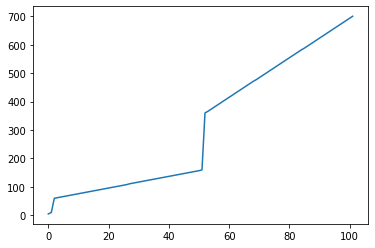

In [34]:
plt.plot(OneMinMarketData.term_list)

total pl=20.020500000000023,num trade=593,win rate=0.6745, pl_stability=4.1864, num_buy=328, num_sell=276
strategy performance=83.81382120000009


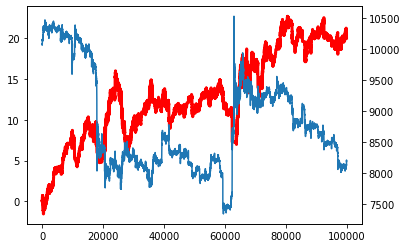

<Figure size 6000x6000 with 0 Axes>

test period= 2019-09-12 16:28:00  -  2019-11-21 03:08:00
total pl=20.020500000000023,num trade=593,win rate=0.6745, pl_stability=4.1864, num_buy=328, num_sell=276
strategy performance=83.81382120000009


In [27]:
#avert_period_kijun = 120
avert_period_kijun = 480
avert_val_kijun = -0.005
lc = 100

prediction = lgbmodel.bpsp_prediction(model, test_xb, 0.7)
#prediction = lgbmodel.bpsp_prediction2(model, test_xb)
sim = Sim()
ac = SimAccount()
ac = sim.sim_model_pred_onemin_avert(start_ind, prediction, 50, lc, ac, avert_period_kijun)
#ac = sim.sim_model_pred_onemin(start_ind, prediction, 50, lc, ac)
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

if i is 0:
    start_ind_log = start_ind
else:
    end_ind_log = start_ind

if end_ind_log is 0:
    end_ind_log = start_ind_log


fig, ax1 = plt.subplots()
plt.figure(figsize=(30,30),dpi=200)
ax1.plot(ac.performance_total_pl_log,color='red',linewidth = 3.0,label='pl')
ax2 = ax1.twinx()
ax2.plot(OneMinMarketData.ohlc.close[start_ind_log:end_ind_log + test_len])
plt.show()
print('test period=', OneMinMarketData.ohlc.dt[start_ind_log], ' - ', OneMinMarketData.ohlc.dt[end_ind_log + test_len])
print('total pl={},num trade={},win rate={}, pl_stability={}, num_buy={}, num_sell={}'.format(ac.total_pl,ac.num_trade,ac.win_rate, ac.pl_stability, ac.num_buy,ac.num_sell))
print('strategy performance={}'.format(ac.total_pl * ac.pl_stability))

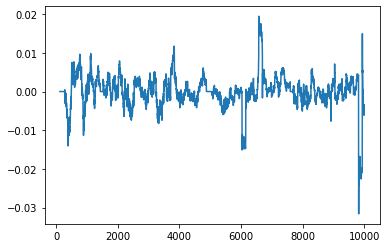

In [127]:
plt.plot(np.gradient(ta.MA(np.array(ac.performance_total_pl_log, dtype='f8'), timeperiod=120)))

In [0]:
data=[{
      "execID":"9768c625-2d17-b524-caa8-8cf37d0120b9",
      "orderID":"d9e15ba0-ebf6-e138-77a9-be3e01c304bc",
      "symbol":"XBTUSD",
      "side":"Buy",
      "lastQty":0,
      "lastPx":0,
      "lastMkt":"",
      "lastLiquidityInd":"",
      "orderQty":100000,
      "price":6617.5,
      "execType":"New",
      "ordType":"Limit",
      "timeInForce":"GoodTillCancel",
      "execInst":"ParticipateDoNotInitiate",
      "ordStatus":"New",
      "simpleLeavesQty":15.111,
      "leavesQty":100000,
      "simpleCumQty":0,
      "cumQty":0,
      "avgPx":0,
      "commission":0,
      "tradePublishIndicator":"",
      "text":"BuyLimit",
      "trdMatchID":"00000000-0000-0000-0000-000000000000",
      "execCost":0,
      "execComm":0,
      "transactTime":"2018-07-05T02:14:09.285Z",
      "timestamp":"2018-07-05T02:14:09.285Z"
    },{
      "execID":"2f0af9bc-500c-bfb3-ccbb-f093217bd512",
      "orderID":"d9e15ba0-ebf6-e138-77a9-be3e01c304bc",
      "symbol":"XBTUSD",
      "side":"Buy",
      "lastQty":49975,
      "lastPx":6617.5,
      "lastMkt":"XBME",
      "lastLiquidityInd":"AddedLiquidity",
      "orderQty":100000,
      "price":6617.5,
      "execType":"Trade",
      "ordType":"Limit",
      "timeInForce":"GoodTillCancel",
      "execInst":"ParticipateDoNotInitiate",
      "ordStatus":"PartiallyFilled",
      "simpleLeavesQty":7.5593,
      "leavesQty":50025,
      "simpleCumQty":7.55172225,
      "cumQty":49975,
      "avgPx":6617.5,
      "commission":-0.00025,
      "tradePublishIndicator":"PublishTrade",
      "text":"BuyLimit",
      "trdMatchID":"bc7ac434-ade2-6f5c-c545-4b77d2e9e751",
      "execCost":-755172225,
      "execComm":-188793,
      "homeNotional":7.55172225,
      "foreignNotional":-49975,
      "transactTime":"2018-07-05T02:14:28.107Z",
      "timestamp":"2018-07-05T02:14:28.107Z"
    },{
      "execID":"3da05d26-dbf9-6385-7222-3f7b40341548",
      "orderID":"d9e15ba0-ebf6-e138-77a9-be3e01c304bc",
      "symbol":"XBTUSD",
      "side":"Buy",
      "lastQty":17459,
      "lastPx":6617.5,
      "lastMkt":"XBME",
      "lastLiquidityInd":"AddedLiquidity",
      "orderQty":100000,
      "price":6617.5,
      "execType":"Trade",
      "ordType":"Limit",
      "timeInForce":"GoodTillCancel",
      "execInst":"ParticipateDoNotInitiate",
      "ordStatus":"PartiallyFilled",
      "simpleLeavesQty":4.921,
      "leavesQty":32566,
      "simpleCumQty":10.18995174,
      "cumQty":67434,
      "avgPx":6617.5,
      "commission":-0.00025,
      "tradePublishIndicator":"PublishTrade",
      "text":"BuyLimit",
      "trdMatchID":"b89f230c-495b-08f3-aea8-203572633853",
      "execCost":-263822949,
      "execComm":-65955,
      "homeNotional":2.63822949,
      "foreignNotional":-17459,
      "transactTime":"2018-07-05T02:14:28.796Z",
      "timestamp":"2018-07-05T02:14:28.796Z"
    },{
      "execID":"ab3f36ef-efec-82b7-2c76-42ebd3369605",
      "orderID":"d9e15ba0-ebf6-e138-77a9-be3e01c304bc",
      "symbol":"XBTUSD",
      "side":"Buy",
      "lastQty":24676,
      "lastPx":6617.5,
      "lastMkt":"XBME",
      "lastLiquidityInd":"AddedLiquidity",
      "orderQty":100000,
      "price":6617.5,
      "execType":"Trade",
      "ordType":"Limit",
      "timeInForce":"GoodTillCancel",
      "execInst":"ParticipateDoNotInitiate",
      "ordStatus":"PartiallyFilled",
      "simpleLeavesQty":1.1923,
      "leavesQty":7890,
      "simpleCumQty":13.9187421,
      "cumQty":92110,
      "avgPx":6617.5,
      "commission":-0.00025,
      "tradePublishIndicator":"PublishTrade",
      "text":"BuyLimit",
      "trdMatchID":"cc4420c6-156a-a15b-75f7-cc94b26f5cfb",
      "execCost":-372879036,
      "execComm":-93219,
      "homeNotional":3.72879036,
      "foreignNotional":-24676,
      "transactTime":"2018-07-05T02:14:28.867Z",
      "timestamp":"2018-07-05T02:14:28.867Z"
    },{
      "execID":"047eee14-d48f-d4b6-dc0c-c2484154b45e",
      "orderID":"d9e15ba0-ebf6-e138-77a9-be3e01c304bc",
      "symbol":"XBTUSD",
      "side":"Buy",
      "lastQty":7890,
      "lastPx":6617.5,
      "lastMkt":"XBME",
      "lastLiquidityInd":"AddedLiquidity",
      "orderQty":100000,
      "price":6617.5,
      "execType":"Trade",
      "ordType":"Limit",
      "timeInForce":"GoodTillCancel",
      "execInst":"ParticipateDoNotInitiate",
      "ordStatus":"Filled",
      "simpleLeavesQty":0,
      "leavesQty":0,
      "simpleCumQty":15.110999999999999,
      "cumQty":100000,
      "avgPx":6617.5,
      "commission":-0.00025,
      "tradePublishIndicator":"PublishTrade",
      "text":"BuyLimit",
      "trdMatchID":"9c0cffe1-cdda-c5ad-8671-4995f859f7ac",
      "execCost":-119225790,
      "execComm":-29806,
      "homeNotional":1.1922579,
      "foreignNotional":-7890,
      "transactTime":"2018-07-05T02:14:37.328Z",
      "timestamp":"2018-07-05T02:14:37.328Z"
    }]

In [0]:
lastQty_sum = data[0]['lastQty'] + data[1]['lastQty'] +data[3]['lastQty']+data[4]['lastQty']

In [21]:
execComm_sum

-311818

In [24]:
execCost_sum

-1247277051

In [0]:
lastPx = 6617.5

In [26]:
execComm_sum + execCost_sum + int(lastQty_sum / 6617.5 * 100000000)

-274929

In [38]:
(execComm_sum) / 100000000

-0.00311818